ТАК. МНЕ СРОЧНО НУЖНО НАЙТИ КАК ПРОДЛЕВАТЬ ГРАФИКИ.

Итого:

Для эффективной работы нам необходимо:

Понять, какие вопросы нам заданы и то, как ответить на них из датасета, что у нас на данный момент находится на руках.

Т.е эти самые:

Основная инфа о исследовании

Основные инструменты, что были использованы

Решения и находки

Решения
    Что было сделано, зачем, почему, для чего и как это принесёт выгоду
    
Находки
    То, какие зависимости были найдены в данных и как они коррелируют с прибылью для компаний.
    

По сути основная работа:

Определение проблемы и постановка вопросов, что необходимо решить, да найти в данных
Рассмотрение датасета и определение его основных моментов(где данных много, где их мало, почему их мало, какие данные здесь имеются, какие даты, что происходило в стране и в мире в данный момент)
Определение того, что при случае нужно будет обрабатывать, какие кореляции уже находит машина на данный момент в численных данных, что находятся в Датасетах.
Чистка датасетов от Нанов, определение переменных, удаление частей, перевод данных в определенные форматы
(Прикидывание разницы между нарезанными данными и не нарезанными)
Нарезка данных
Нахождение взаимосвязей уже на графиках самих датасетов.
Выведение нужных графиков, по данным нарезанным, с ответом на вопросы
Нахождение того, насколько отличаются нарезанные данные от ненарезанных.
Кластеризация. Определение того, что там машина вообще на кластеризировала и по каким параметрам. 
Подбитие кластеризации по наиболее лучшим параметрам
Подбитие графиков по кластерам
Планировка модели и необходимости её тренировки.
Создание базовых моделей.
Выбор методик для тренировки моделей.
Нарезка датасета на тренировочные части
Подбитие точности, до предела.
Выгрузка модели
Написание API и WebAPI
Подсоединение туда модели.
Презентация.




In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Так, всё это мегаполисы с населением от десяти до восемнадцати миллонов людей в городах, а так-же прилегающих к городам территориях.

Как и в любых городах здесь имеются различные районы, различные места
На руках у нас имеются лишь данные о квартирах на данный момент, так что к сожалению я не смогу ответить нормально на вопрос:"Как изменятся цены квартир", однако по полученным данным можно именно что предлагать людям в разных городах квартиры по их вкусу.

Это можно реализовать по сути обычными фильтрами, по которым будет фильтроваться датасет.

А так-же можно сделать рекомендационную систему на основе того, что пользователь смотрел в прошлые разы, чтобы предлагать ему квартиры в том-же ценовом диапазоне\районе\с теми-же условиями

Насчет самого датасета - можно объединить данные датасета и просто вывести колонку с названиями городов, чтобы отличать датасеты друг от друга.

По сути, что мне нужно:

Средние цены по городам.
    Средние цены по районам в городах

Зависимости от близости различных услуг и цен(насколько увеличивает цену)
Насколько увеличивает наличие определенных предметов или услуг в доме-квартире цену
Как влияют перепродажи на цену, а так-же в каких районах больше всего перепродаж.
В каких районах больше всего "Богатых" услуг(прислуга, охрана...)

Посмотреть как все эти приколы будут кластеризированны(нужно будет правда подумать что делать с категориальными данными)

Провести такие-же зависимости как и прежде, только уже по кластерам и посмотреть зависимости, которые имеют кластера

Трейнуть модель для предсказания цены на основе полностью сделанного датасета.

В вставленной моделе сделать показание по условным кластерам "Та самая категориальность"
На основе нужных параметров уже показывать отфильтрованную по цене квартиру(+ квартиры что меньше предсказанной цены, что больше и т.д.) Так-же предложения рекомендационные по подобным квартирам с такими-же условиями, только в других районах. Может даже лучше, но с такой-же ценой.

In [2]:
#Чтение файлов в дериктории

import glob
all_files = glob.glob("../db/*")
files = list()
#Работа с особенностями библеотеки и получение названий файлов
for i in all_files:
    files.append(i.split('\\')[-1])

In [3]:
import pandas as pd

datasets = list()

for name in files:
    town = name.split('.')[0]
    current_dataset = len(datasets)
    #Считывание в лист датасетов
    datasets.append(pd.read_csv(f'../db/{name}'))
    #И присваивания всем значениям в датасете название города, для разграничение датасета по городам
    datasets[current_dataset]['Town'] = town

In [4]:
df = pd.DataFrame()
for data in datasets:
    #Соединение датасетов в единый датасет
    df = pd.concat([df, data], ignore_index=True)

In [5]:
df.isnull().values.any()

False

In [6]:
#Группировка городов по средним ценам
prices_by_towns = df.groupby('Town')['Price'].mean()

In [7]:
prices_by_towns = prices_by_towns.reset_index()

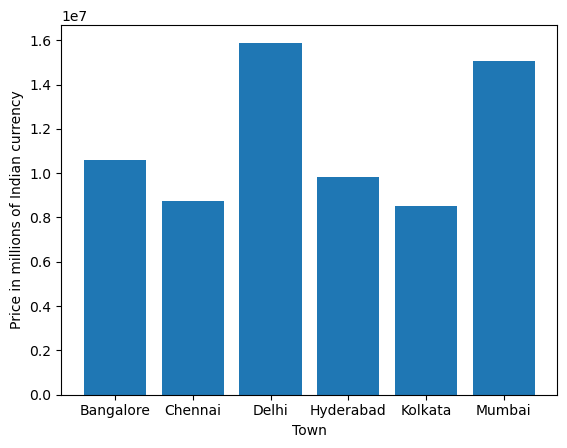

In [8]:
plt.bar(prices_by_towns['Town'],prices_by_towns['Price'])
plt.ylabel('Price in millions of Indian currency')
plt.xlabel('Town')
plt.show()

Из графа можно понять, что в Delhi и Mumbai являются наиболее дорогими городами для покупки недвижимости, что вполне является понятным, из-за того что они являются двумя столицами индии(Delhi - столица Индии, а Mumbai - финансовая столица Индии)

За двумя гигантами ступает Bangalore, чьи показатели объясняются  тем, что он является самым большим городом южной части Индии.


Остальные города так-же являются столицами своих регионов, однако они уже имеют меньшую стоимость недвижимости, ибо они не имеют настолько сфокусированных вокруг них финансов.

In [9]:
#Просмотр колонок в датасете, для дальнейшего изучения значений в датасетах
print(df.columns)

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Stadium', 'Town'],
      dtype='object')


In [10]:
print('Количество уникальных значений в датасете')
print(' ')

for i in df.columns:
    print(f'{i} количество {df[i].nunique()}')

Количество уникальных значений в датасете
 
Price количество 4924
Area количество 2452
Location количество 1776
No. of Bedrooms количество 9
Resale количество 2
MaintenanceStaff количество 3
Gymnasium количество 3
SwimmingPool количество 3
LandscapedGardens количество 3
JoggingTrack количество 3
RainWaterHarvesting количество 3
IndoorGames количество 3
ShoppingMall количество 3
Intercom количество 3
SportsFacility количество 3
ATM количество 3
ClubHouse количество 3
School количество 3
24X7Security количество 3
PowerBackup количество 3
CarParking количество 3
StaffQuarter количество 3
Cafeteria количество 3
MultipurposeRoom количество 3
Hospital количество 3
WashingMachine количество 3
Gasconnection количество 3
AC количество 3
Wifi количество 3
Children'splayarea количество 3
LiftAvailable количество 3
BED количество 3
VaastuCompliant количество 3
Microwave количество 3
GolfCourse количество 3
TV количество 3
DiningTable количество 3
Sofa количество 3
Wardrobe количество 3
Stadium кол

In [11]:
print('Уникальные значение в датасете')
print(' ')

for i in df.columns[3:-1]:
    print(f'{i} количество {df[i].unique()}')

Уникальные значение в датасете
 
No. of Bedrooms количество [4 2 3 1 5 6 7 8 9]
Resale количество [0 1]
MaintenanceStaff количество [1 0 9]
Gymnasium количество [1 0 9]
SwimmingPool количество [1 0 9]
LandscapedGardens количество [1 0 9]
JoggingTrack количество [1 0 9]
RainWaterHarvesting количество [1 0 9]
IndoorGames количество [1 0 9]
ShoppingMall количество [0 1 9]
Intercom количество [1 0 9]
SportsFacility количество [1 0 9]
ATM количество [0 1 9]
ClubHouse количество [1 0 9]
School количество [0 1 9]
24X7Security количество [1 0 9]
PowerBackup количество [1 0 9]
CarParking количество [0 1 9]
StaffQuarter количество [0 1 9]
Cafeteria количество [0 1 9]
MultipurposeRoom количество [0 1 9]
Hospital количество [0 1 9]
WashingMachine количество [0 1 9]
Gasconnection количество [0 1 9]
AC количество [0 1 9]
Wifi количество [0 9 1]
Children'splayarea количество [1 0 9]
LiftAvailable количество [1 0 9]
BED количество [0 1 9]
VaastuCompliant количество [0 1 9]
Microwave количество [0 1 9]

Скорее всего, датасет уже был проведен через категоризацию и при количестве больше одного в данных ставились девятки, как показатели того, что в помещениях может быть и значительно больше одного охранника, госпиталя, кондицеонеров или их качество значительно отличается

In [12]:
print('Количество уникальных значений в данных датасета')
print(' ')

for i in df.columns[3:-1]:
    print(f'{i} значения {df[i].unique()}')
    
    for h in df[i].unique():
        print(f'Значение {h} количество {df[df[i] == h][i].count()}')
    
    print(' ')

Количество уникальных значений в данных датасета
 
No. of Bedrooms значения [4 2 3 1 5 6 7 8 9]
Значение 4 количество 1983
Значение 2 количество 14263
Значение 3 количество 12596
Значение 1 количество 3857
Значение 5 количество 214
Значение 6 количество 33
Значение 7 количество 9
Значение 8 количество 7
Значение 9 количество 1
 
Resale значения [0 1]
Значение 0 количество 20391
Значение 1 количество 12572
 
MaintenanceStaff значения [1 0 9]
Значение 1 количество 1720
Значение 0 количество 8373
Значение 9 количество 22870
 
Gymnasium значения [1 0 9]
Значение 1 количество 5256
Значение 0 количество 4837
Значение 9 количество 22870
 
SwimmingPool значения [1 0 9]
Значение 1 количество 4188
Значение 0 количество 5905
Значение 9 количество 22870
 
LandscapedGardens значения [1 0 9]
Значение 1 количество 3523
Значение 0 количество 6570
Значение 9 количество 22870
 
JoggingTrack значения [1 0 9]
Значение 1 количество 3364
Значение 0 количество 6729
Значение 9 количество 22870
 
RainWaterHarv

Как и предполагалось - в 9 заключенны значения с огромной вероятностью находящиеся в диапазоне выше чем , из-за чего квартир что находятся в различных значениях от одного до неизвестного числа - значительно больше.

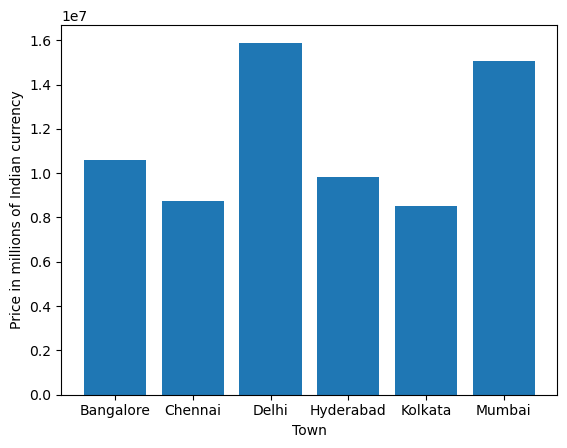

In [13]:
#Группировка городов по средним ценам
prices_by_towns = df.groupby('Town')['Price'].mean()
prices_by_towns = prices_by_towns.reset_index()
plt.bar(prices_by_towns['Town'],prices_by_towns['Price'])
plt.ylabel('Price in millions of Indian currency')
plt.xlabel('Town')
plt.show()

In [14]:
prices_by_locations = df.groupby('Location')['Price'].mean()

In [15]:
prices_by_locations = prices_by_locations.reset_index()

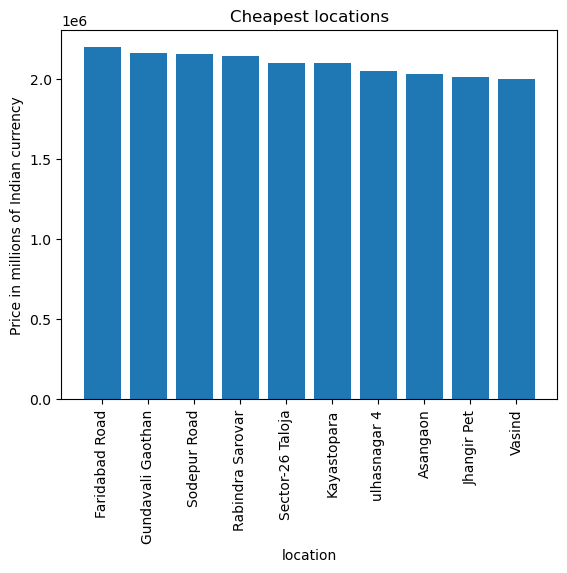

In [16]:

prices_by_locations.sort_values('Price', ascending=False,inplace=True)
plt.bar(prices_by_locations['Location'].tail(10),
        prices_by_locations['Price'].tail(10))
plt.title('Cheapest locations')
plt.xticks(prices_by_locations['Location'].tail(10),rotation='vertical')
plt.ylabel('Price in millions of Indian currency')
plt.xlabel('location')
plt.show()

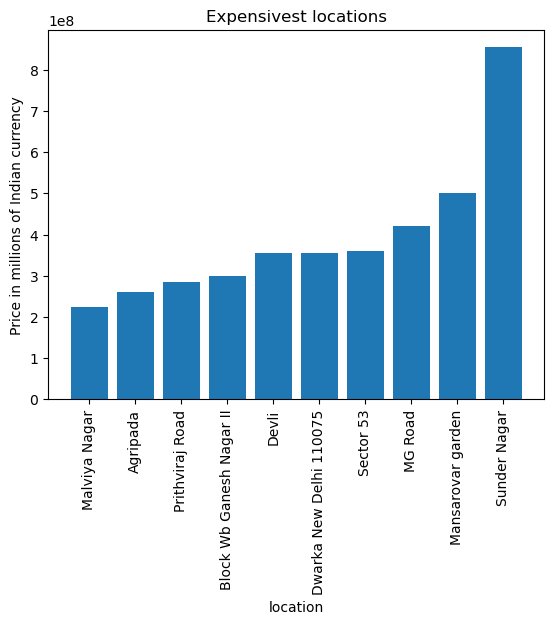

In [17]:

prices_by_locations.sort_values('Price', ascending=True,inplace=True)
plt.bar(prices_by_locations['Location'].tail(10),
        prices_by_locations['Price'].tail(10))

plt.title('Expensivest locations')
plt.xticks(prices_by_locations['Location'].tail(10),rotation='vertical')
plt.ylabel('Price in millions of Indian currency')
plt.xlabel('location')
plt.show()

In [18]:
prices_by_locations = df.groupby(['Location','Town'])['Price'].mean()
prices_by_locations = prices_by_locations.reset_index()

In [19]:
prices_by_locations.head()

Location     Town       Price
0       1 Lane Johri Farm    Delhi  18800000.0
1        10 Sector Dwarka    Delhi  12000000.0
2               15th Road   Mumbai  35000000.0
3    200 Feet Radial Road  Chennai   5285000.0
4  3 Dwarka Sector 9 Road    Delhi   4300000.0

In [20]:
prices_by_locations[prices_by_locations['Town']=='Delhi']['Location'].tail(10)

1733                  Zakir Nagar
1741             dwarka sector 12
1742             dwarka sector 13
1745    greater kailash Enclave 1
1748     i p extension patparganj
1749                   joshi road
1759          mayur vihar phase 1
1762                       nawada
1766                   param puri
1784                    vikaspuri
Name: Location, dtype: object

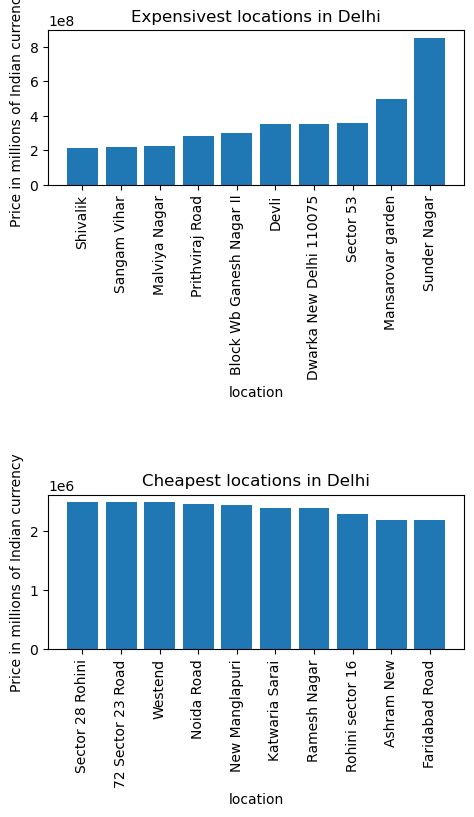

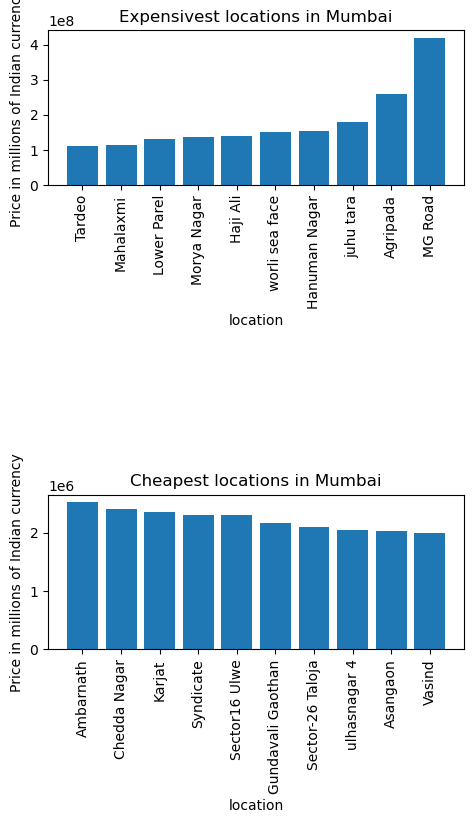

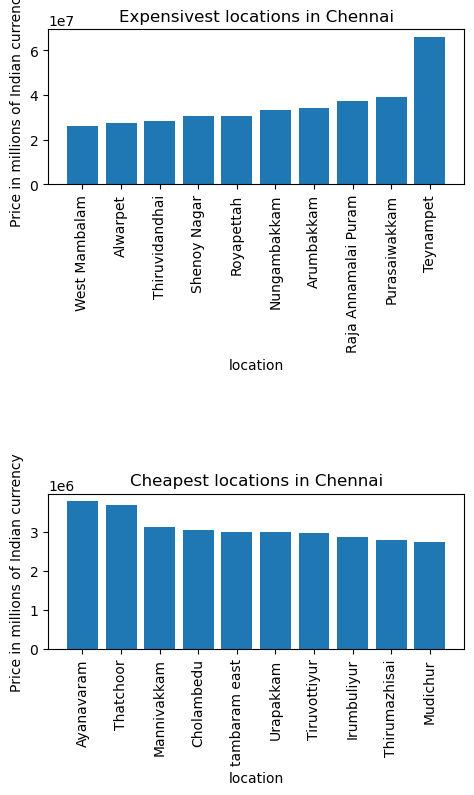

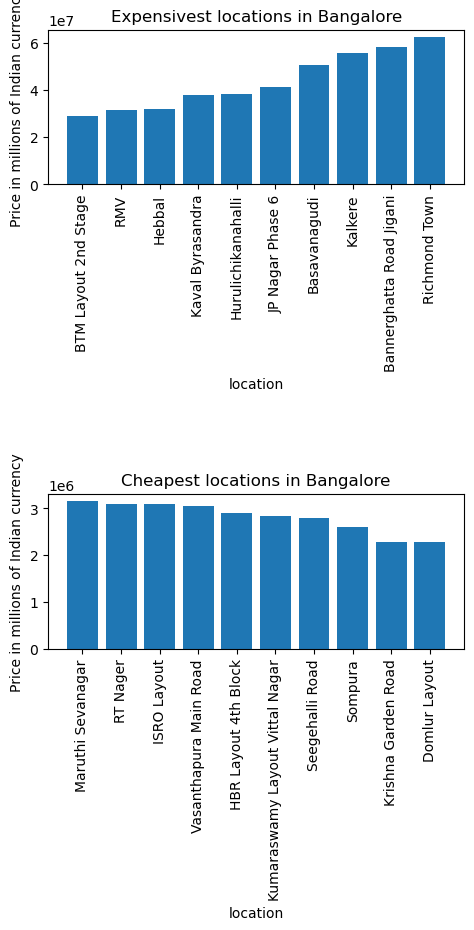

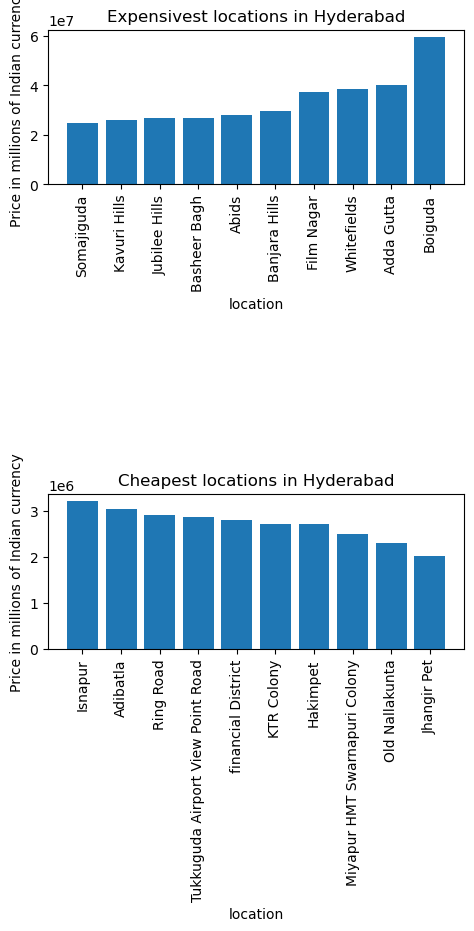

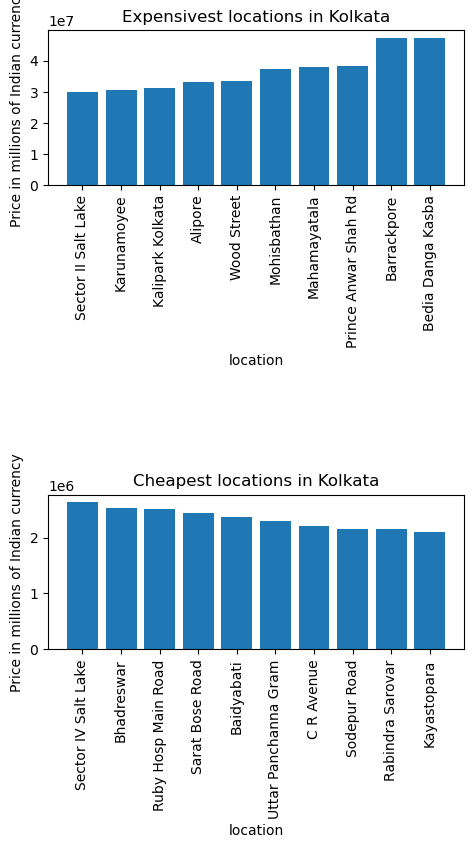

In [21]:

for i in prices_by_locations['Town'].unique():
    plt.figure(1)
    plt.subplot(211)
    prices_by_locations.sort_values('Price', ascending=True,inplace=True)
    plt.bar(prices_by_locations[prices_by_locations['Town']==i]['Location'].tail(10),
            prices_by_locations[prices_by_locations['Town']==i]['Price'].tail(10))

    plt.title(f'Expensivest locations in {i}')
    plt.xticks(prices_by_locations[prices_by_locations['Town']==i]['Location'].tail(10),
               rotation='vertical')
    plt.ylabel('Price in millions of Indian currency')
    plt.xlabel('location')

    plt.subplot(212)
    prices_by_locations.sort_values('Price', ascending=False,inplace=True)
    plt.bar(prices_by_locations[prices_by_locations['Town']==i]['Location'].tail(10),
            prices_by_locations[prices_by_locations['Town']==i]['Price'].tail(10))
    plt.title(f'Cheapest locations in {i}')
    plt.xticks(prices_by_locations[prices_by_locations['Town']==i]['Location'].tail(10),
               rotation='vertical')
    plt.ylabel('Price in millions of Indian currency')
    plt.xlabel('location')

    plt.subplots_adjust(top=1.3, bottom=0.01, left=0.30, right=0.95, hspace=2,
                        wspace=1)
    plt.show()

In [22]:
for i in prices_by_locations['Town'].unique():
    prices_by_locations.sort_values('Price', ascending=True,inplace=True)
    print(f'Town {i}')
    print(f'10 most cheap areas')
    for h,d in zip(prices_by_locations[prices_by_locations['Town']==i]['Location'].iloc[:10],
                   prices_by_locations[prices_by_locations['Town']==i]['Price'].iloc[:10]):
        print(f'{h} mean price {d}')
    print(' ')
    prices_by_locations.sort_values('Price', ascending=False,inplace=True)
    print(f'10 most expesives areas')
    for h,d in zip(prices_by_locations[prices_by_locations['Town']==i]['Location'].iloc[:10],
                   prices_by_locations[prices_by_locations['Town']==i]['Price'].iloc[:10]):
        print(f'{h} mean price {d}')
    print(' ')

Town Delhi
10 most cheap areas
Faridabad Road mean price 2200000.0
Ashram New mean price 2200000.0
Rohini sector 16 mean price 2300000.0
Katwaria Sarai mean price 2400000.0
Ramesh Nagar mean price 2400000.0
New Manglapuri mean price 2451000.0
Noida Road mean price 2467909.090909091
Westend mean price 2499000.0
Sector 28 Rohini mean price 2500000.0
Sector C Vasant Kunj mean price 2500000.0
 
10 most expesives areas
Sunder Nagar mean price 854599999.0
Mansarovar garden mean price 500000000.0
Sector 53 mean price 360000000.0
Dwarka New Delhi 110075 mean price 355600000.0
Devli mean price 354099999.0
Block Wb Ganesh Nagar II mean price 300000000.0
Prithviraj Road mean price 285400000.0
Malviya Nagar mean price 225400000.0
Sangam Vihar mean price 220000000.0
Shivalik mean price 214466666.66666666
 
Town Mumbai
10 most cheap areas
Vasind mean price 2000000.0
Asangaon mean price 2035000.0
ulhasnagar 4 mean price 2050000.0
Sector-26 Taloja mean price 2100000.0
Gundavali Gaothan mean price 2164

In [23]:
#Просмотр колонок в датасете, для дальнейшего изучения значений в датасетах
print(df.columns)

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Stadium', 'Town'],
      dtype='object')


In [24]:
print(' ')

for i in df.columns[3:-1]:
    print(f'{i} значения {df[i].unique()}')
    
    for h in df[i].unique():
        print(f'Значение {h} количество {df[df[i] == h]["Price"].mean()}')
    
    print(' ')

 
No. of Bedrooms значения [4 2 3 1 5 6 7 8 9]
Значение 4 количество 23520126.535552192
Значение 2 количество 9283856.311505293
Значение 3 количество 12251197.566449666
Значение 1 количество 9511563.107855847
Значение 5 количество 60996471.94392523
Значение 6 количество 42072727.27272727
Значение 7 количество 21122888.888888888
Значение 8 количество 76700000.0
Значение 9 количество 2400000.0
 
Resale значения [0 1]
Значение 0 количество 10646612.482516797
Значение 1 количество 13373704.486955138
 
MaintenanceStaff значения [1 0 9]
Значение 1 количество 13021151.706976743
Значение 0 количество 9817131.10390541
Значение 9 количество 12270838.140446
 
Gymnasium значения [1 0 9]
Значение 1 количество 12196694.973173516
Значение 0 количество 8370765.120942733
Значение 9 количество 12270838.140446
 
SwimmingPool значения [1 0 9]
Значение 1 количество 12889710.555873925
Значение 0 количество 8571229.781710414
Значение 9 количество 12270838.140446
 
LandscapedGardens значения [1 0 9]
Значение 

Как видно из вышеполученных данных - дома, которые не имеют близ них некоторых услуг имеют цену ниже обыденного. 

Однако из полученных средних значений можно сделать вывод, что цена за квартиру уменьшается с увеличением количества комнат уменьшается и цена, но с большой вероятностью это правда именно в suburb местностях, где нет таких больших проблем с густонаселенностью района, какой это проблемой является в городе.

In [25]:
df[df['Resale'] == 1]["Price"].mean()

13373704.486955138

In [26]:
df[df['Resale'] == 0]["Price"].mean()

10646612.482516797

C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


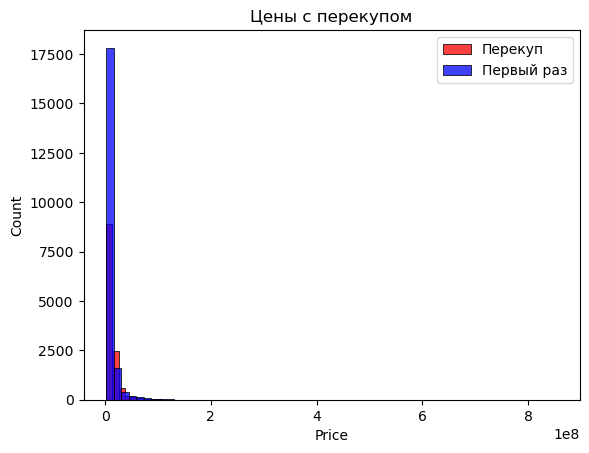

In [27]:
sns.histplot(df[df['Resale'] == 1], x="Price",  bins=60, color = 'r',label="Перекуп",kde=False).set(title='Цены без перекупа')
sns.histplot(df[df['Resale'] == 0], x="Price",  bins=60, color = 'b',label="Первый раз",kde=False).set(title='Цены с перекупом')
plt.legend()
plt.show()

In [28]:
df[df.drop('Location', axis=1).columns[0:2]].head()

Price  Area
0  30000000  3340
1   7888000  1045
2   4866000  1179
3   8358000  1675
4   6845000  1670

C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

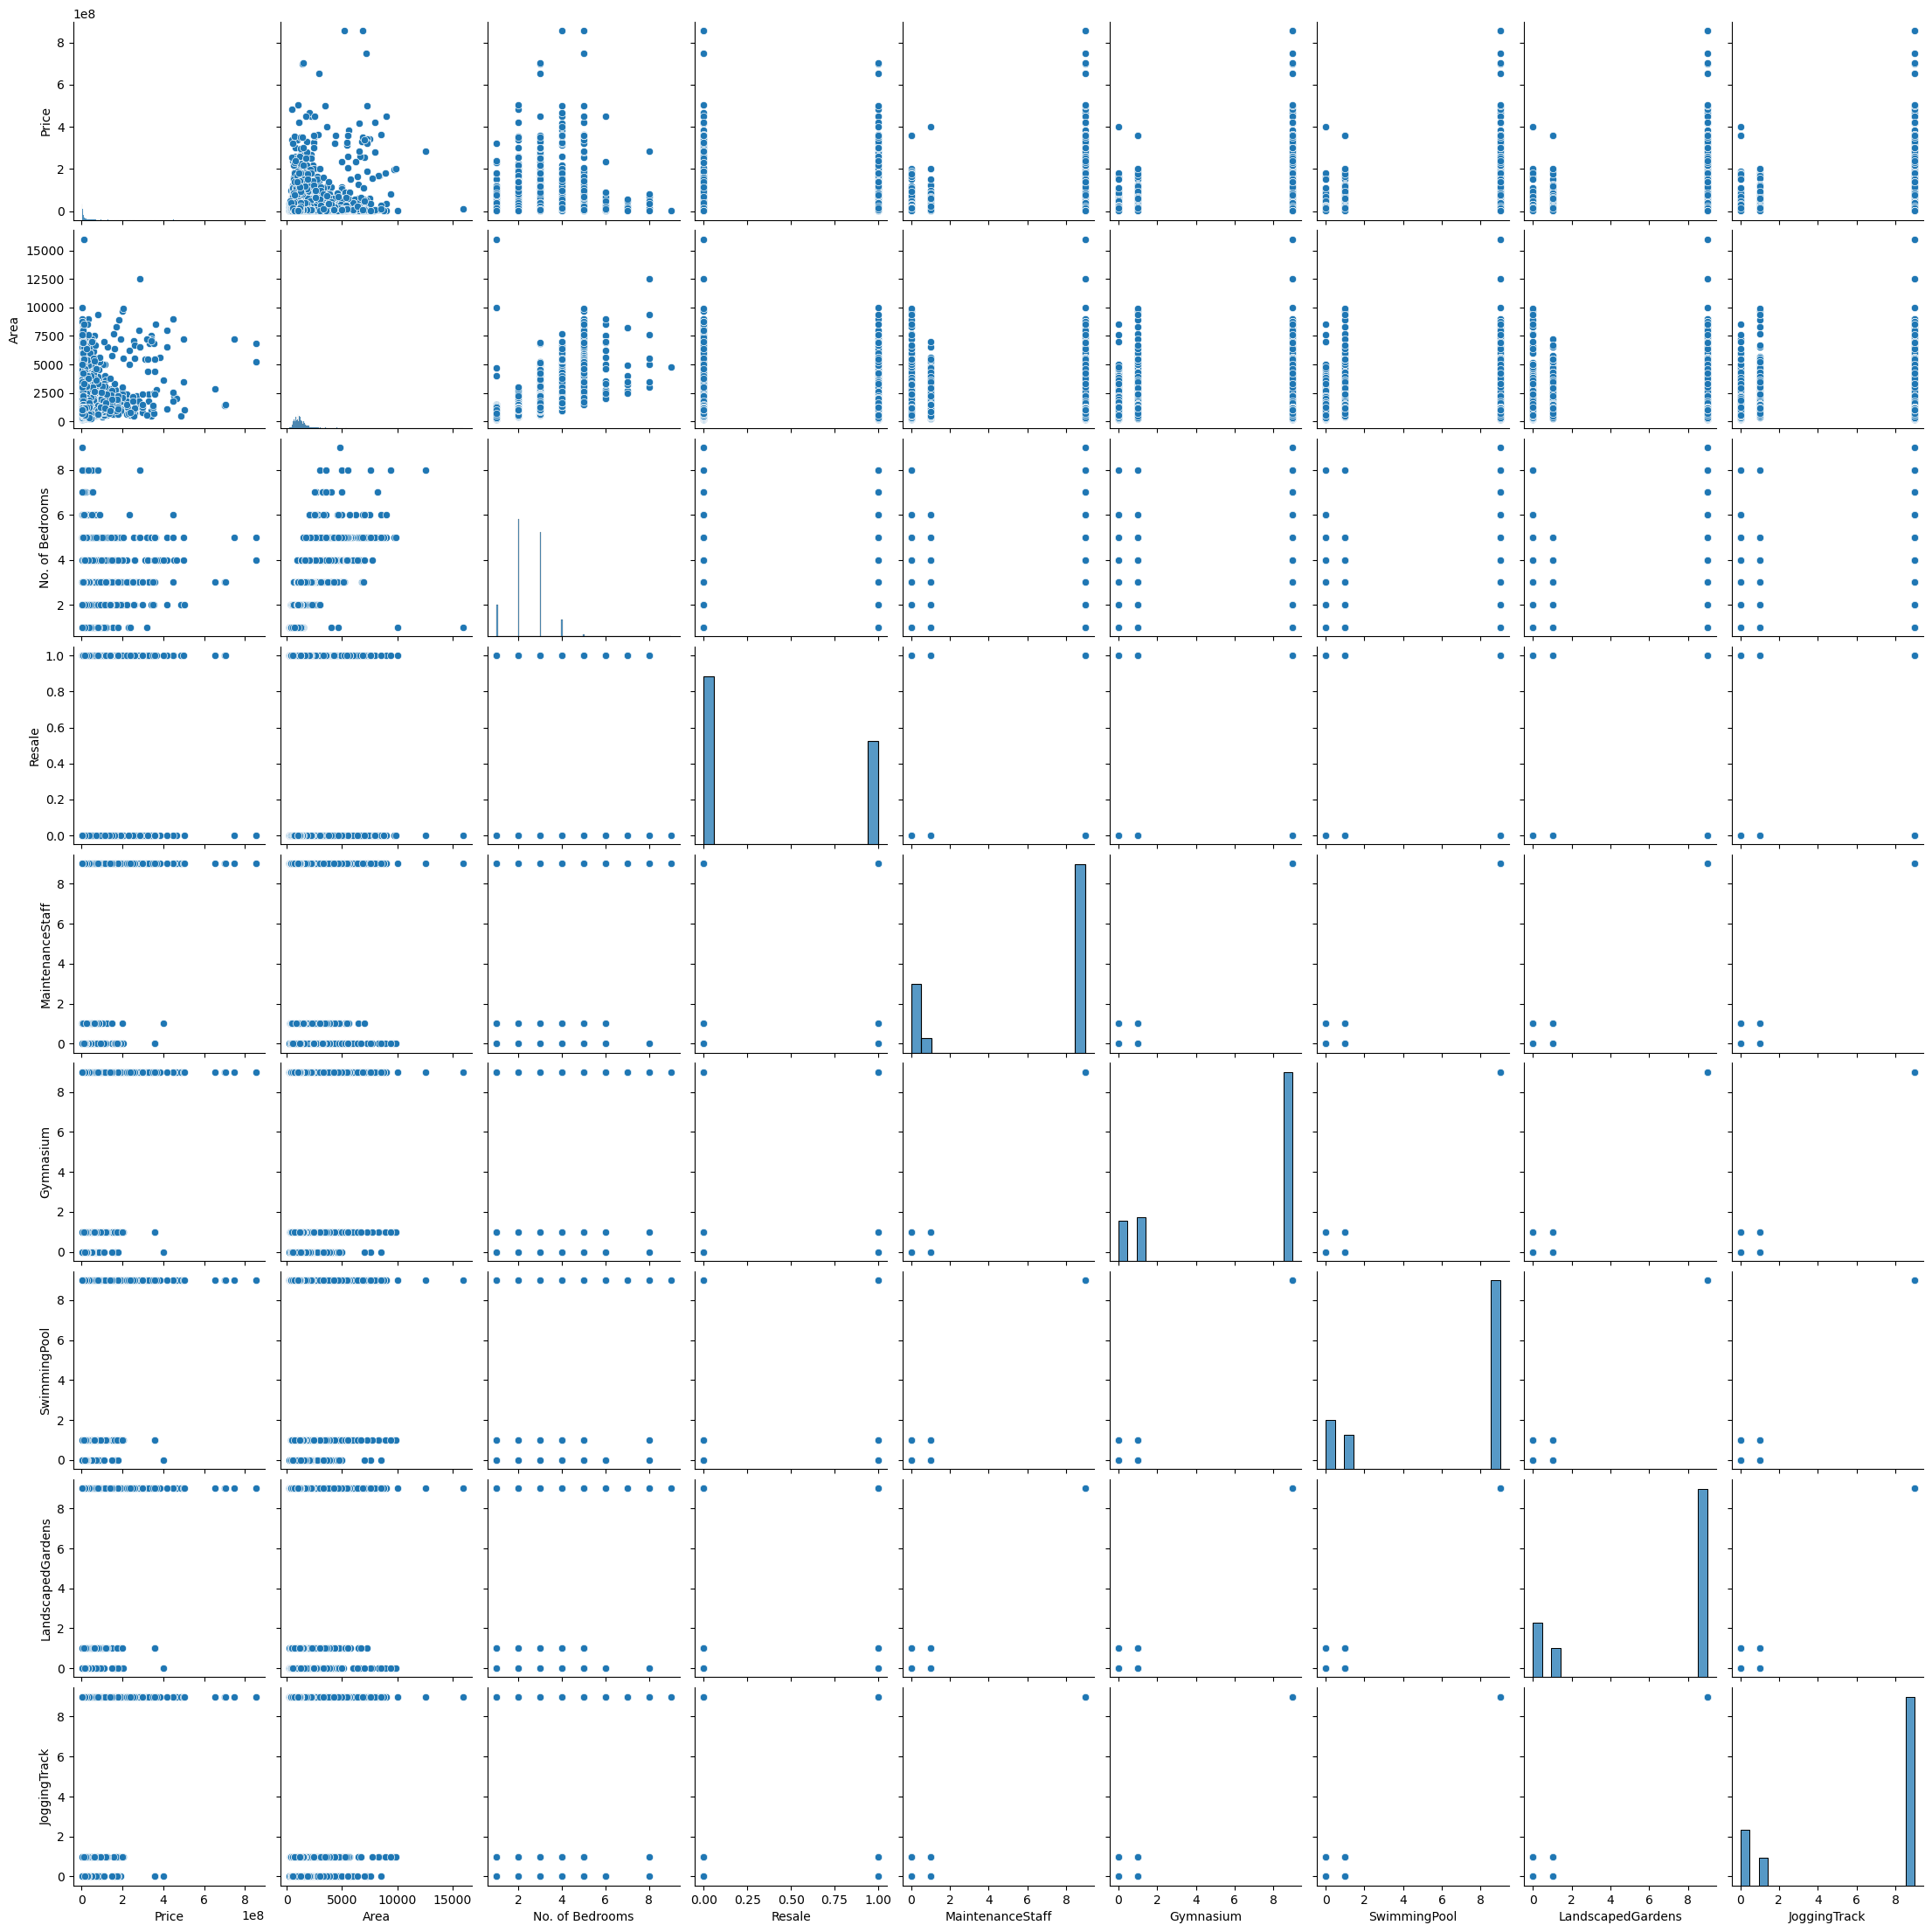

<Figure size 3200x2400 with 0 Axes>

0:00:35.719000


In [29]:
from datetime import timedelta
from monotonic import monotonic

start_time = monotonic()
sns.pairplot(df[df.drop('Location', axis=1).columns[0:9]])

plt.figure(dpi=500)
plt.show()
end_time = monotonic()
print(timedelta(seconds=end_time - start_time))

 
No. of Bedrooms значения [4 2 3 1 5 6 7 8 9]
Значение 4 количество 23520126.535552192


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


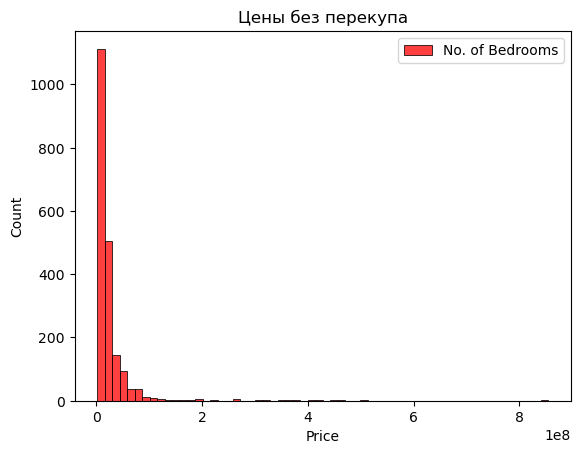

Значение 2 количество 9283856.311505293


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


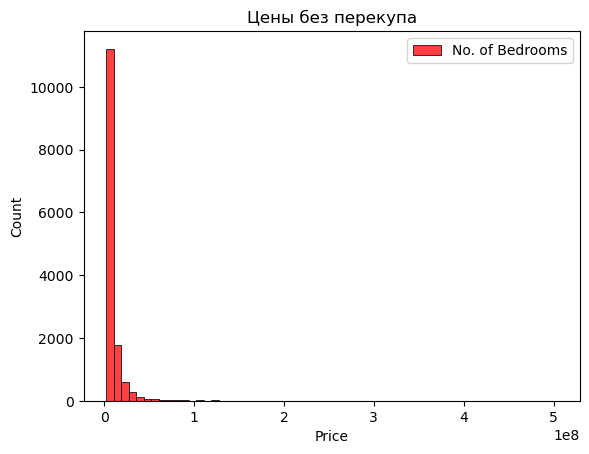

Значение 3 количество 12251197.566449666


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


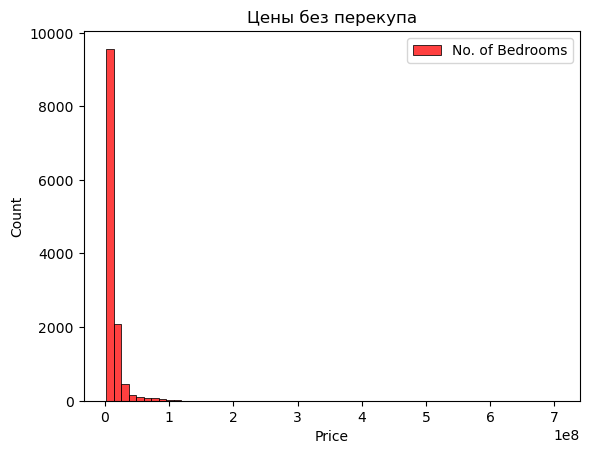

Значение 1 количество 9511563.107855847


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


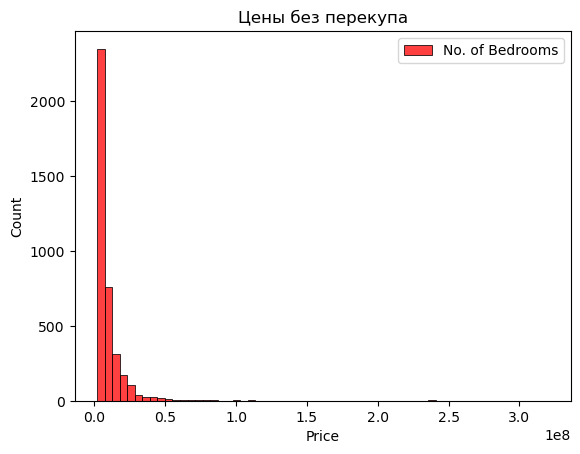

Значение 5 количество 60996471.94392523


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


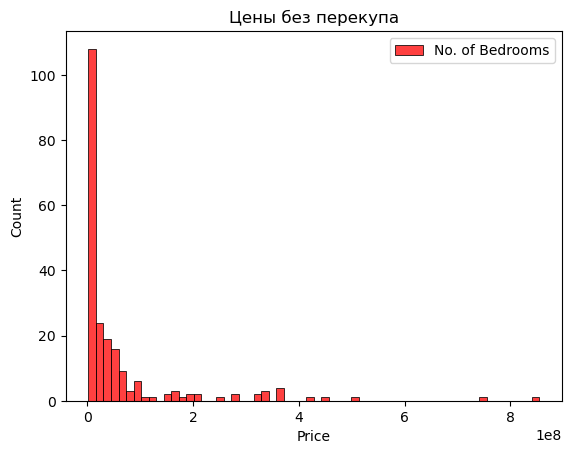

Значение 6 количество 42072727.27272727


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


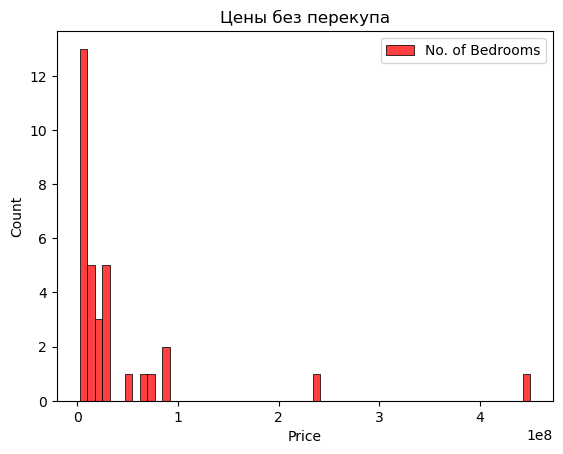

Значение 7 количество 21122888.888888888


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


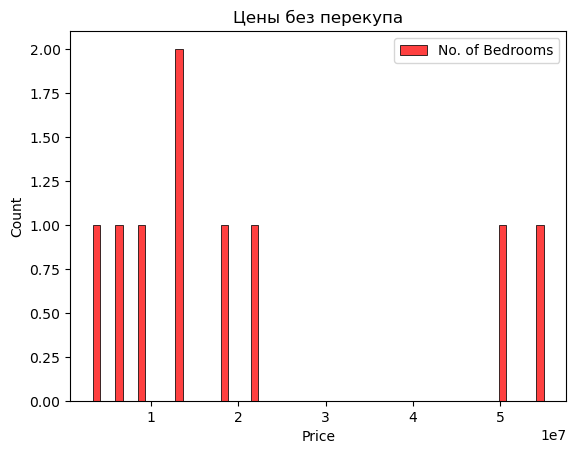

Значение 8 количество 76700000.0


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


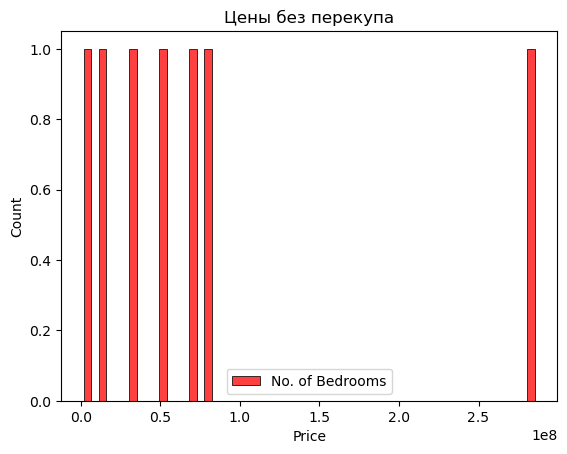

Значение 9 количество 2400000.0


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


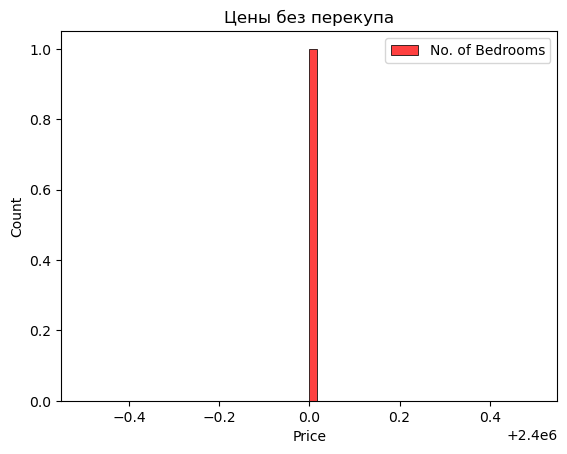

 
Resale значения [0 1]
Значение 0 количество 10646612.482516797


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


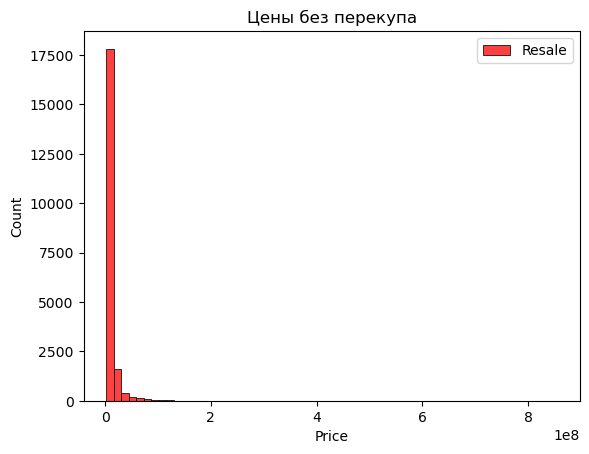

Значение 1 количество 13373704.486955138


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


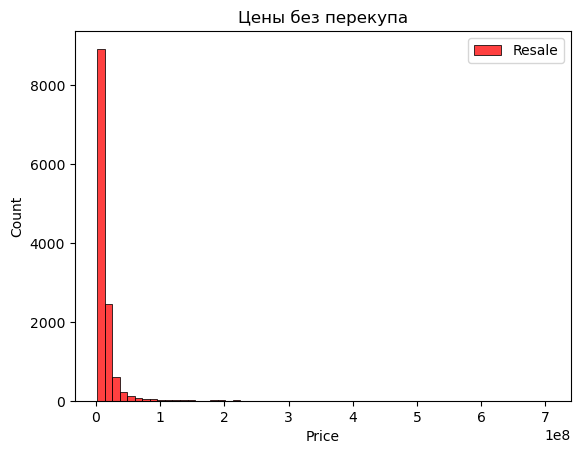

 
MaintenanceStaff значения [1 0 9]
Значение 1 количество 13021151.706976743


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


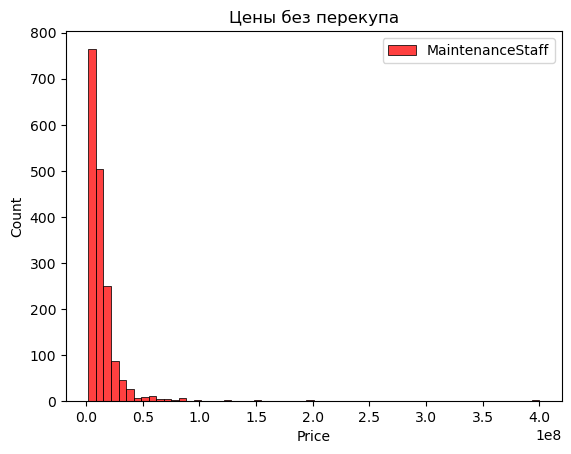

Значение 0 количество 9817131.10390541


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


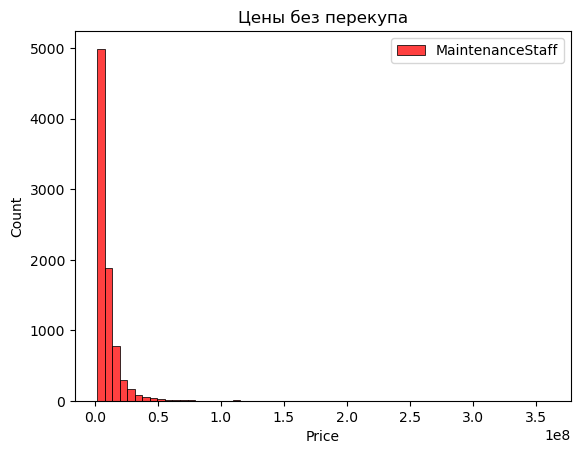

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


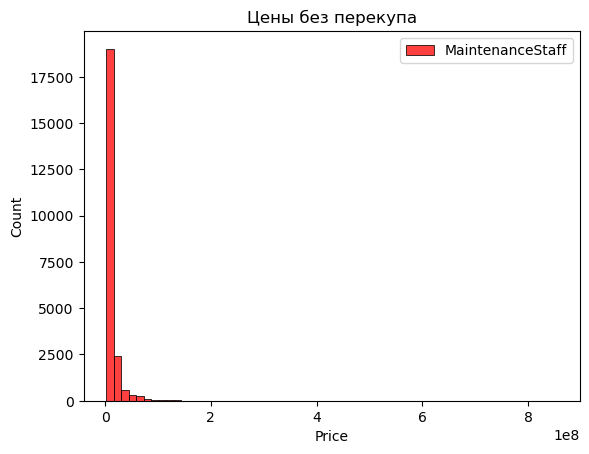

 
Gymnasium значения [1 0 9]
Значение 1 количество 12196694.973173516


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


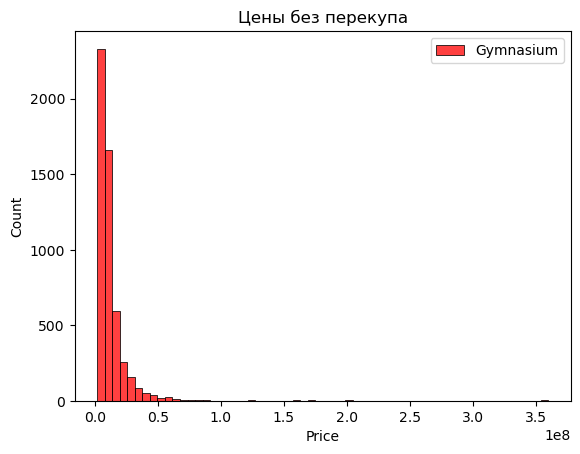

Значение 0 количество 8370765.120942733


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


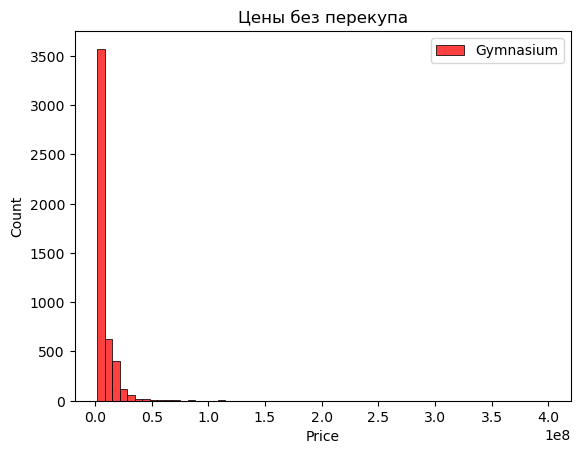

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


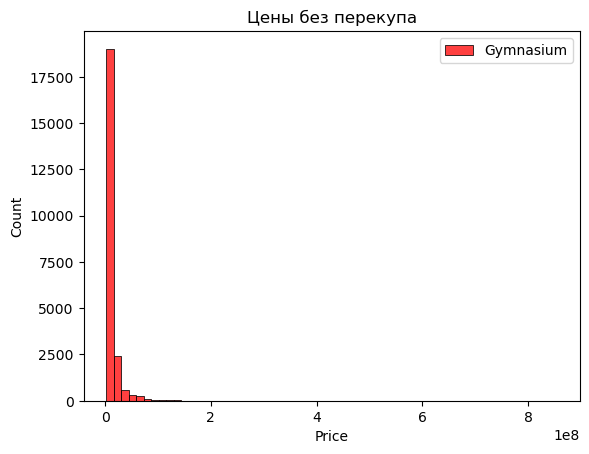

 
SwimmingPool значения [1 0 9]
Значение 1 количество 12889710.555873925


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


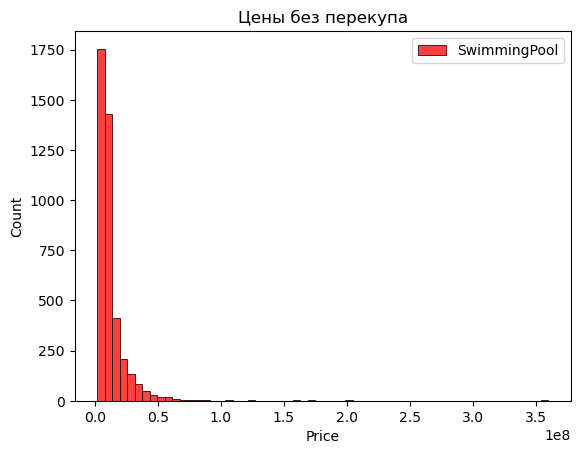

Значение 0 количество 8571229.781710414


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


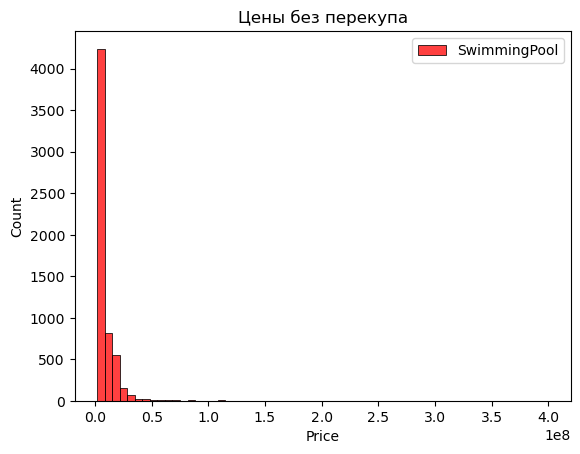

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


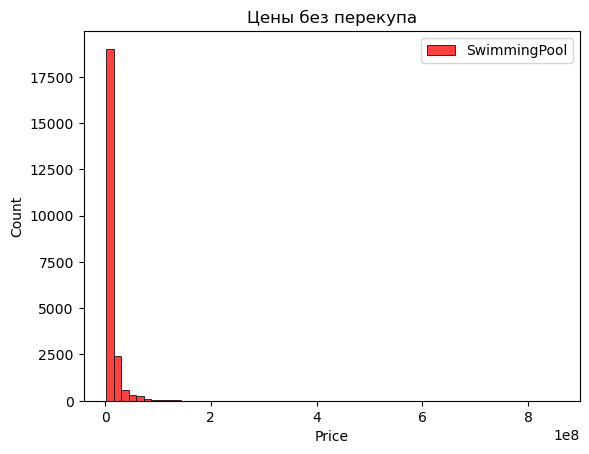

 
LandscapedGardens значения [1 0 9]
Значение 1 количество 12650847.2392847


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


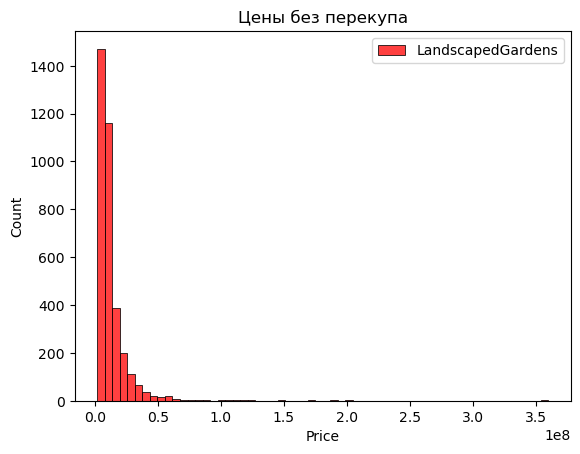

Значение 0 количество 9136420.828767123


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


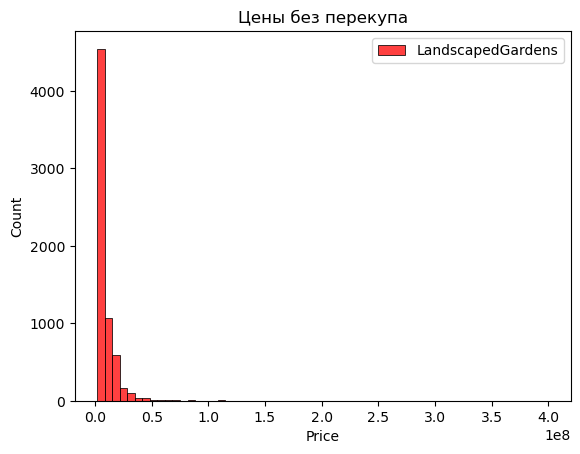

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


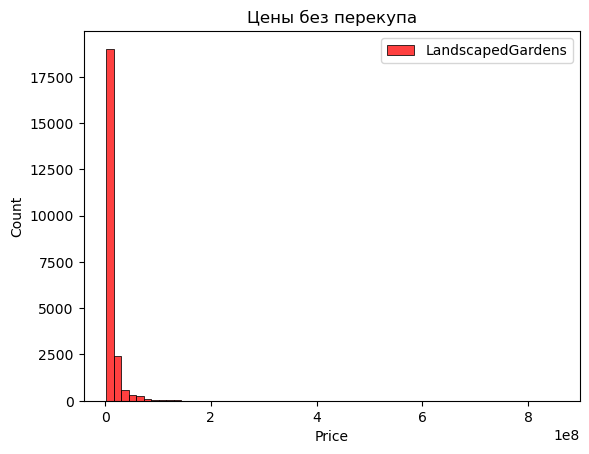

 
JoggingTrack значения [1 0 9]
Значение 1 количество 12319175.633769322


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


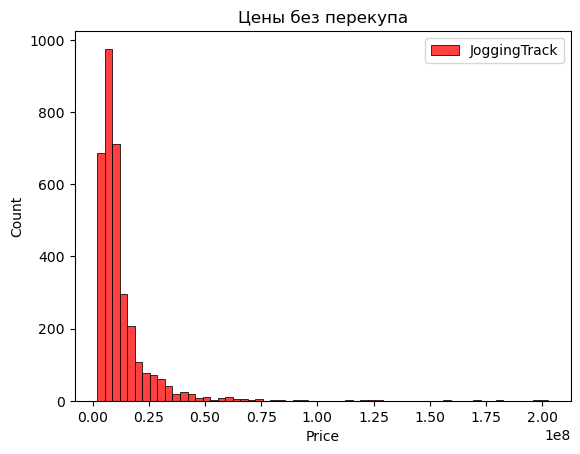

Значение 0 количество 9385274.607965522


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


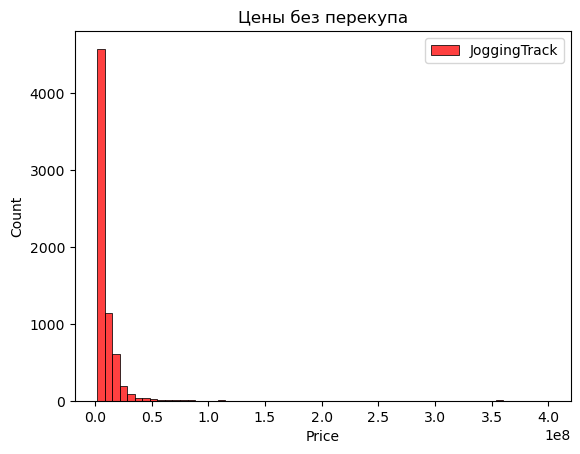

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


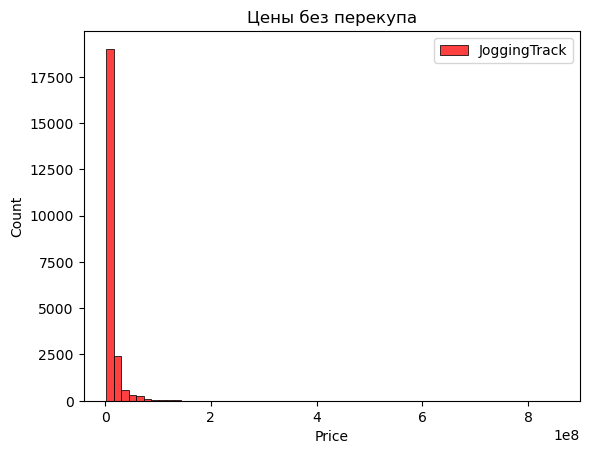

 
RainWaterHarvesting значения [1 0 9]
Значение 1 количество 12753798.125033684


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


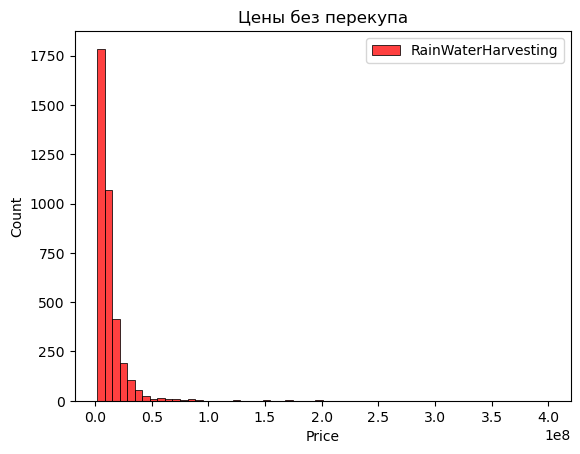

Значение 0 количество 8973029.587433407


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


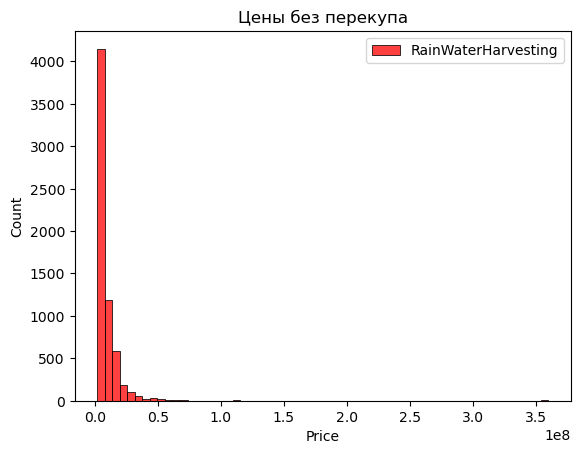

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


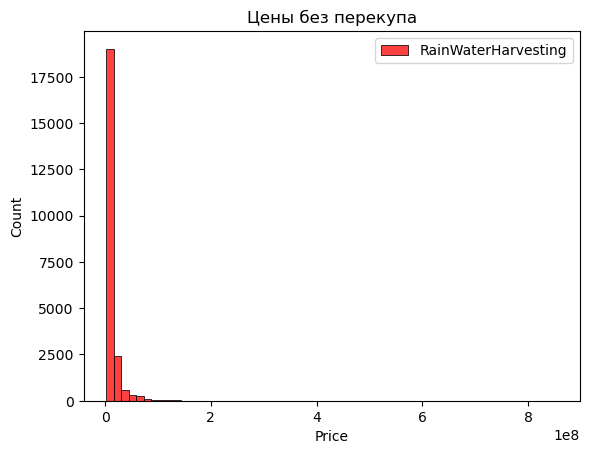

 
IndoorGames значения [1 0 9]
Значение 1 количество 12467854.406283857


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


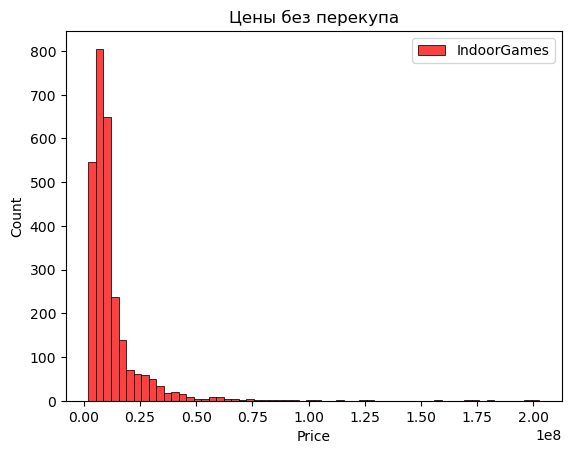

Значение 0 количество 9567412.727744402


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


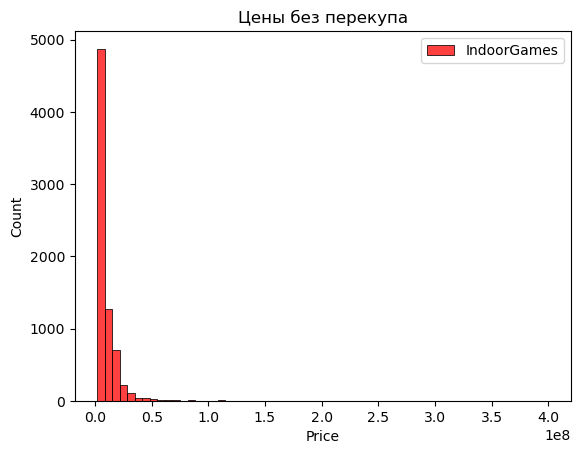

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


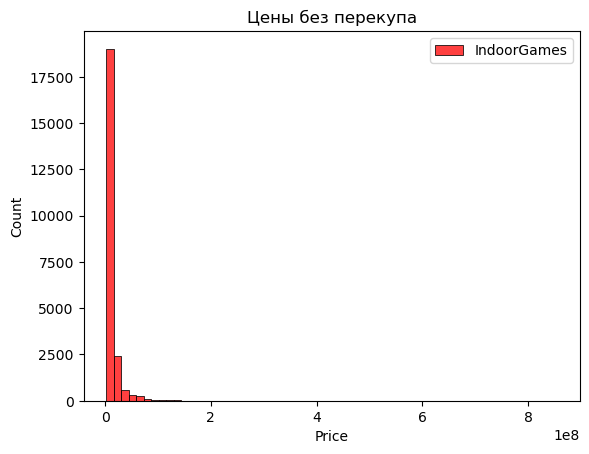

 
ShoppingMall значения [0 1 9]
Значение 0 количество 10194475.612889413


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


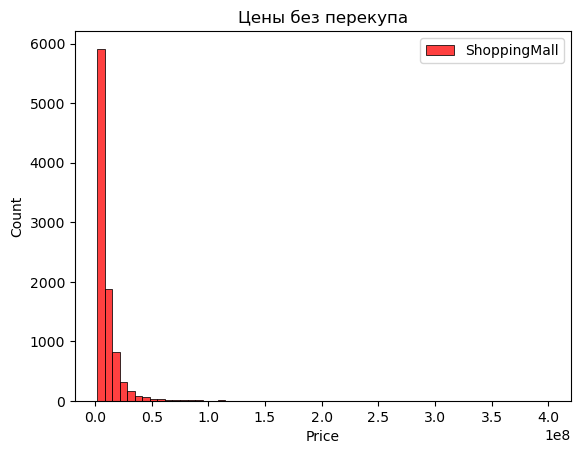

Значение 1 количество 12458275.224734042


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


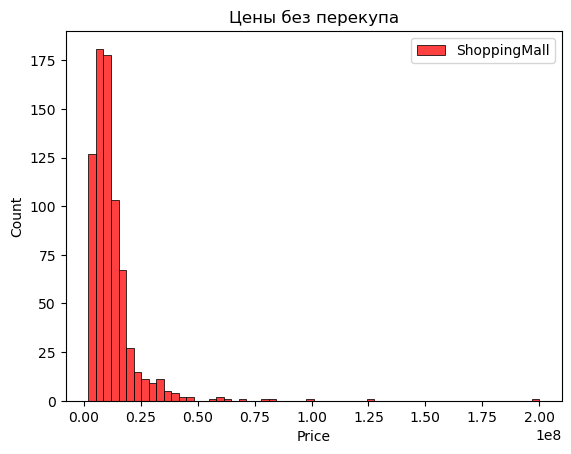

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


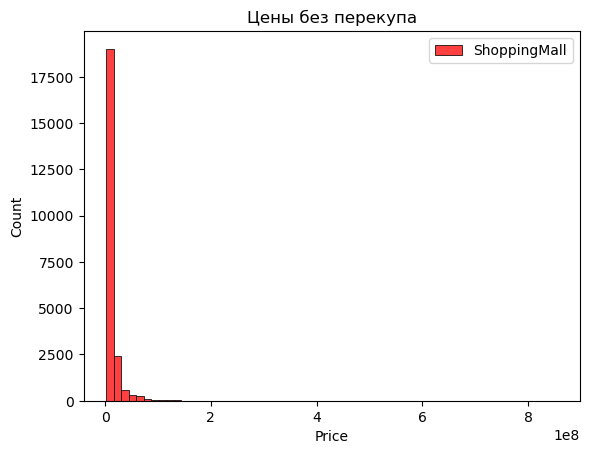

 
Intercom значения [1 0 9]
Значение 1 количество 11829480.003508773


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


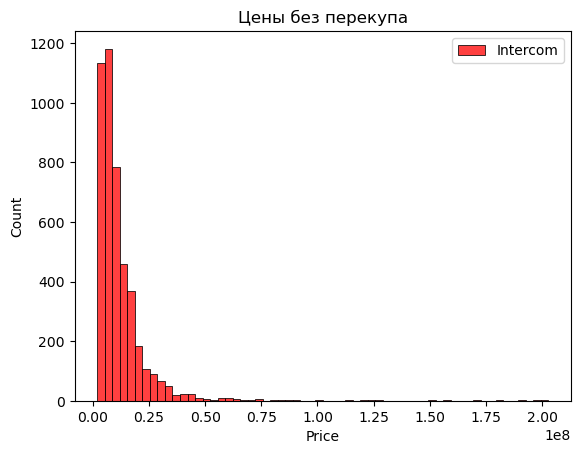

Значение 0 количество 9154670.315018978


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


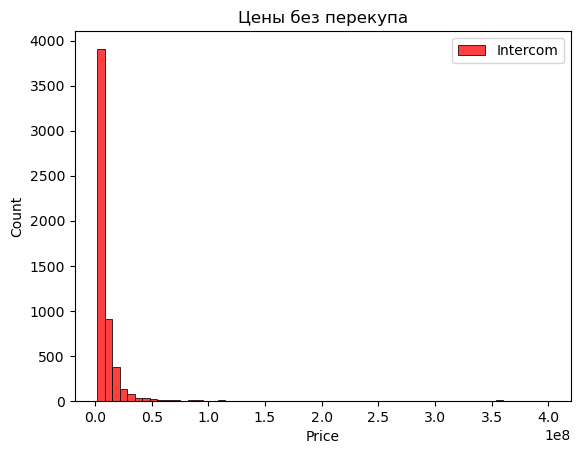

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


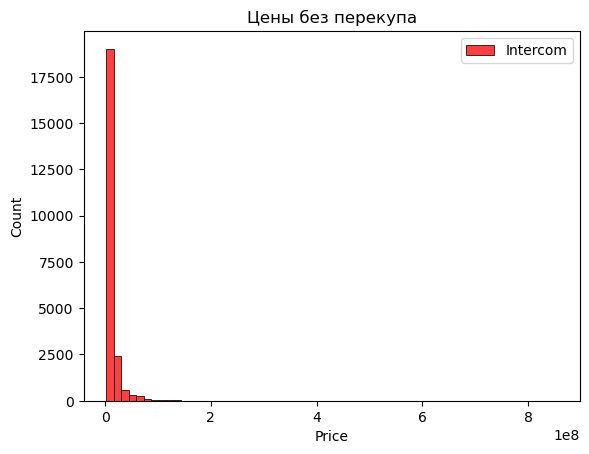

 
SportsFacility значения [1 0 9]
Значение 1 количество 13255095.23096355


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


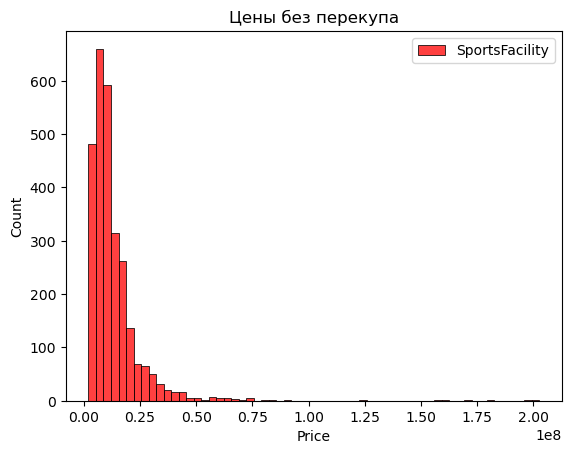

Значение 0 количество 9268690.355640536


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


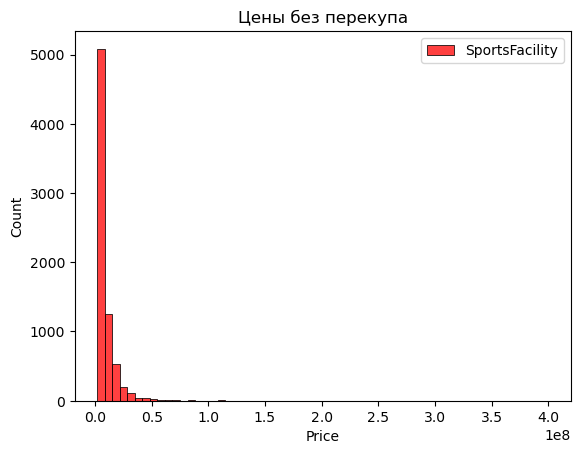

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


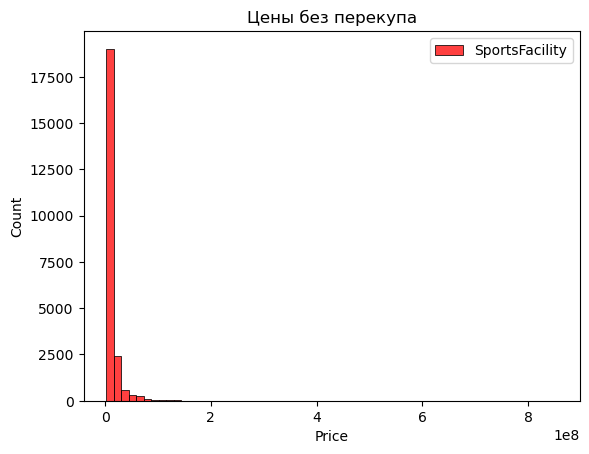

 
ATM значения [0 1 9]
Значение 0 количество 10194053.6494709


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


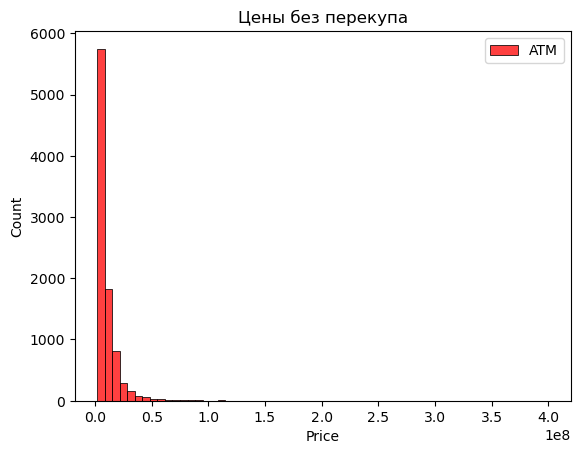

Значение 1 количество 11865587.620959843


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


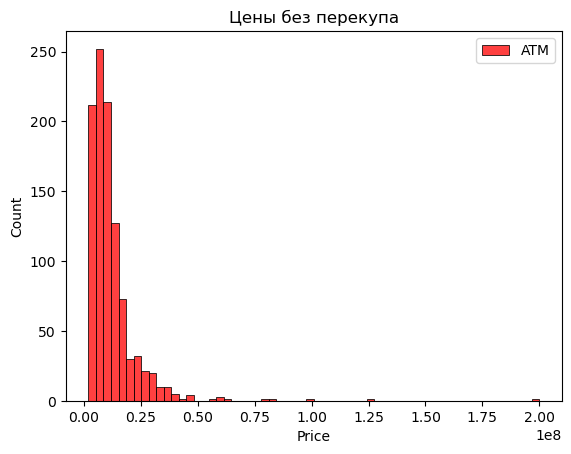

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


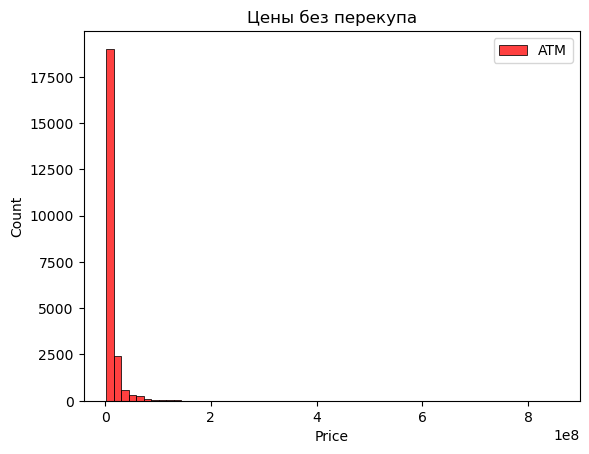

 
ClubHouse значения [1 0 9]
Значение 1 количество 12870753.083313664


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


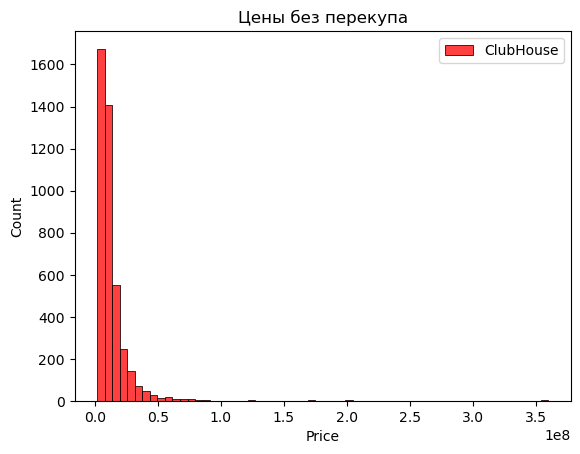

Значение 0 количество 8548811.27988388


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


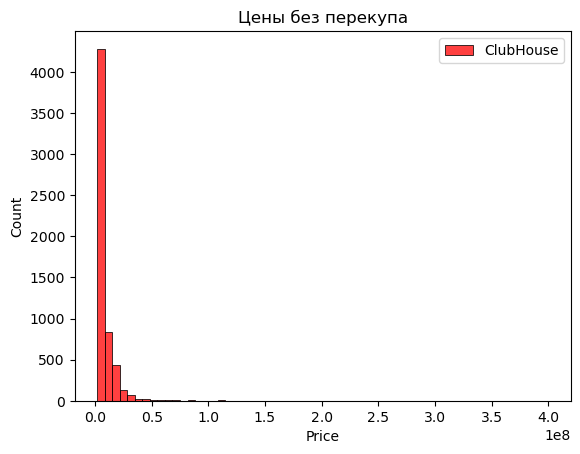

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


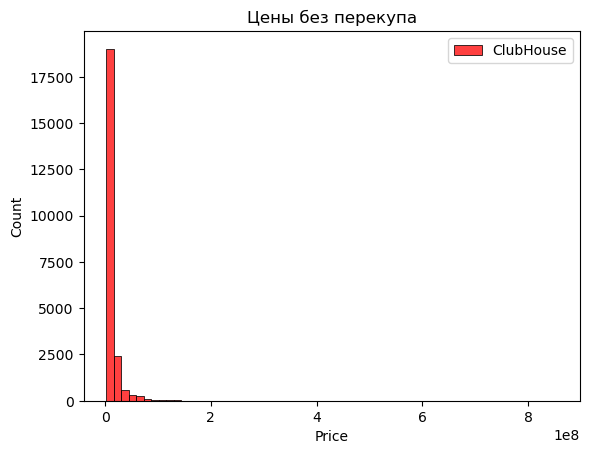

 
School значения [0 1 9]
Значение 0 количество 10279968.00545163


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


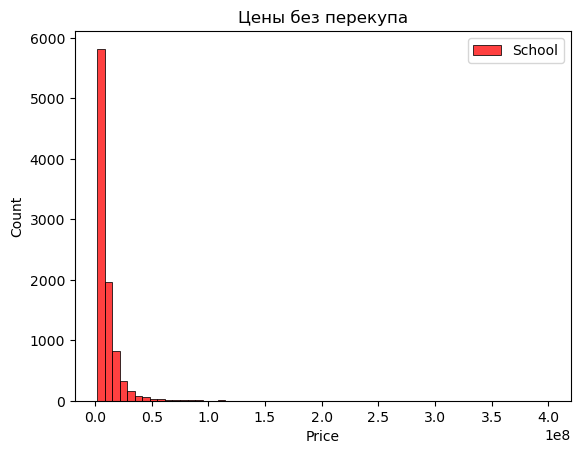

Значение 1 количество 11417505.390243903


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


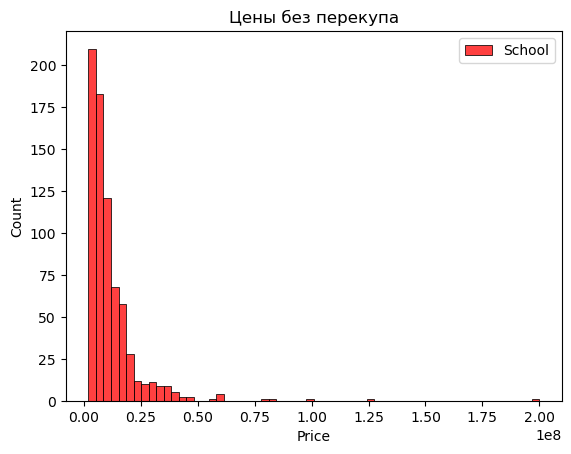

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


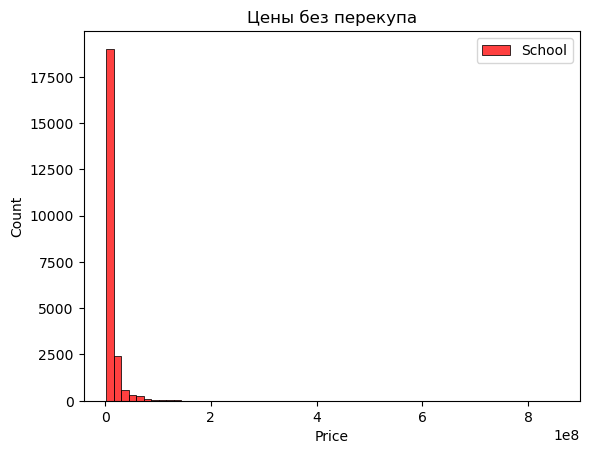

 
24X7Security значения [1 0 9]
Значение 1 количество 12588885.276689412


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


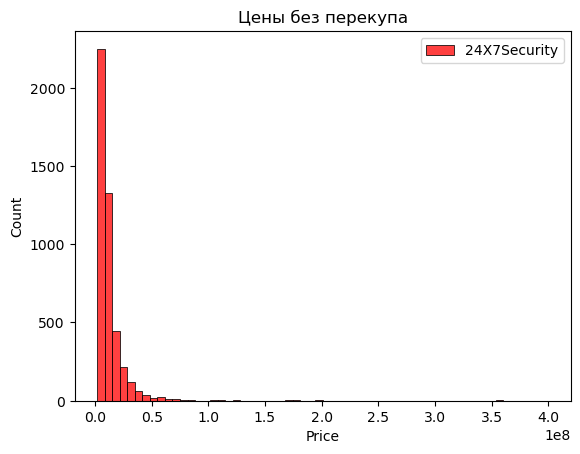

Значение 0 количество 8541245.74


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


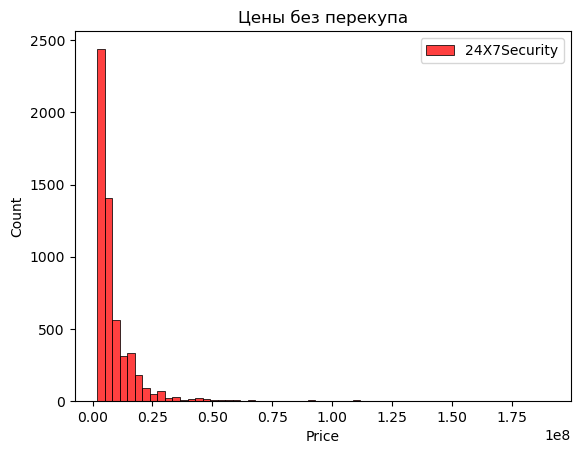

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


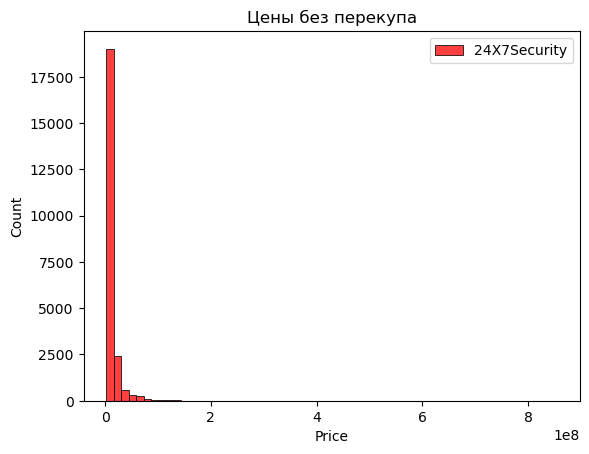

 
PowerBackup значения [1 0 9]
Значение 1 количество 11914769.71651752


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


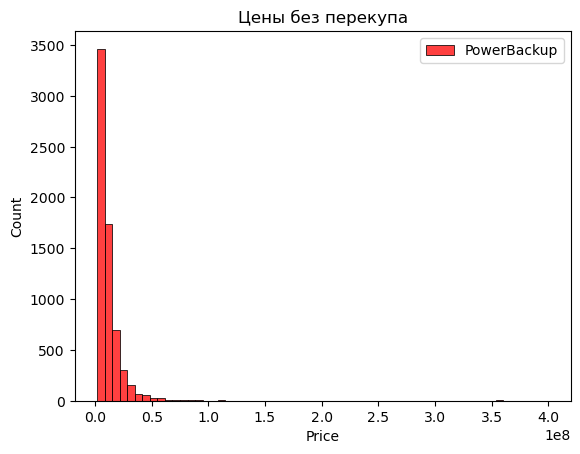

Значение 0 количество 7440326.550857143


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


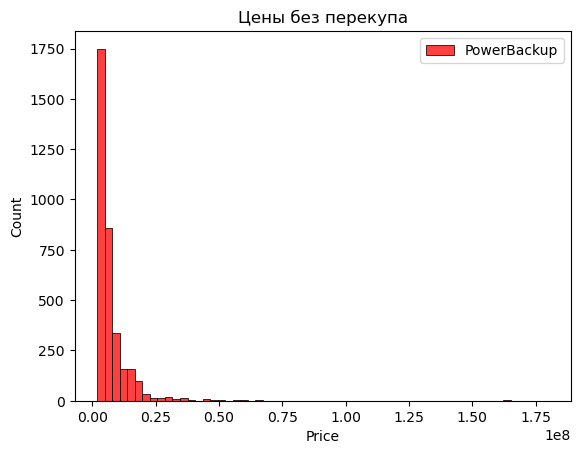

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


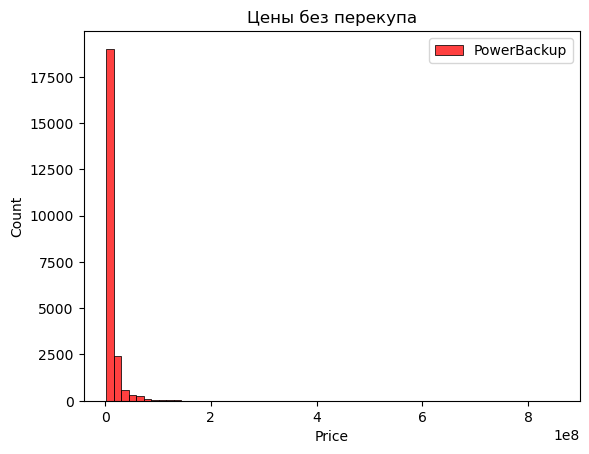

 
CarParking значения [0 1 9]
Значение 0 количество 8540981.99332839


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


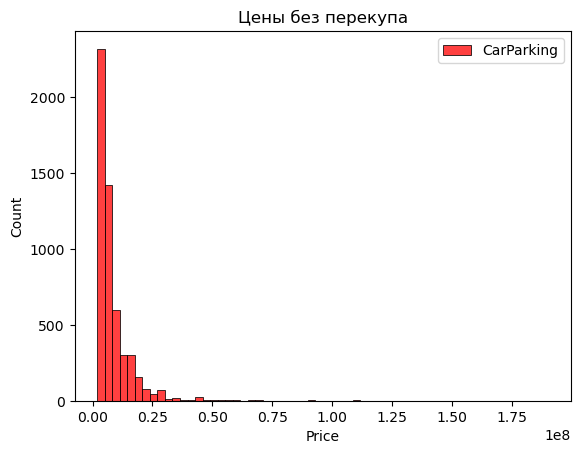

Значение 1 количество 12456478.780711092


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


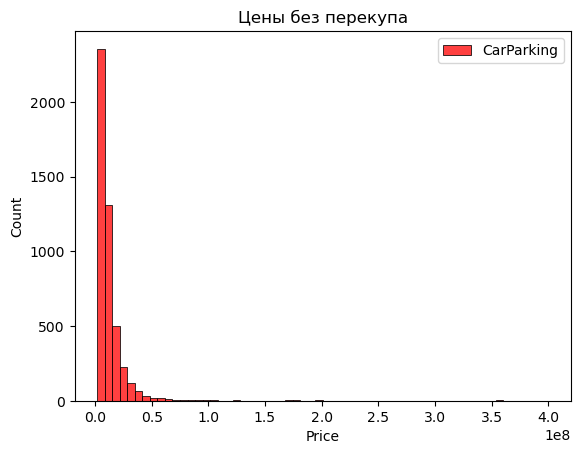

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


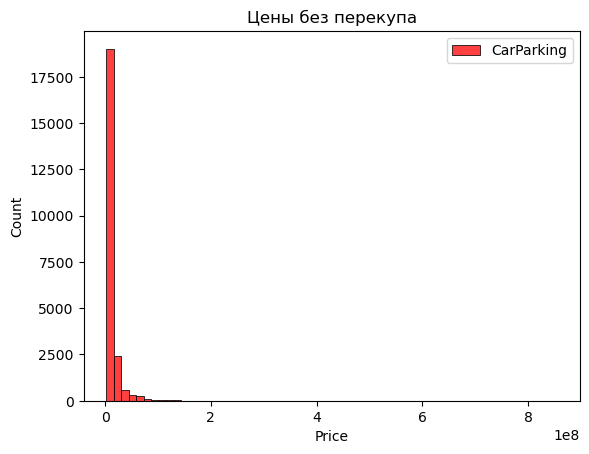

 
StaffQuarter значения [0 1 9]
Значение 0 количество 9894685.701800365


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


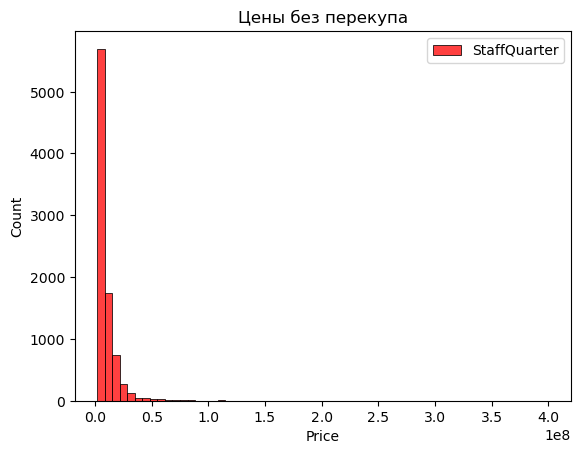

Значение 1 количество 13484782.04252088


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


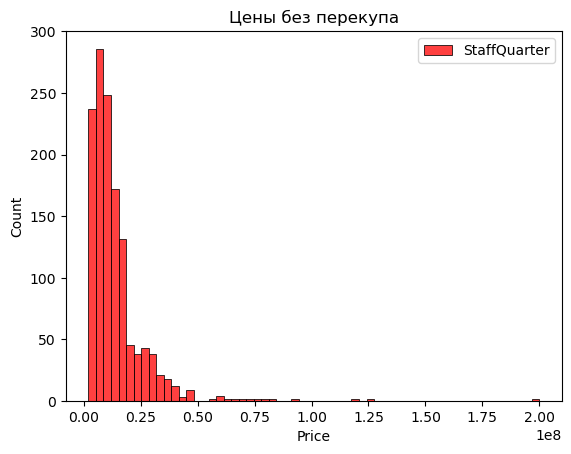

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


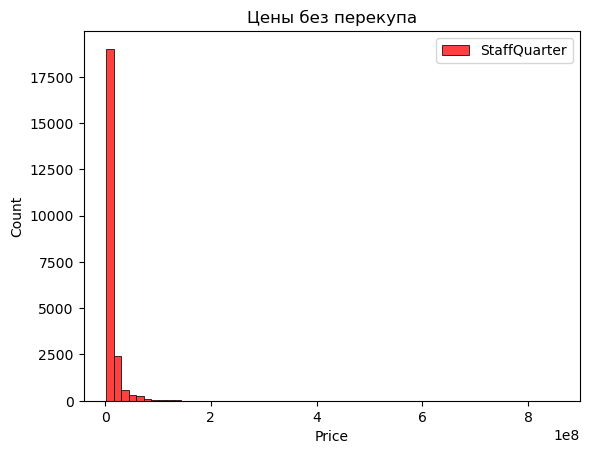

 
Cafeteria значения [0 1 9]
Значение 0 количество 9929905.929413086


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


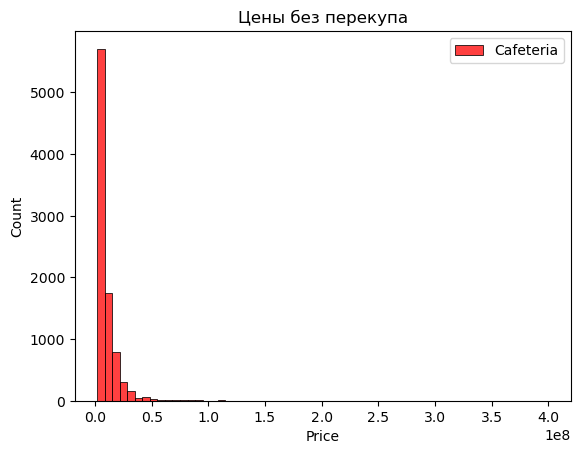

Значение 1 количество 13629296.050761422


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


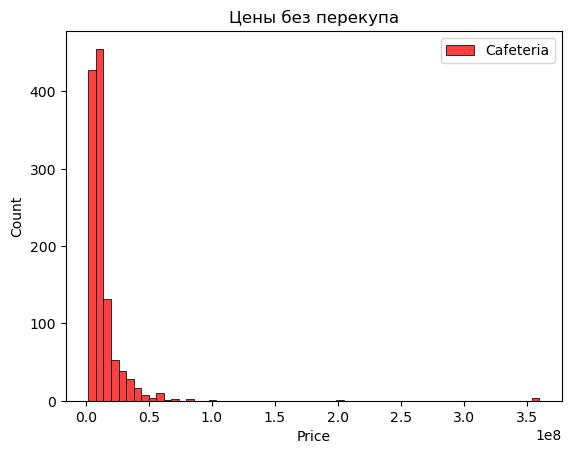

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


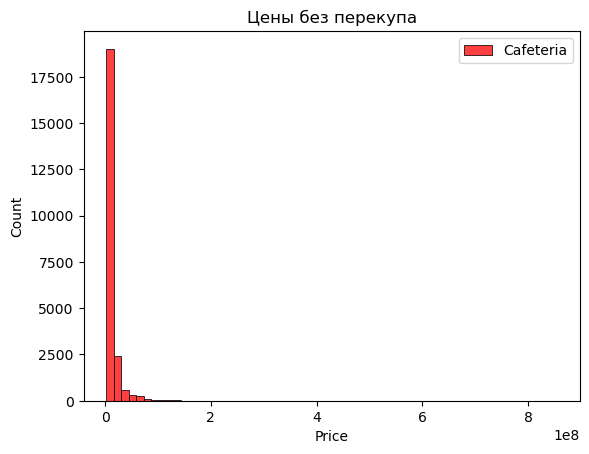

 
MultipurposeRoom значения [0 1 9]
Значение 0 количество 9887138.051992161


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


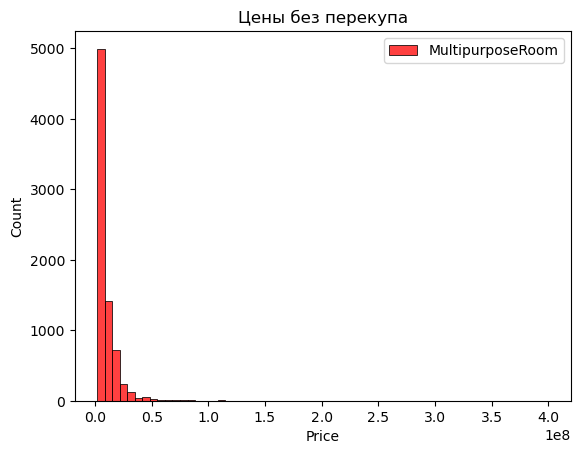

Значение 1 количество 11857743.183347005


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


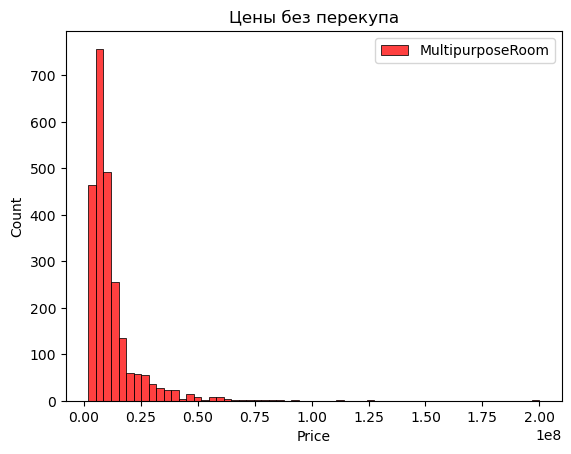

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


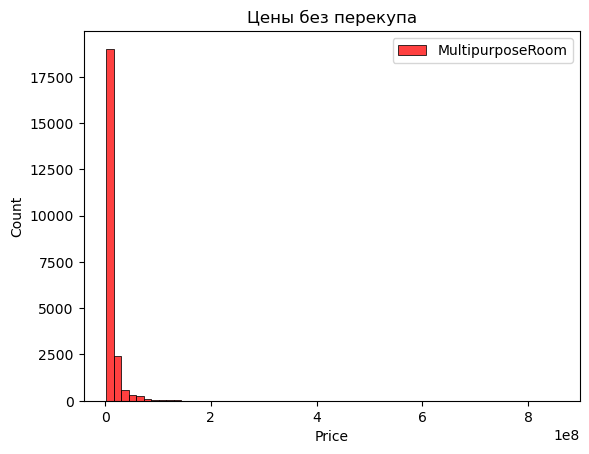

 
Hospital значения [0 1 9]
Значение 0 количество 10226466.402668348


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


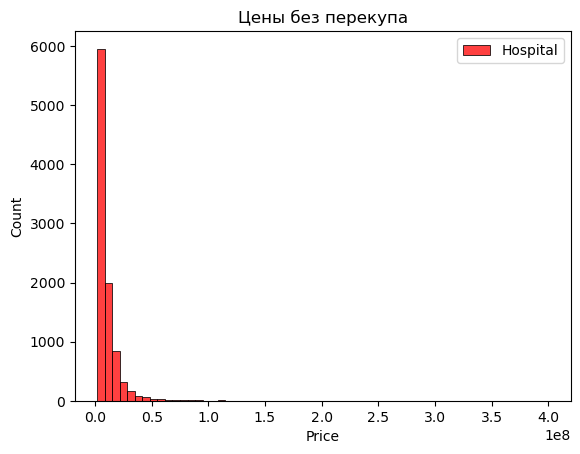

Значение 1 количество 12629766.519163763


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


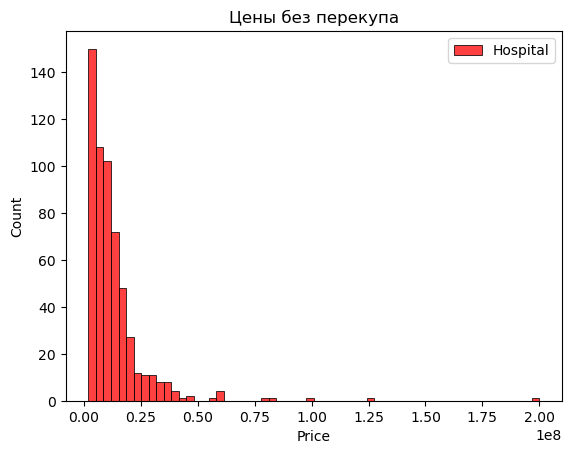

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


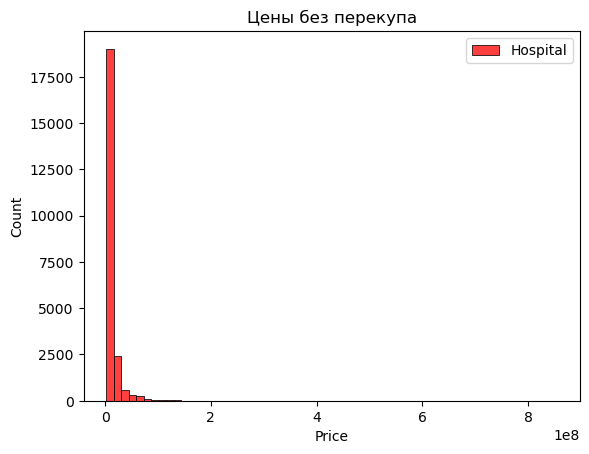

 
WashingMachine значения [0 1 9]
Значение 0 количество 10062704.583419582


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


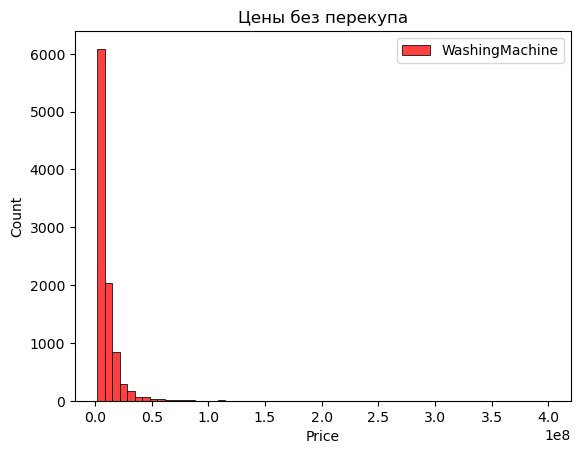

Значение 1 количество 17098301.58700696


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


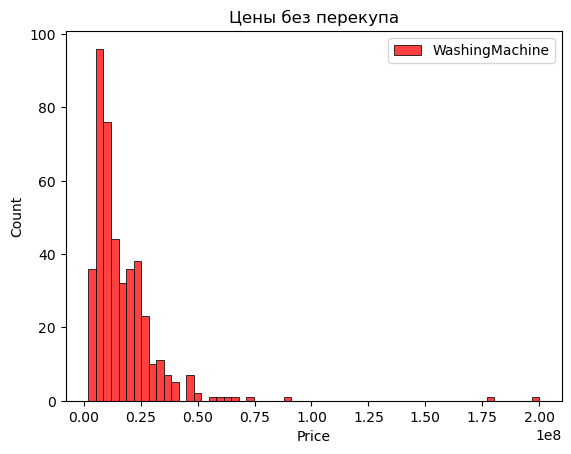

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


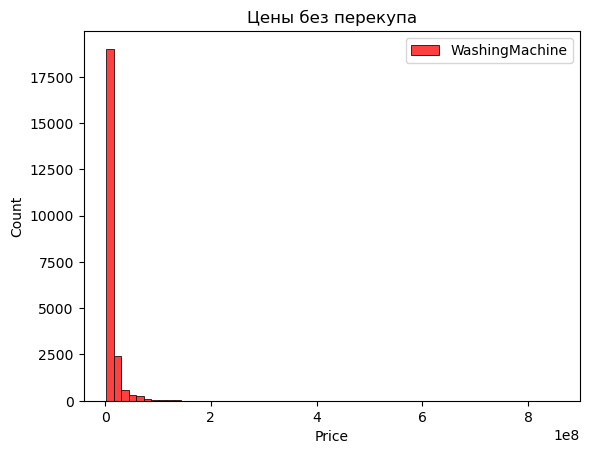

 
Gasconnection значения [0 1 9]
Значение 0 количество 9254266.007810622


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


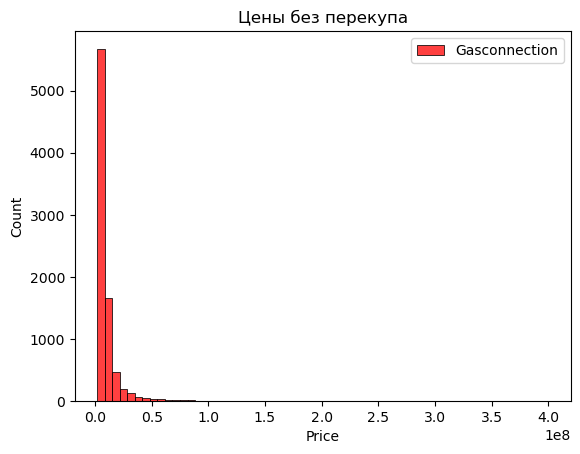

Значение 1 количество 15573810.24957651


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


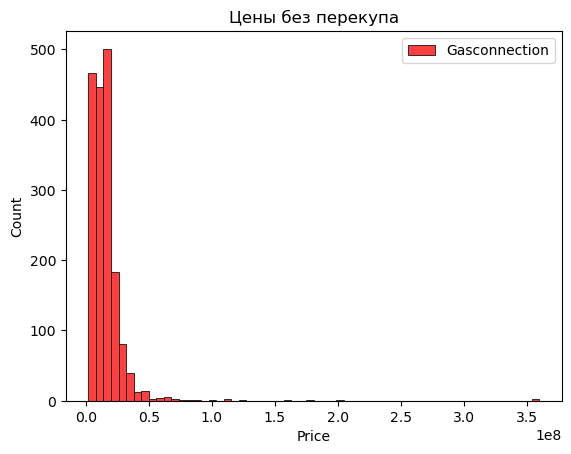

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


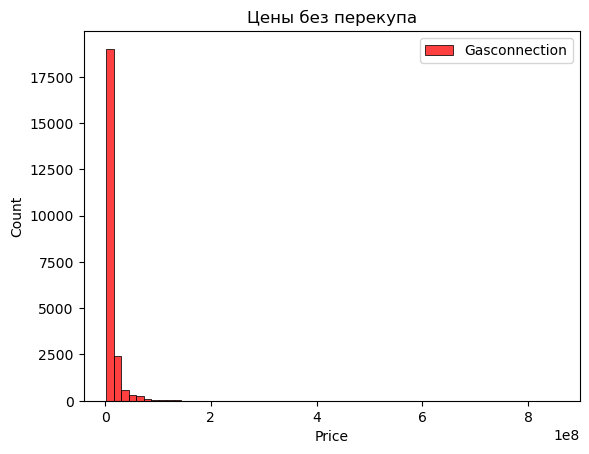

 
AC значения [0 1 9]
Значение 0 количество 9773040.431907026


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


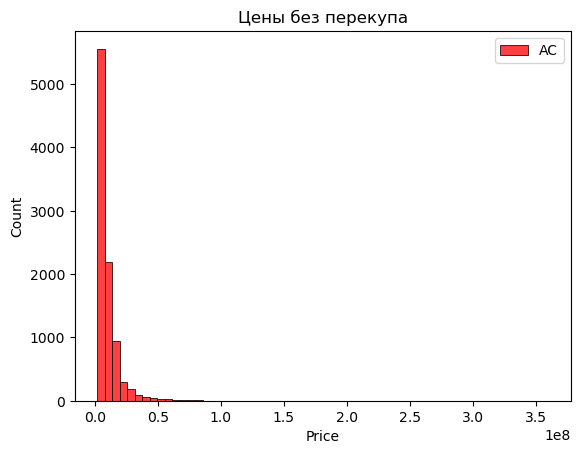

Значение 1 количество 19256993.600318473


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


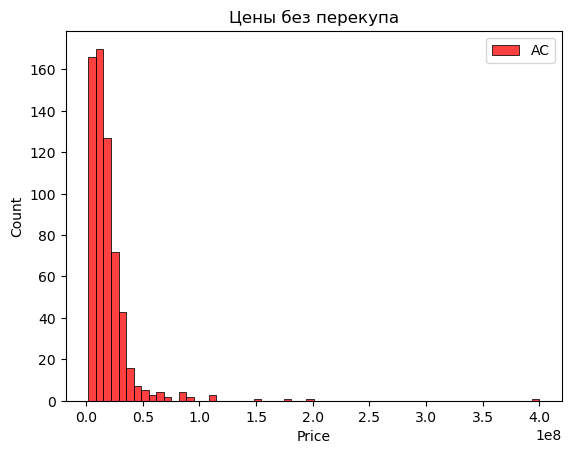

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


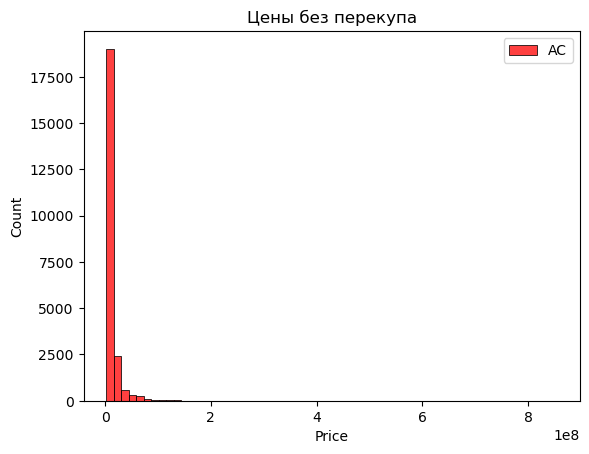

 
Wifi значения [0 9 1]
Значение 0 количество 10254991.074676637


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


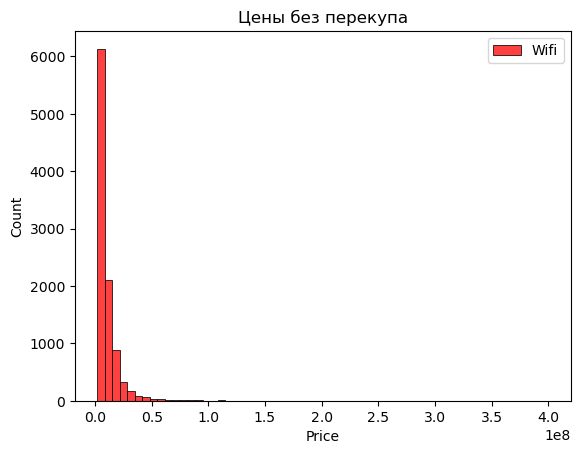

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


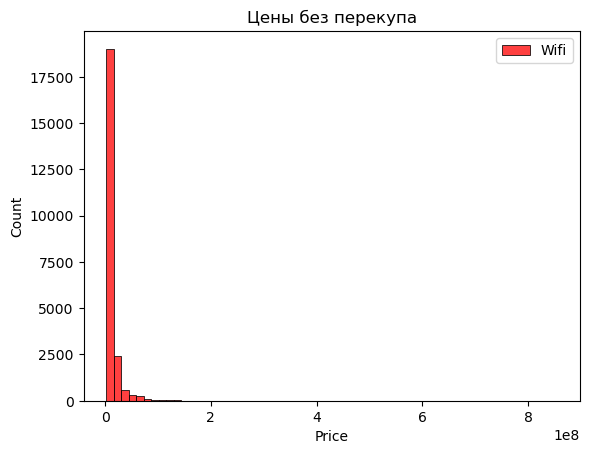

Значение 1 количество 15796081.187817259


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


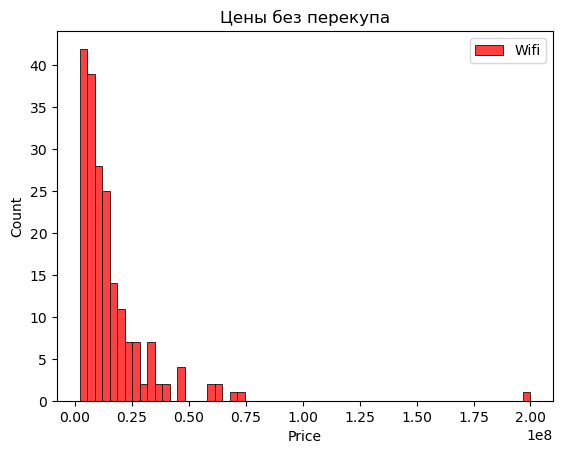

 
Children'splayarea значения [1 0 9]
Значение 1 количество 12380577.53126206


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


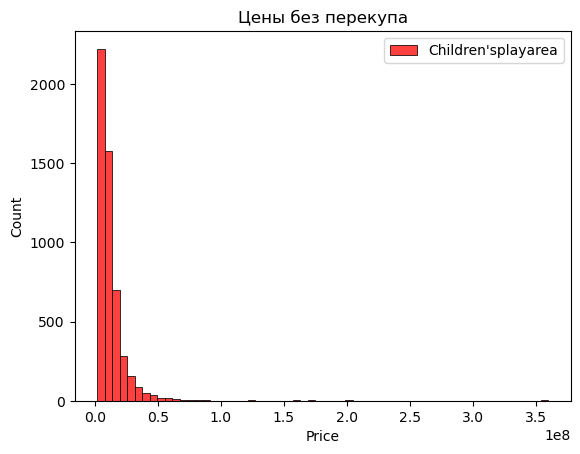

Значение 0 количество 8234385.441254327


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


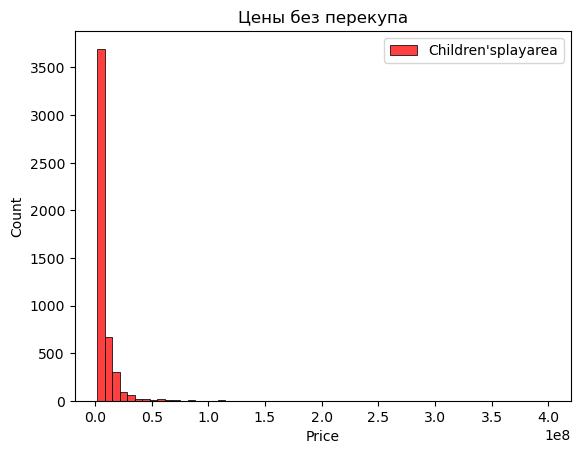

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


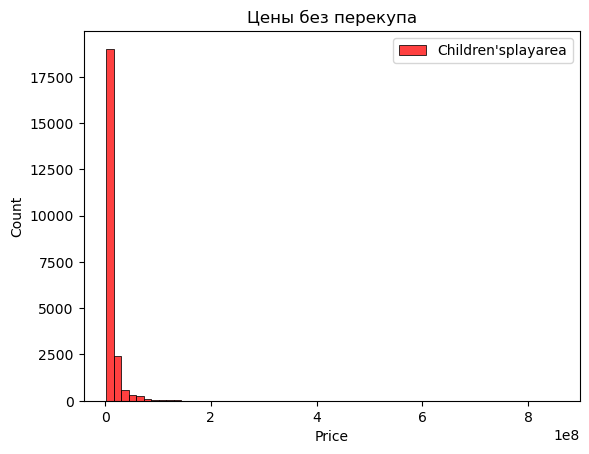

 
LiftAvailable значения [1 0 9]
Значение 1 количество 10991681.38329646


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


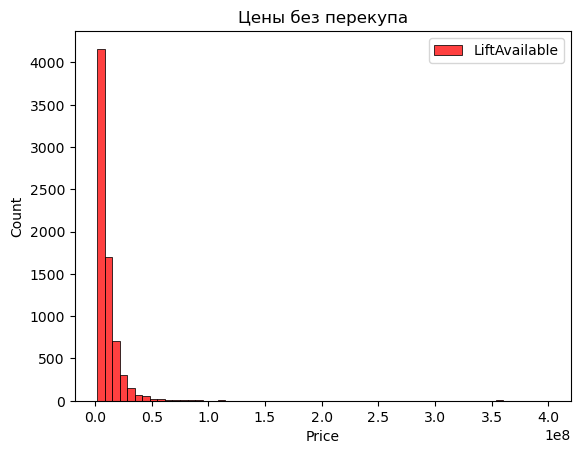

Значение 0 количество 8774337.610975184


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


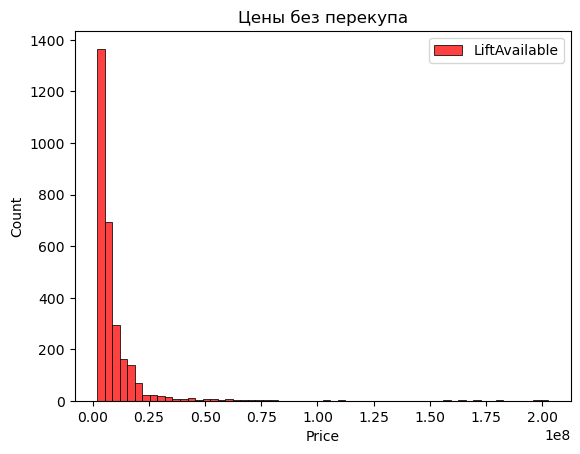

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


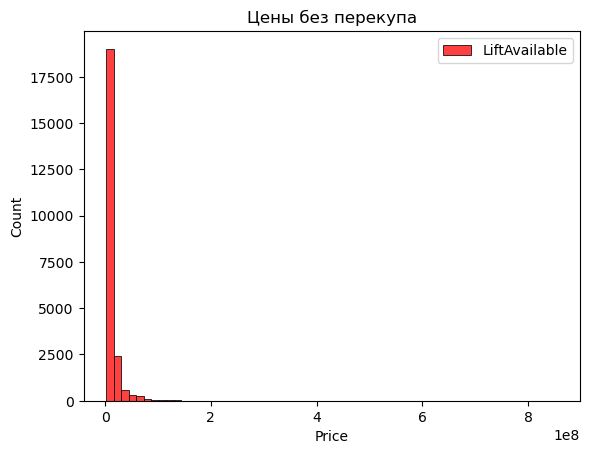

 
BED значения [0 1 9]
Значение 0 количество 9879294.276324395


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


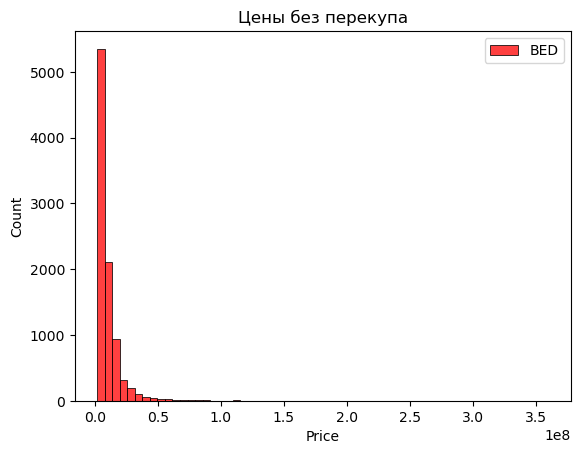

Значение 1 количество 15193225.220892275


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


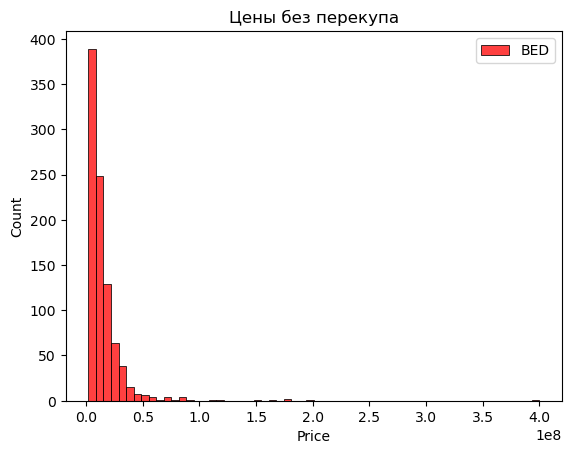

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


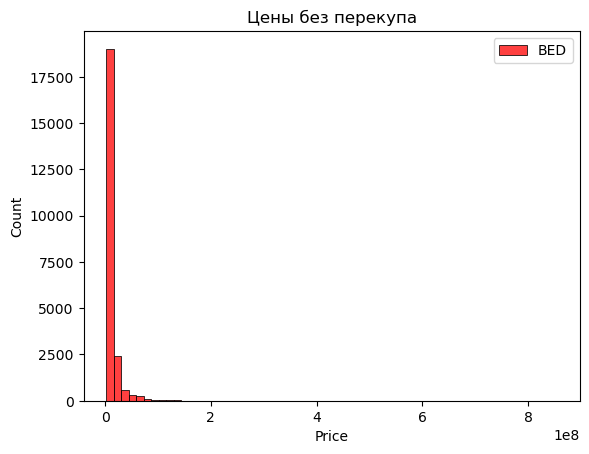

 
VaastuCompliant значения [0 1 9]
Значение 0 количество 9825420.515664691


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


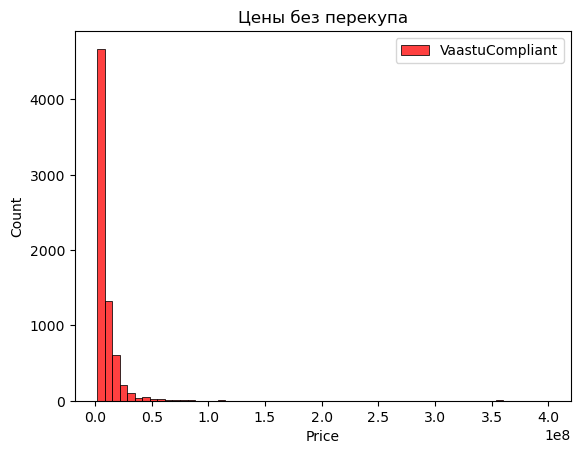

Значение 1 количество 11630292.615563685


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


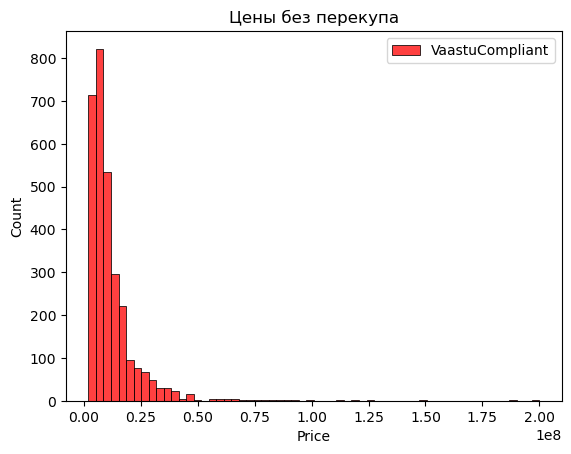

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


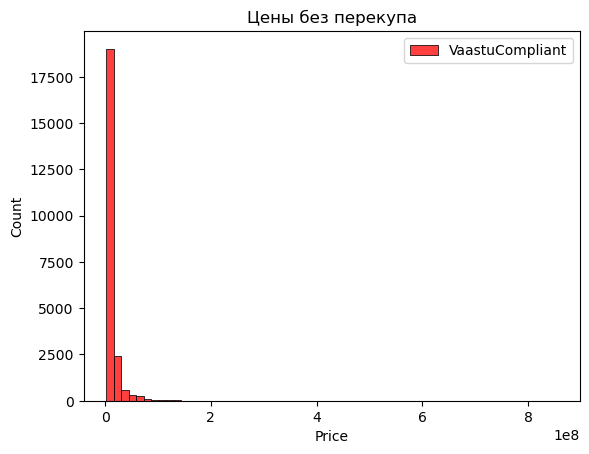

 
Microwave значения [0 1 9]
Значение 0 количество 10061047.040616538


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


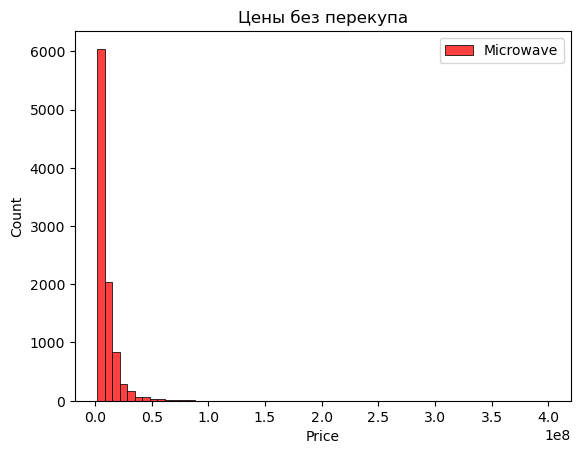

Значение 1 количество 16270969.419551935


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


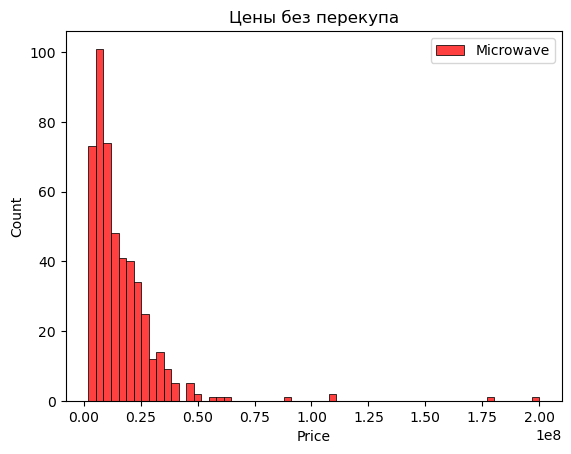

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


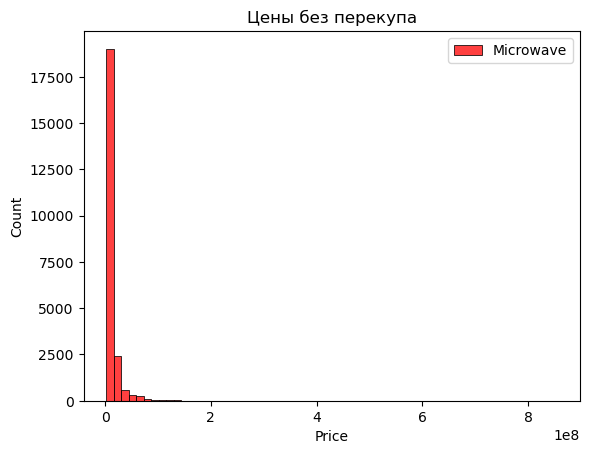

 
GolfCourse значения [0 1 9]
Значение 0 количество 10231461.94278481


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


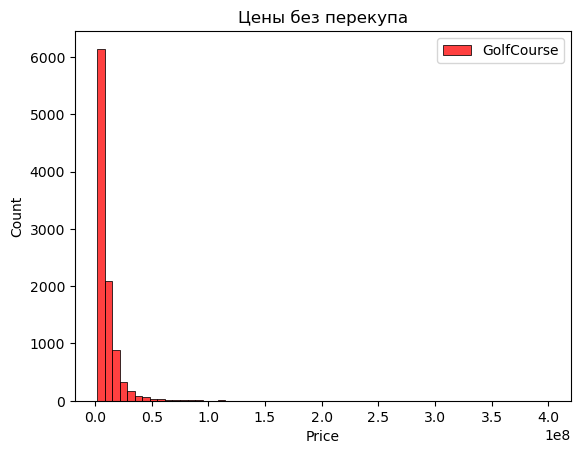

Значение 1 количество 16328132.95412844


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


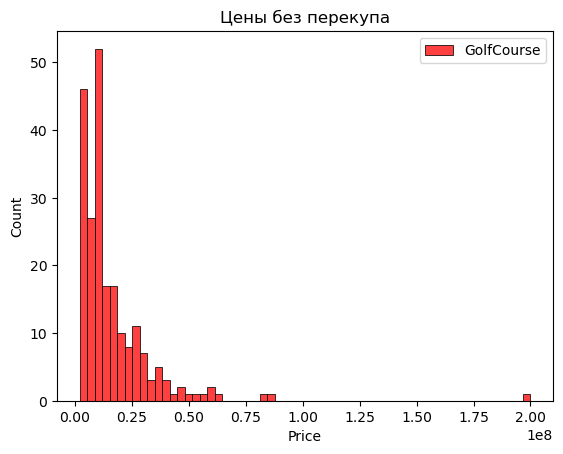

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


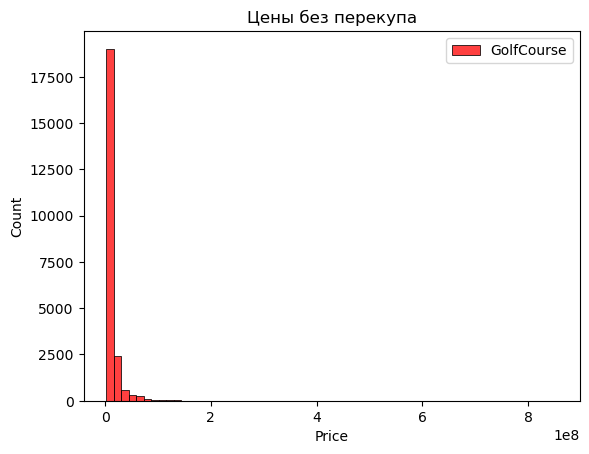

 
TV значения [0 1 9]
Значение 0 количество 10022645.162715064


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


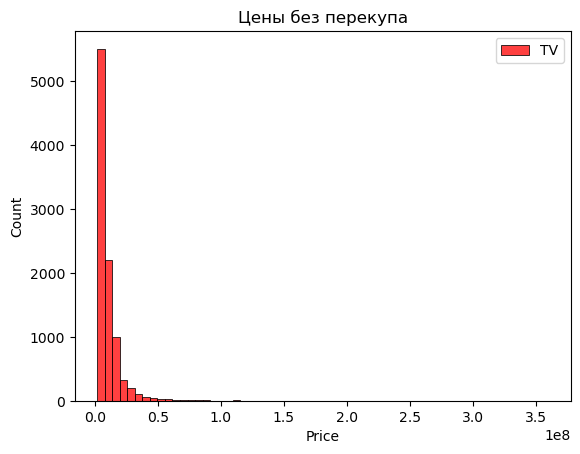

Значение 1 количество 16148602.456327986


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


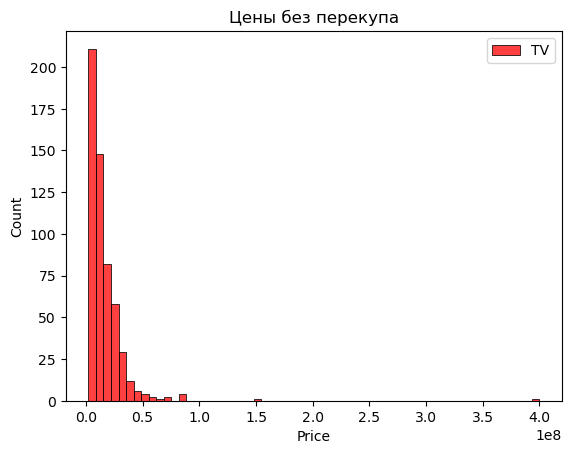

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


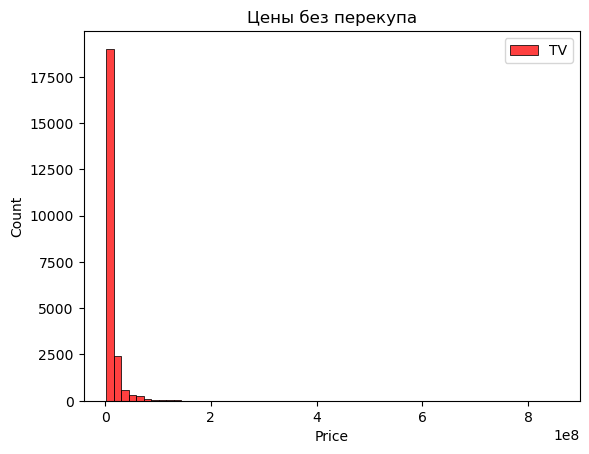

 
DiningTable значения [0 1 9]
Значение 0 количество 10075886.694801798


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


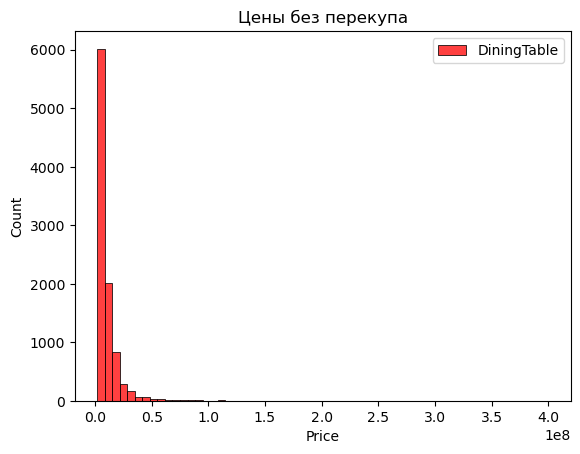

Значение 1 количество 15525689.812030075


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


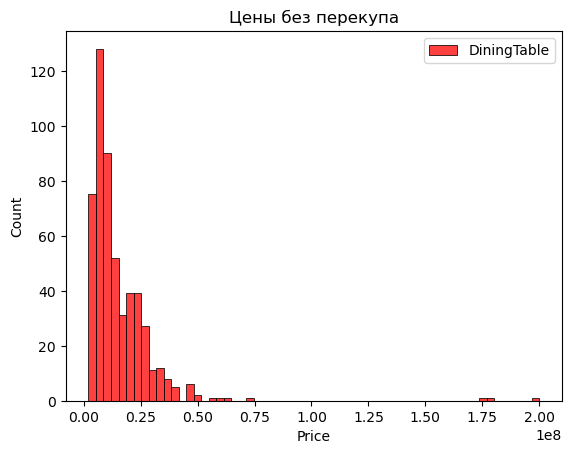

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


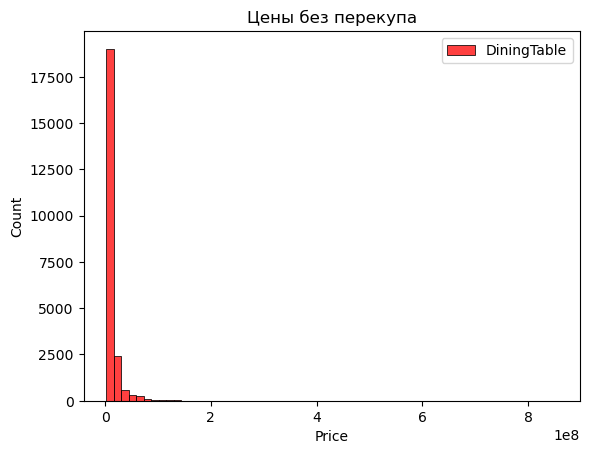

 
Sofa значения [0 1 9]
Значение 0 количество 10048307.619271323


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


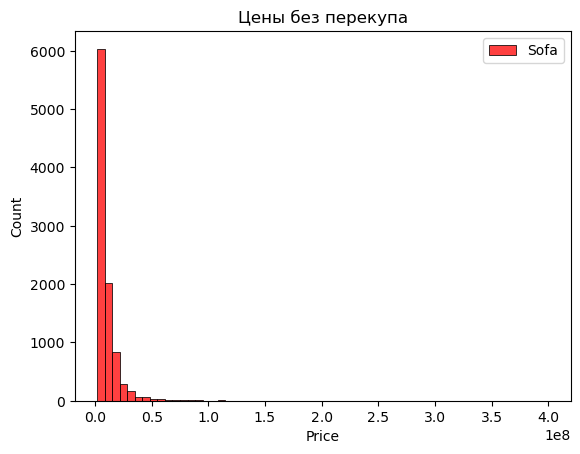

Значение 1 количество 16230507.750972763


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


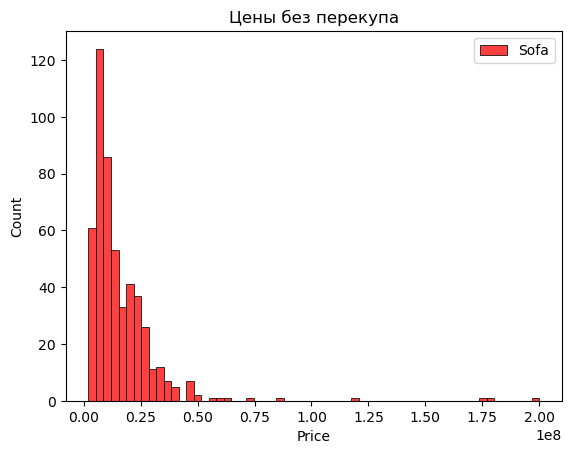

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


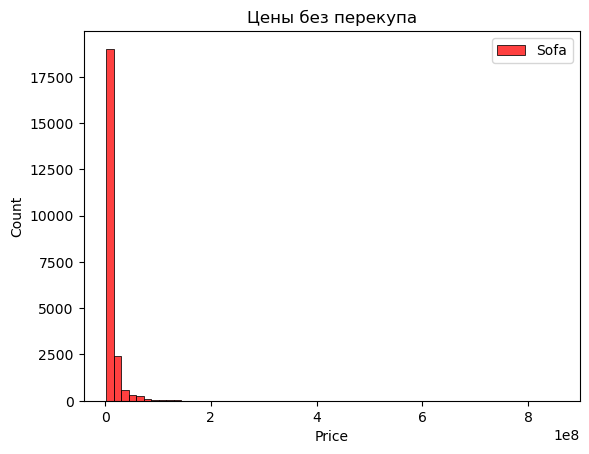

 
Wardrobe значения [0 9 1]
Значение 0 количество 10114150.138838291


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


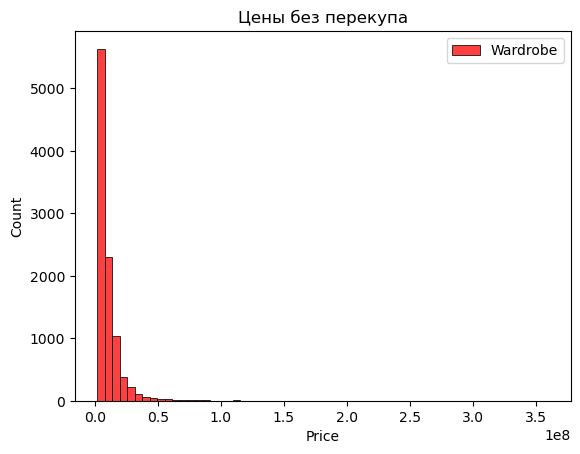

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


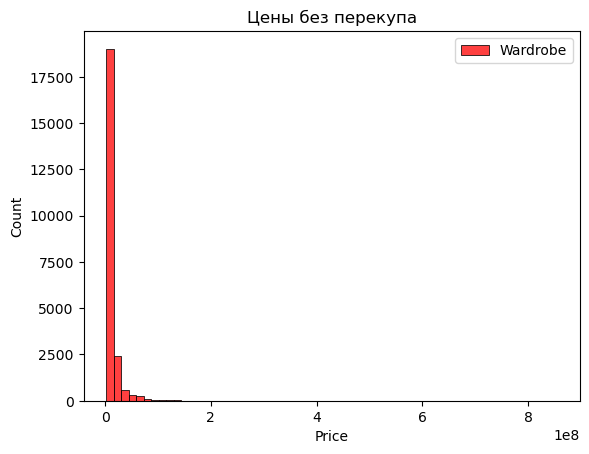

Значение 1 количество 22024587.663507108


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


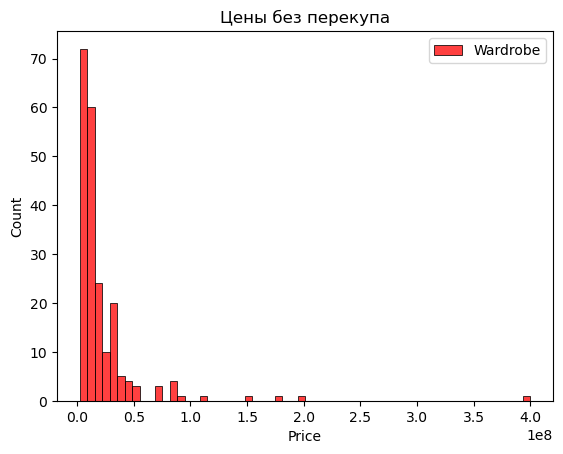

 
Stadium значения [0 1 9]
Значение 0 количество 10021251.168686025


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


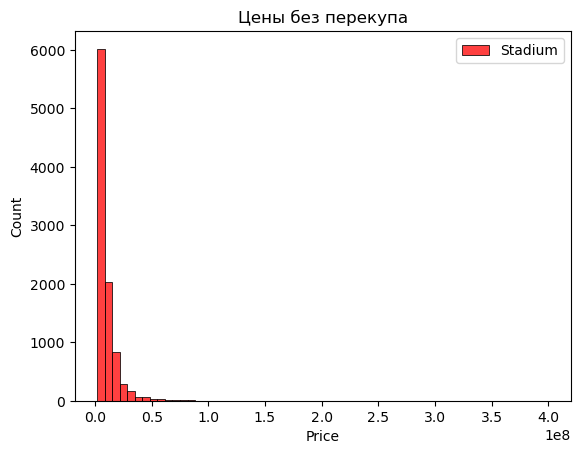

Значение 1 количество 16670059.691714836


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


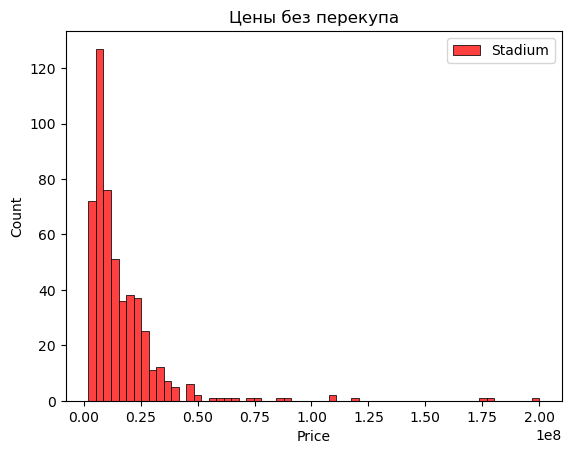

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


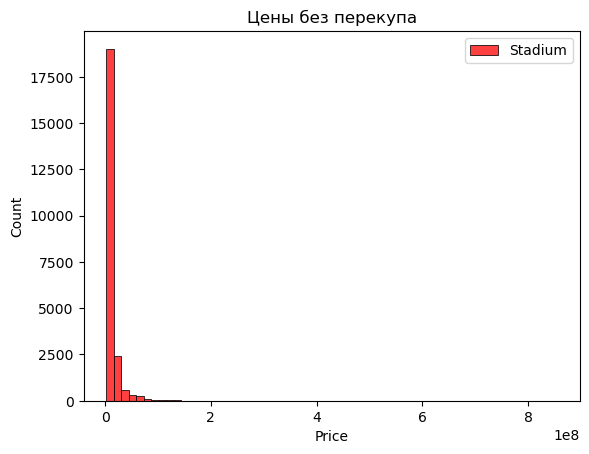

In [30]:
print(' ')

for i in df.columns[3:-1]:
    print(f'{i} значения {df[i].unique()}')
    
    for h in df[i].unique():
        print(f'Значение {h} количество {df[df[i] == h]["Price"].mean()}')
        sns.histplot(df[df[i] == h], x="Price",  bins=60, color = 'r',label=f"{i}",kde=False).set(title='Цены без перекупа')
        plt.legend()
        plt.show()
    print(' ')



По полученным графикам можно судить, что большинство из квартив находится в районе минимальной цены и квартиры, что имеют наибольшее количество удобств являют собой наиболее разнородные по ценам квартиры, которые имеются в датасете.

 
No. of Bedrooms значения [4 2 3 1 5 6 7 8 9]
Значение 4 количество 23520126.535552192


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


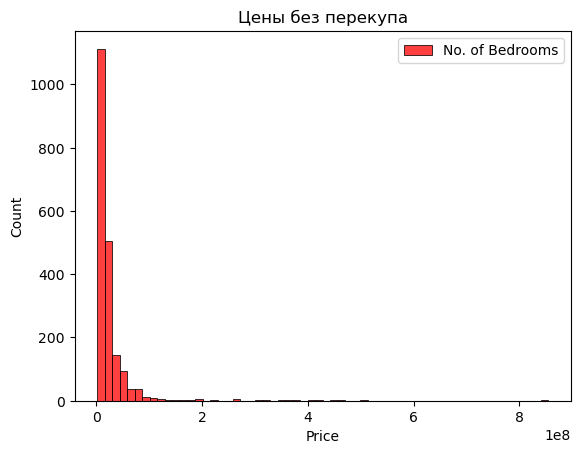

Значение 2 количество 9283856.311505293


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


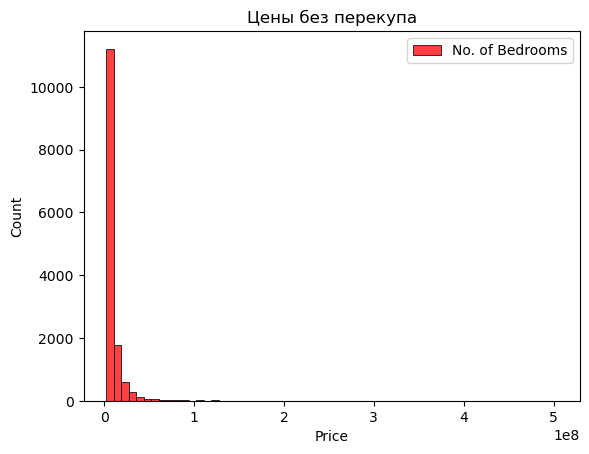

Значение 3 количество 12251197.566449666


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


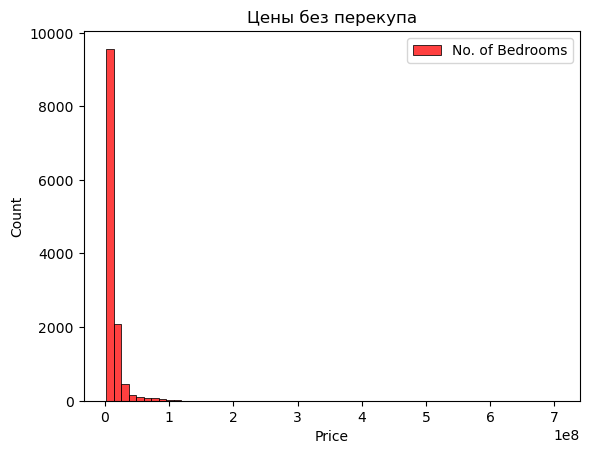

Значение 1 количество 9511563.107855847


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


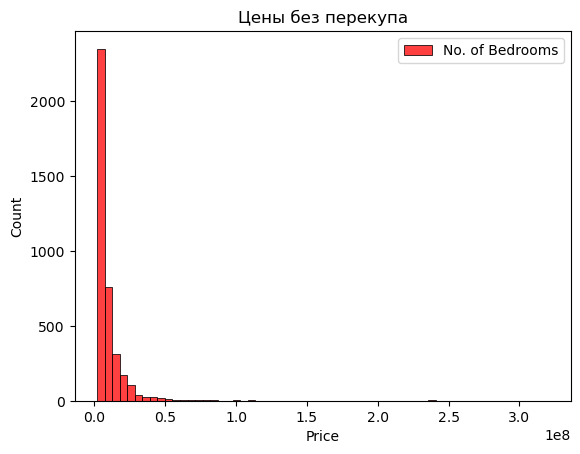

Значение 5 количество 60996471.94392523


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


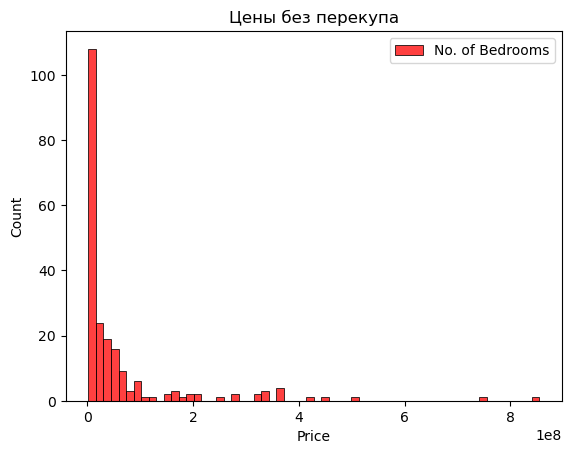

Значение 6 количество 42072727.27272727


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


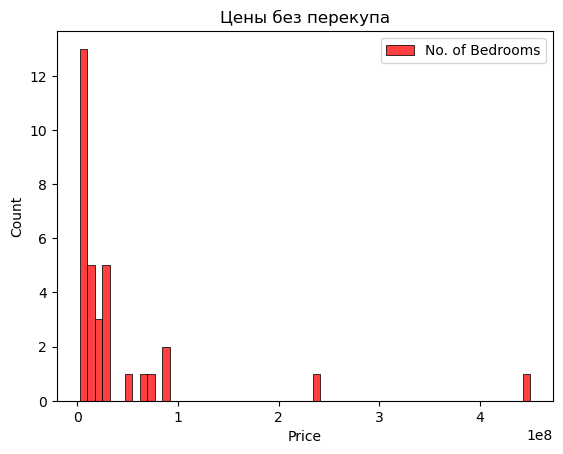

Значение 7 количество 21122888.888888888


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


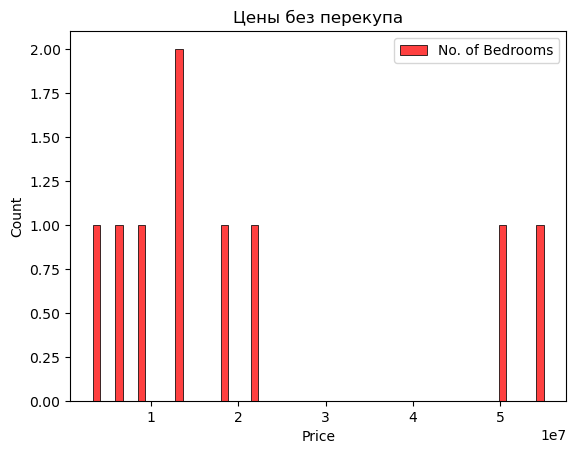

Значение 8 количество 76700000.0


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


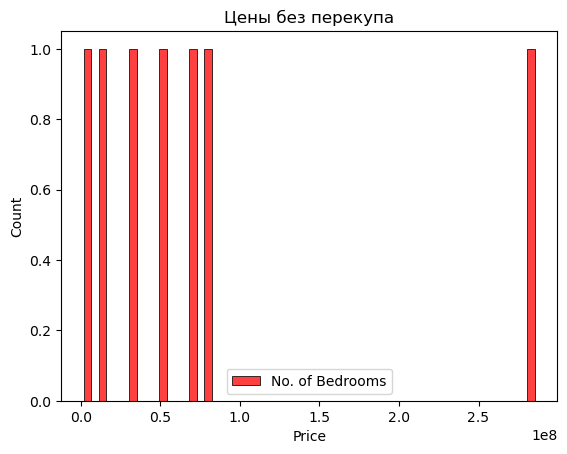

Значение 9 количество 2400000.0


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


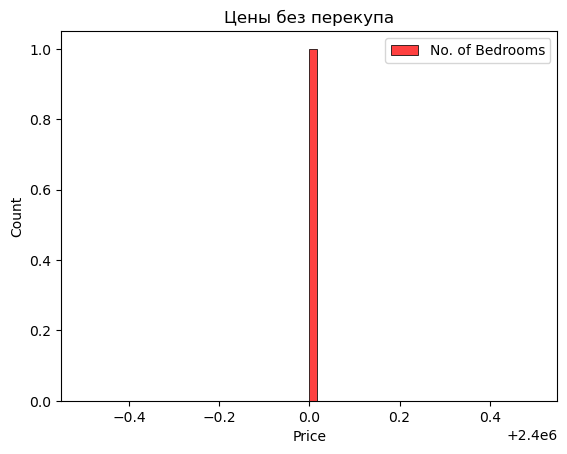

 
Resale значения [0 1]
Значение 0 количество 10646612.482516797


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


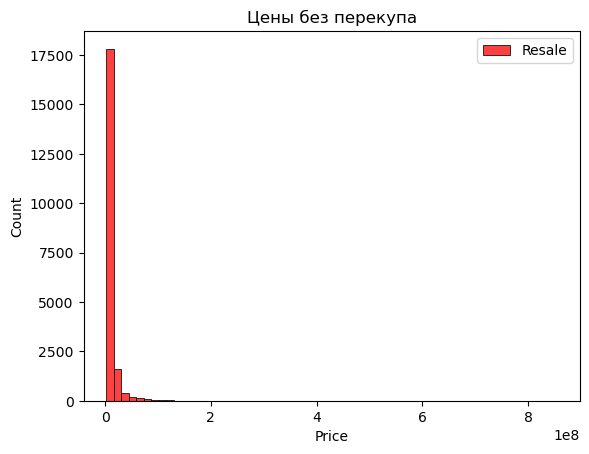

Значение 1 количество 13373704.486955138


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


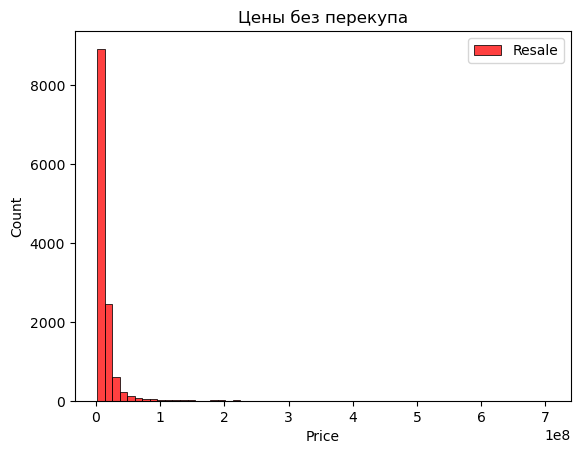

 
MaintenanceStaff значения [1 0 9]
Значение 1 количество 13021151.706976743


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


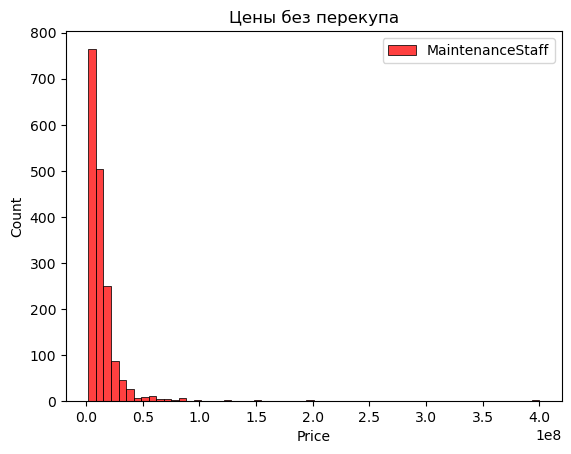

Значение 0 количество 9817131.10390541


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


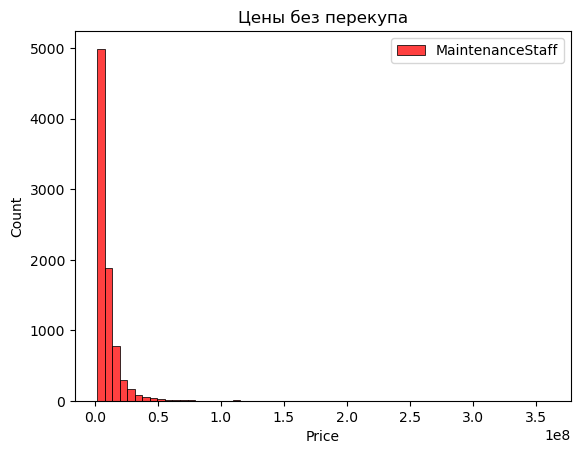

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


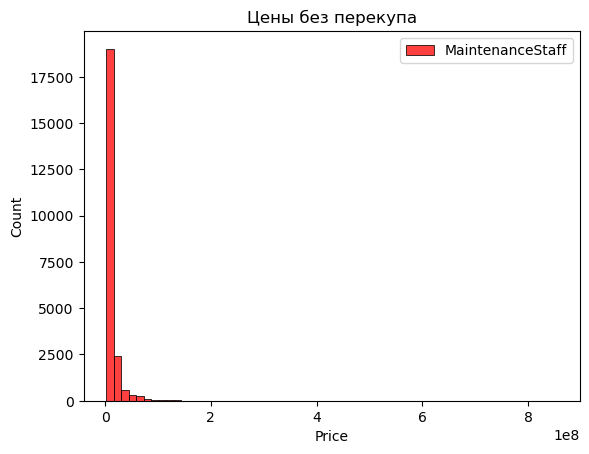

 
Gymnasium значения [1 0 9]
Значение 1 количество 12196694.973173516


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


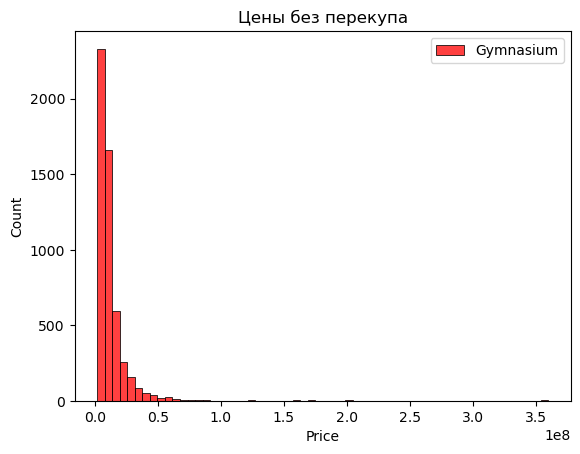

Значение 0 количество 8370765.120942733


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


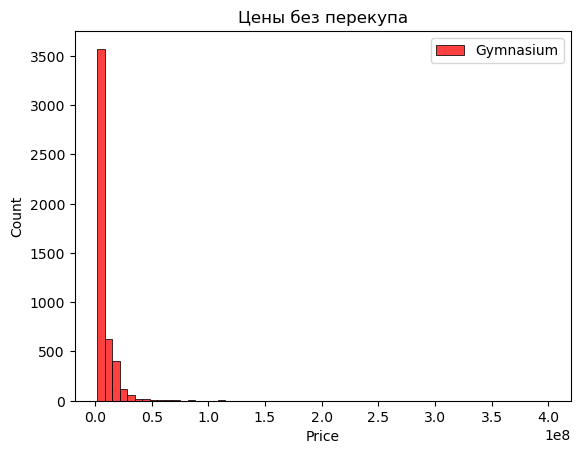

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


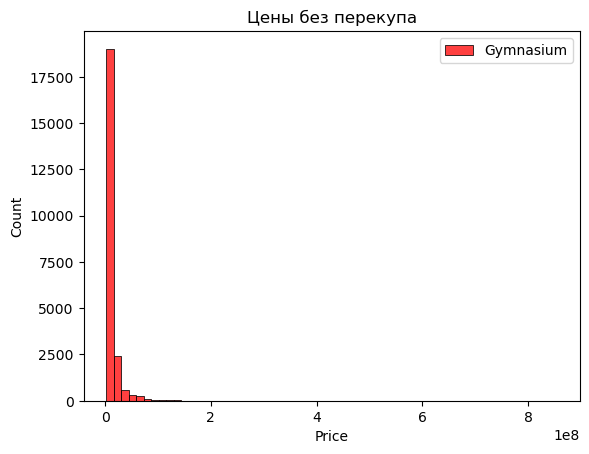

 
SwimmingPool значения [1 0 9]
Значение 1 количество 12889710.555873925


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


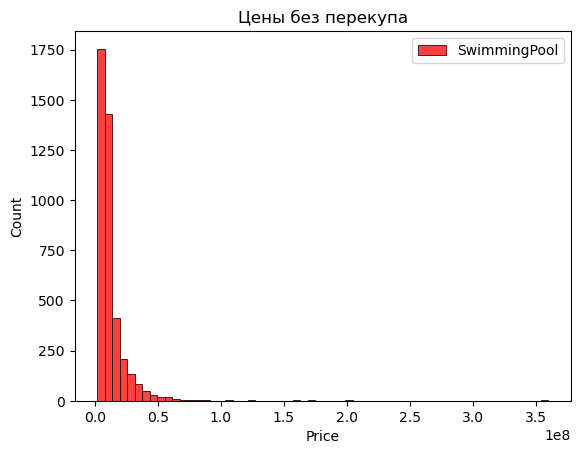

Значение 0 количество 8571229.781710414


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


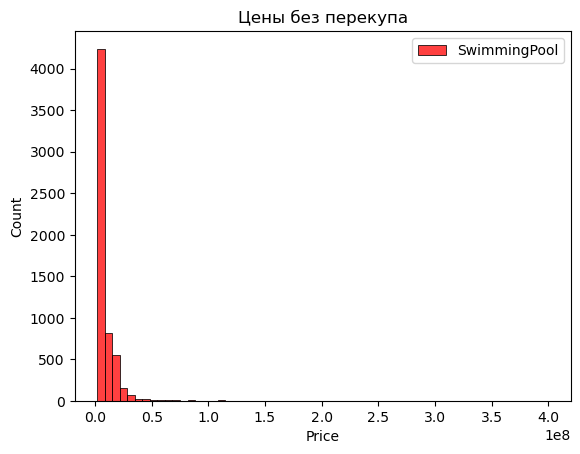

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


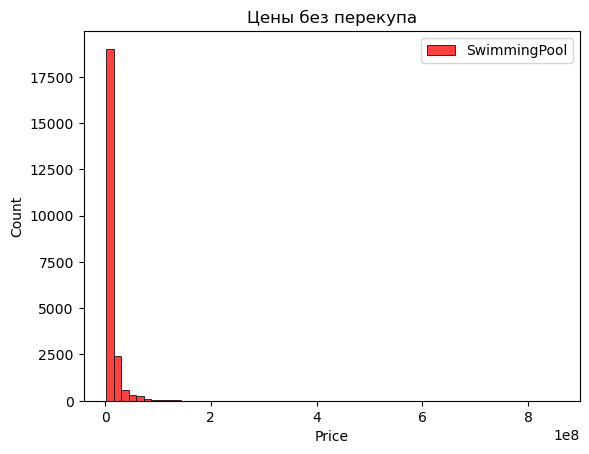

 
LandscapedGardens значения [1 0 9]
Значение 1 количество 12650847.2392847


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


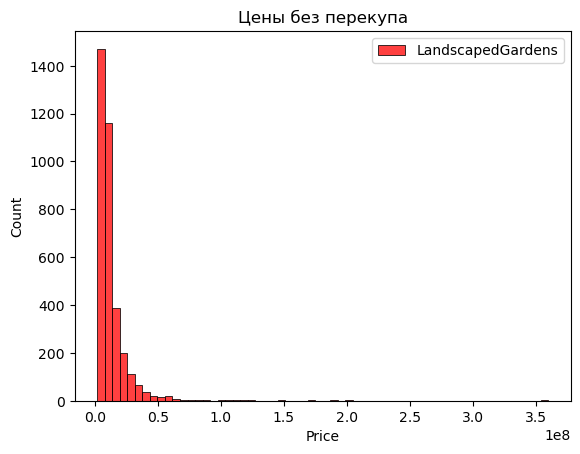

Значение 0 количество 9136420.828767123


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


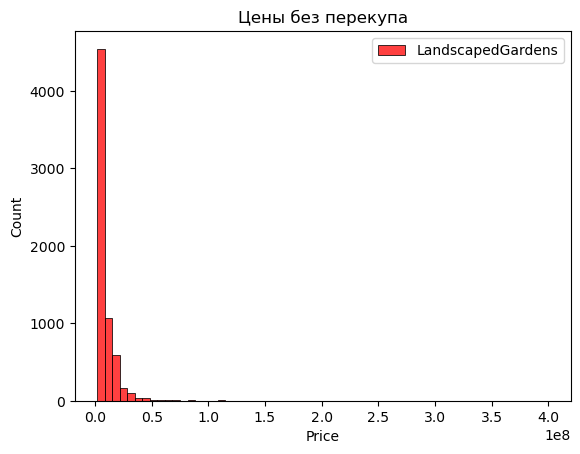

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


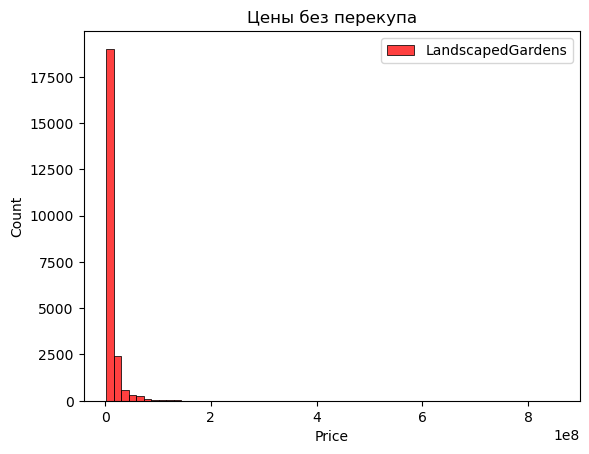

 
JoggingTrack значения [1 0 9]
Значение 1 количество 12319175.633769322


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


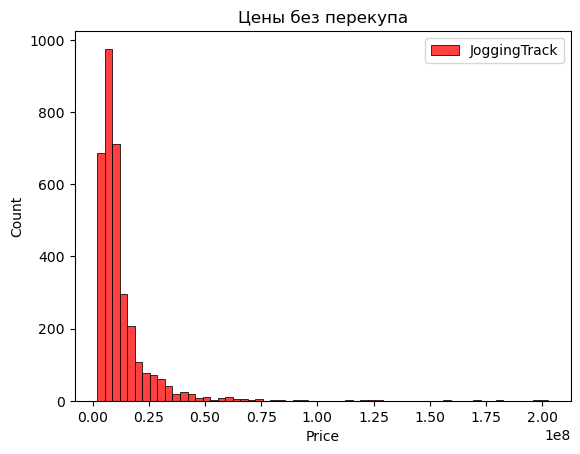

Значение 0 количество 9385274.607965522


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


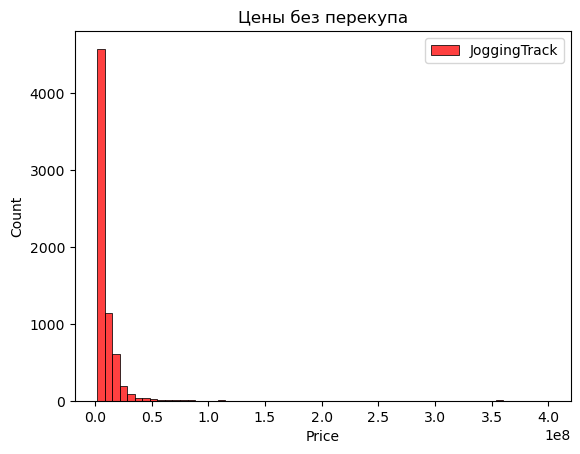

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


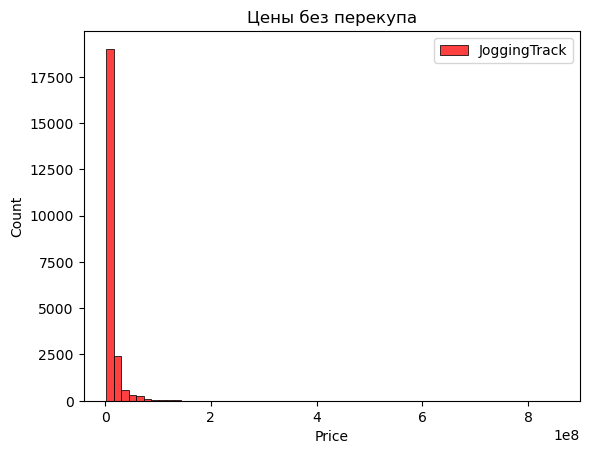

 
RainWaterHarvesting значения [1 0 9]
Значение 1 количество 12753798.125033684


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


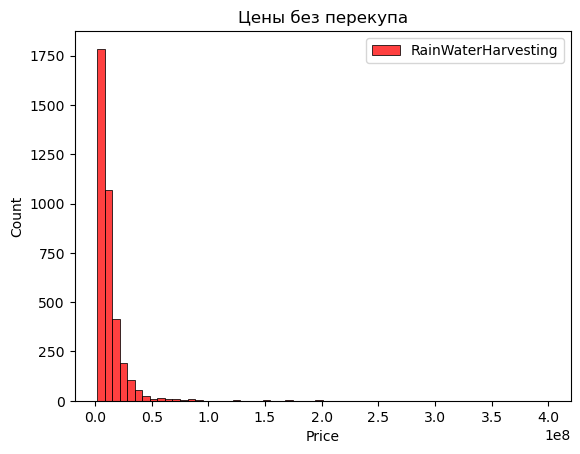

Значение 0 количество 8973029.587433407


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


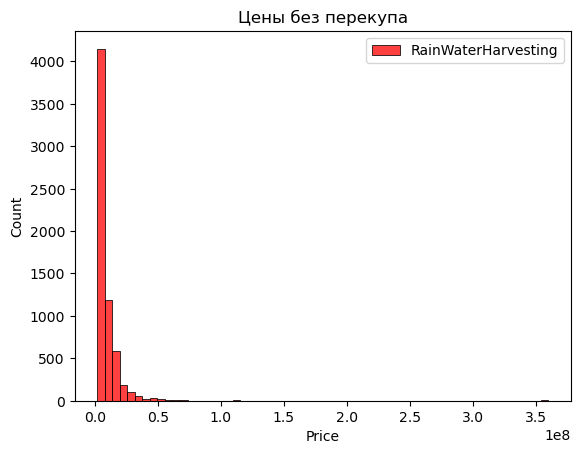

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


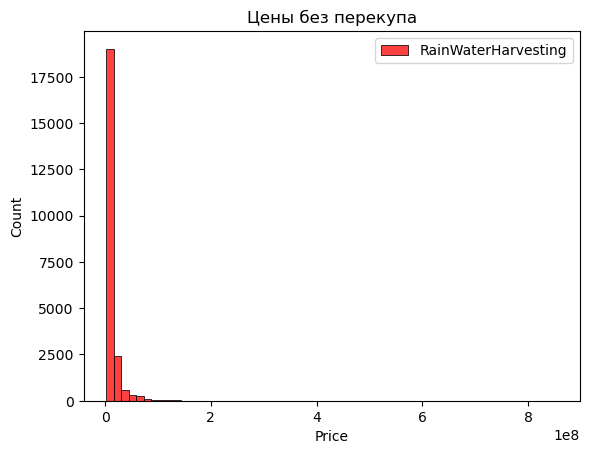

 
IndoorGames значения [1 0 9]
Значение 1 количество 12467854.406283857


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


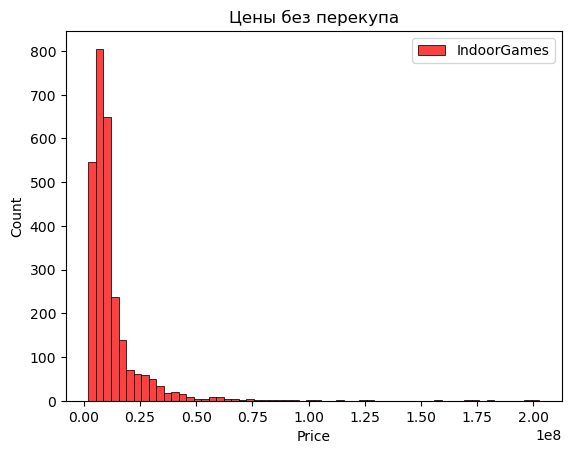

Значение 0 количество 9567412.727744402


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


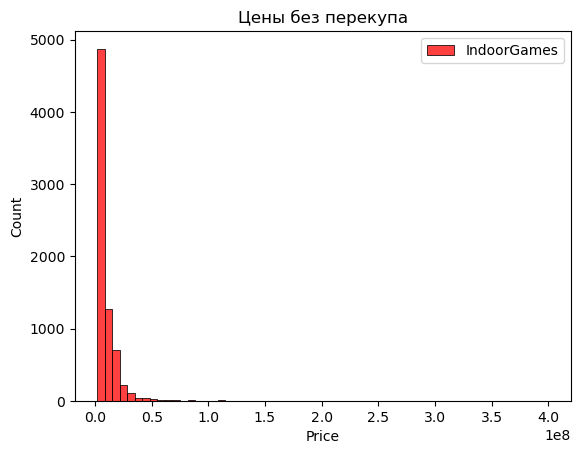

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


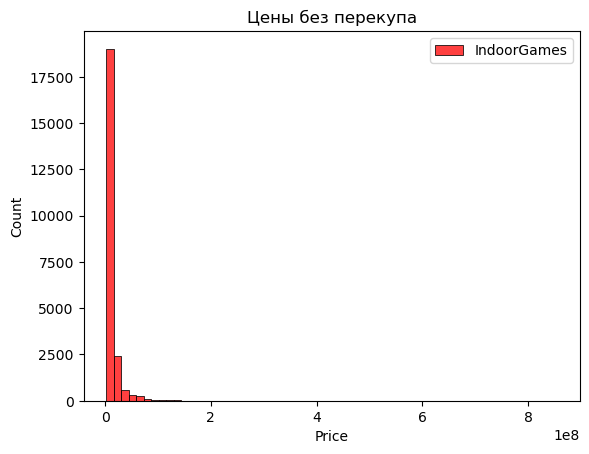

 
ShoppingMall значения [0 1 9]
Значение 0 количество 10194475.612889413


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


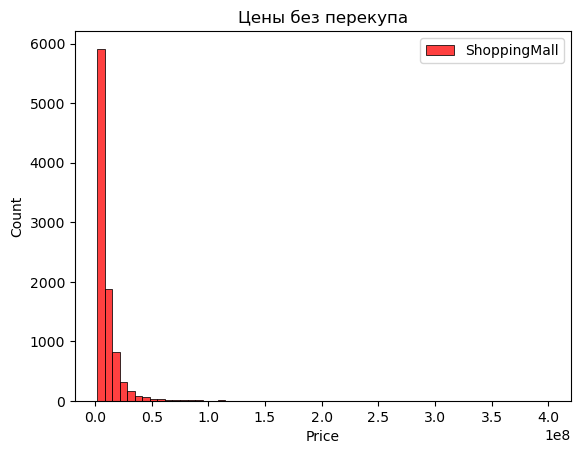

Значение 1 количество 12458275.224734042


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


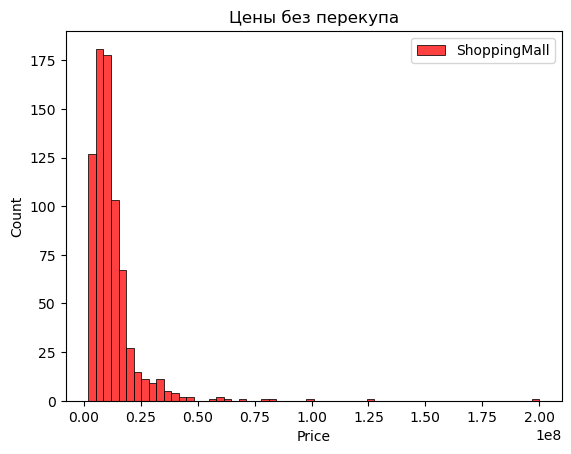

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


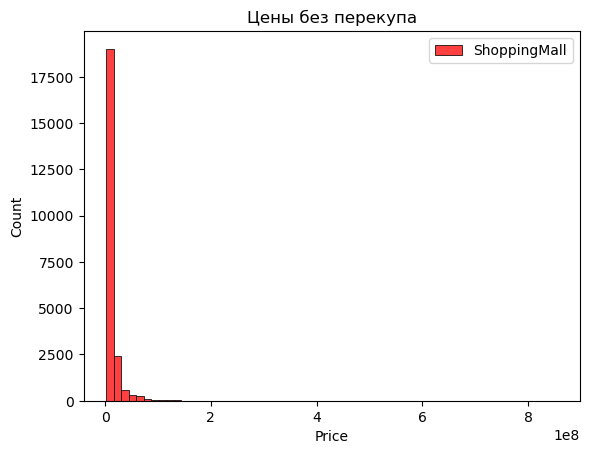

 
Intercom значения [1 0 9]
Значение 1 количество 11829480.003508773


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


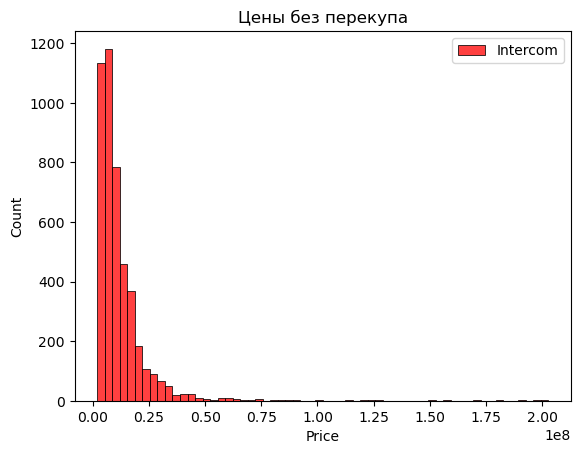

Значение 0 количество 9154670.315018978


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


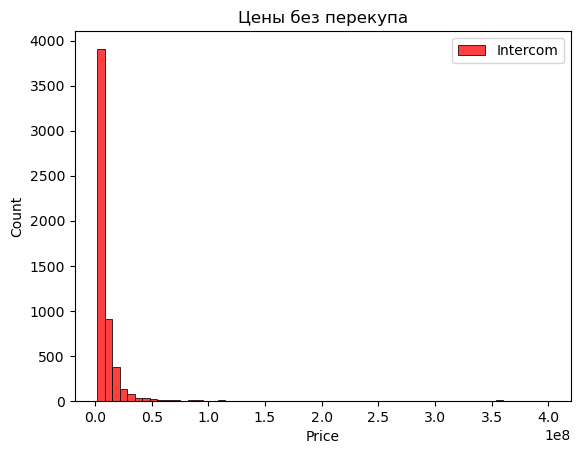

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


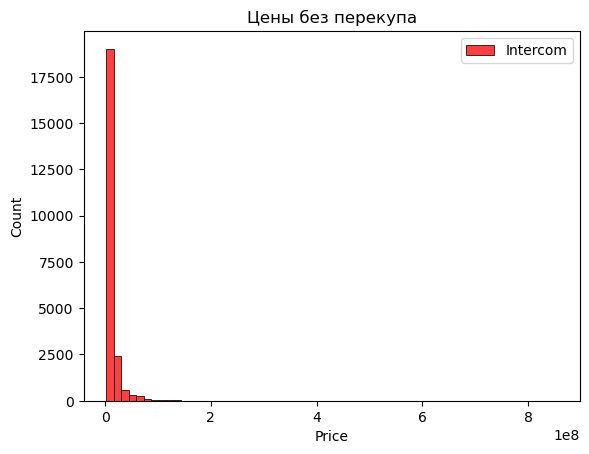

 
SportsFacility значения [1 0 9]
Значение 1 количество 13255095.23096355


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


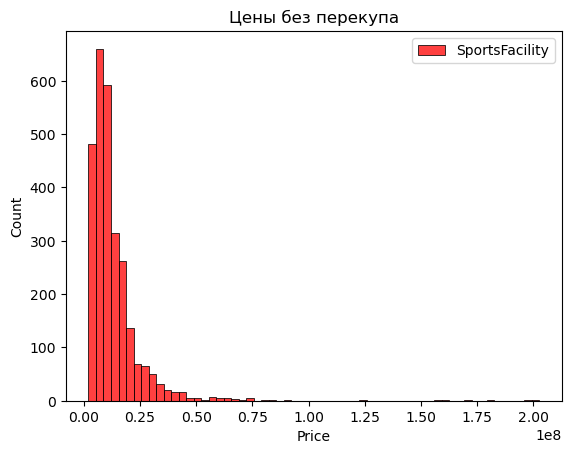

Значение 0 количество 9268690.355640536


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


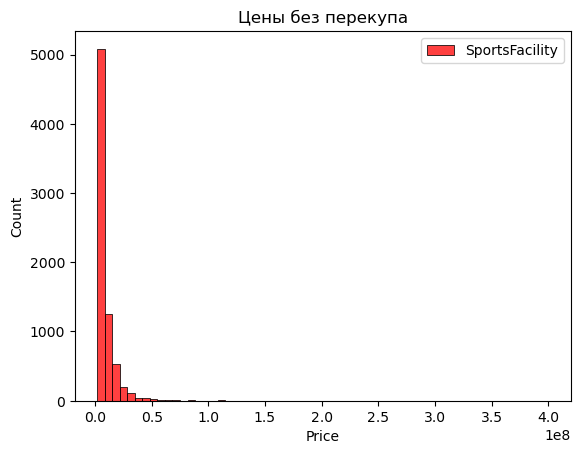

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


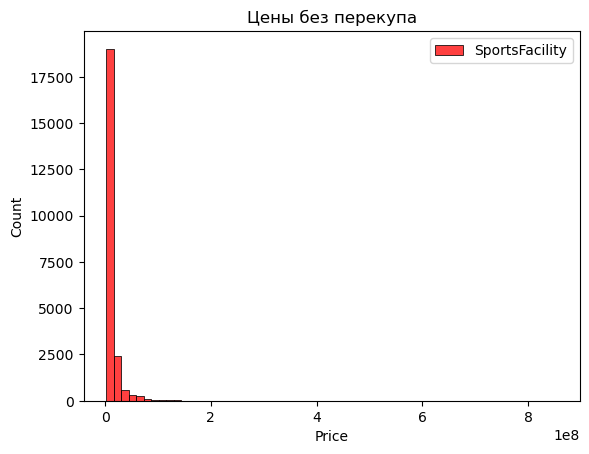

 
ATM значения [0 1 9]
Значение 0 количество 10194053.6494709


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


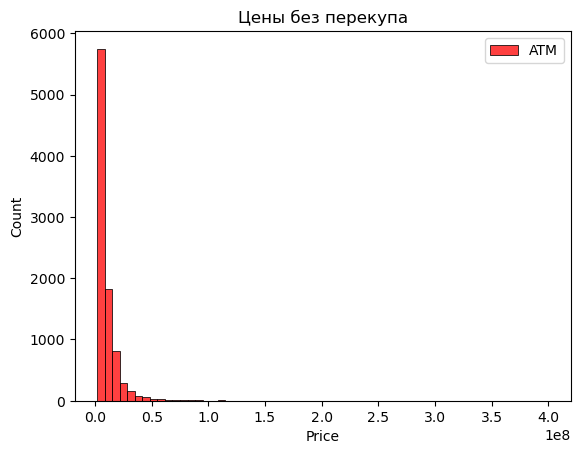

Значение 1 количество 11865587.620959843


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


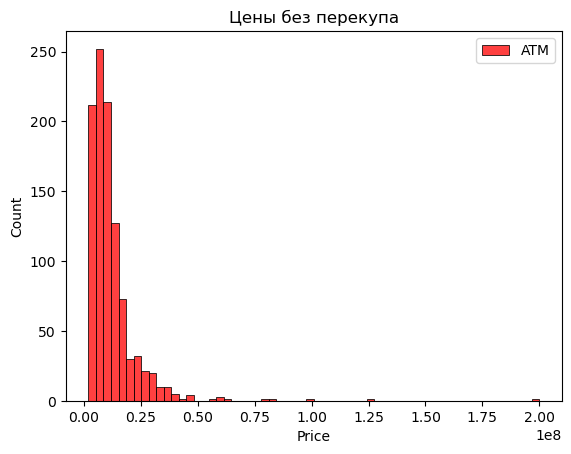

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


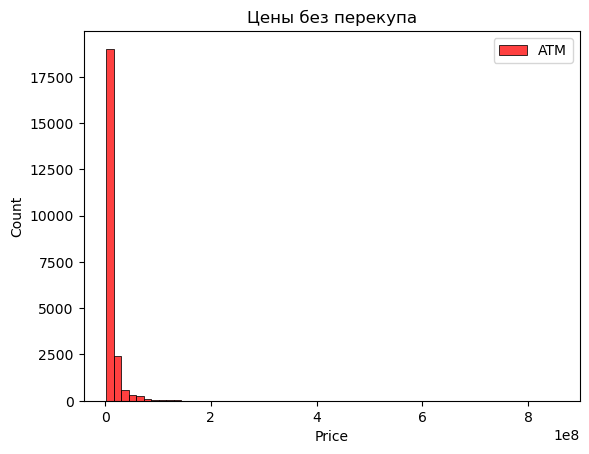

 
ClubHouse значения [1 0 9]
Значение 1 количество 12870753.083313664


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


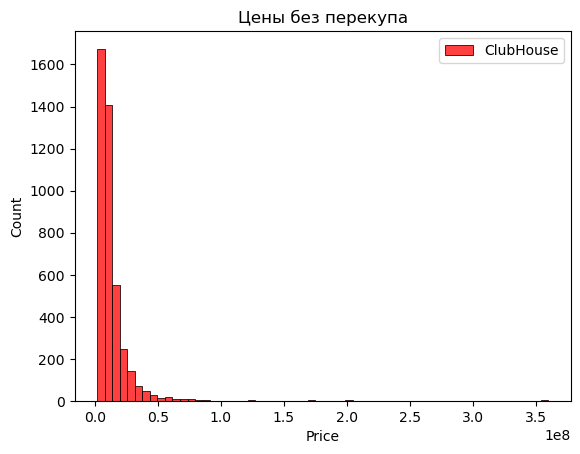

Значение 0 количество 8548811.27988388


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


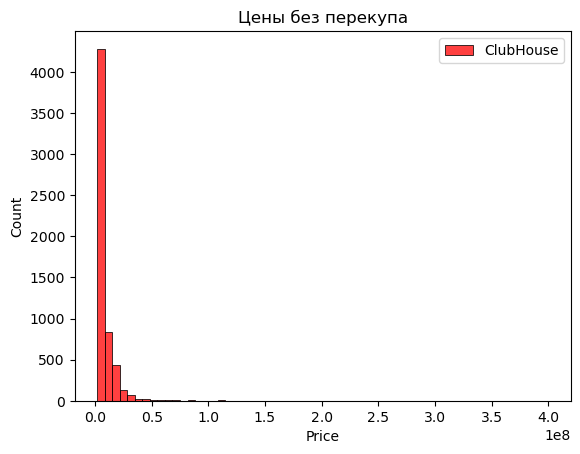

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


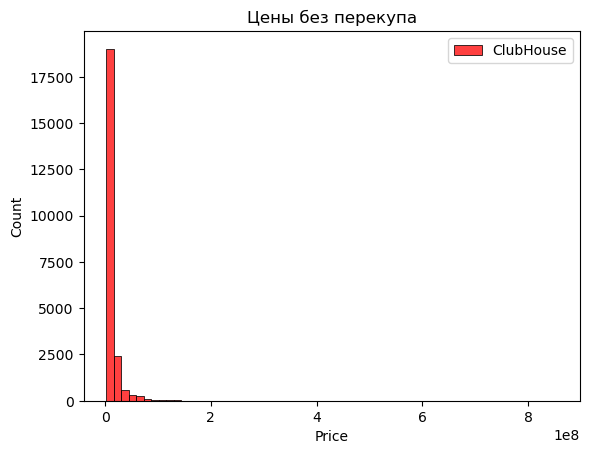

 
School значения [0 1 9]
Значение 0 количество 10279968.00545163


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


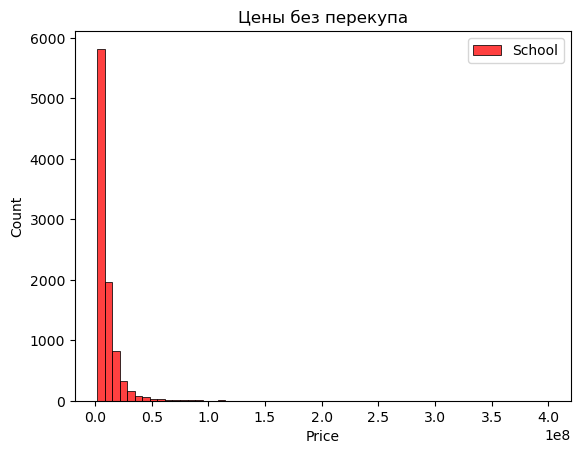

Значение 1 количество 11417505.390243903


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


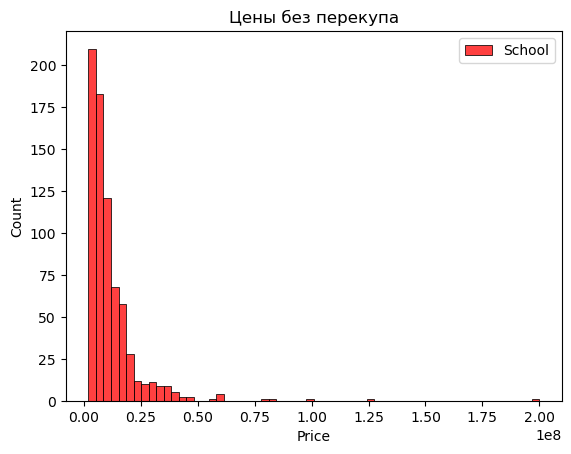

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


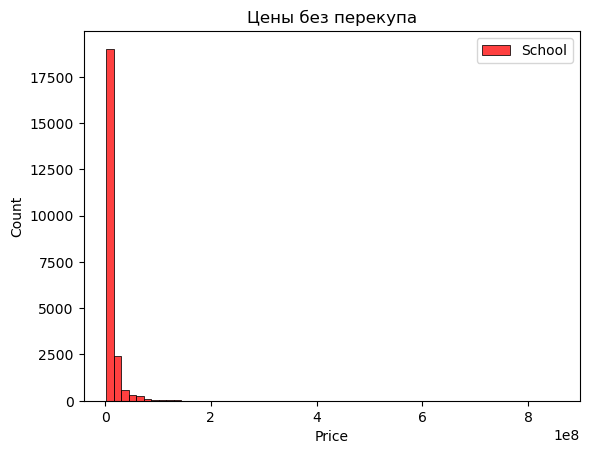

 
24X7Security значения [1 0 9]
Значение 1 количество 12588885.276689412


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


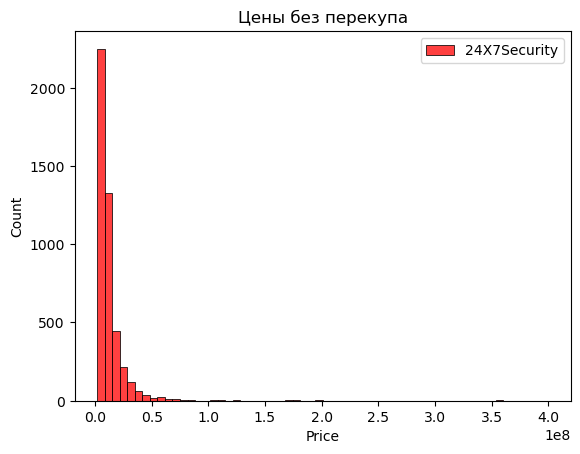

Значение 0 количество 8541245.74


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


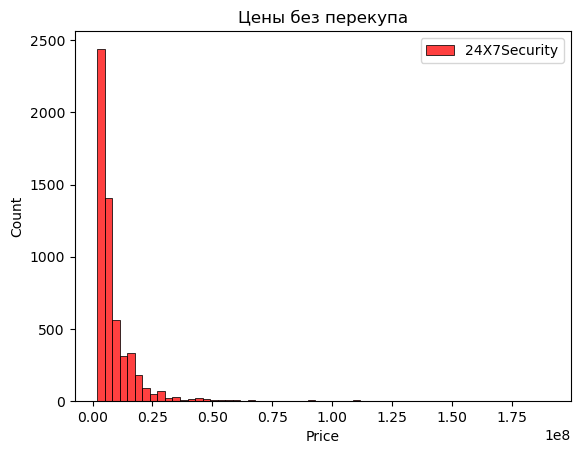

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


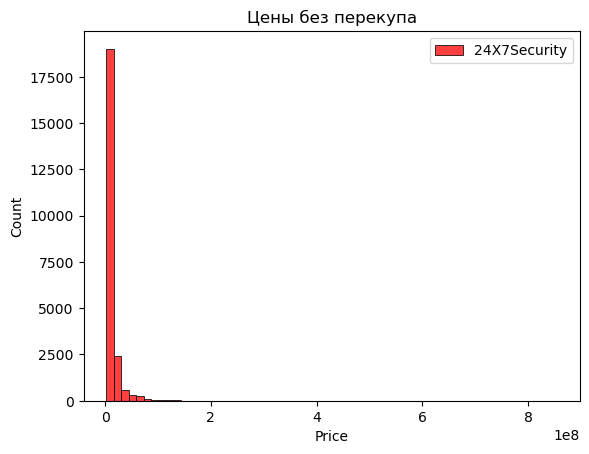

 
PowerBackup значения [1 0 9]
Значение 1 количество 11914769.71651752


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


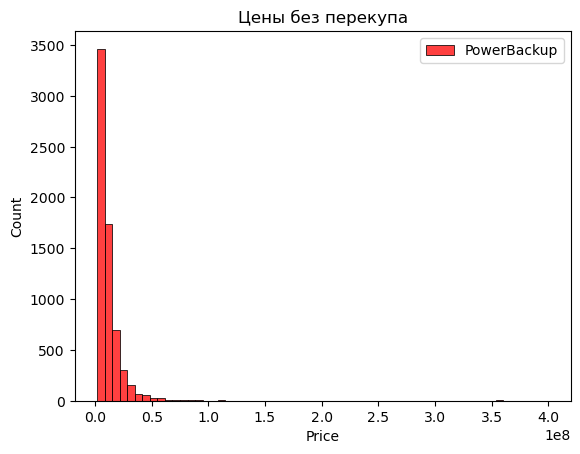

Значение 0 количество 7440326.550857143


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


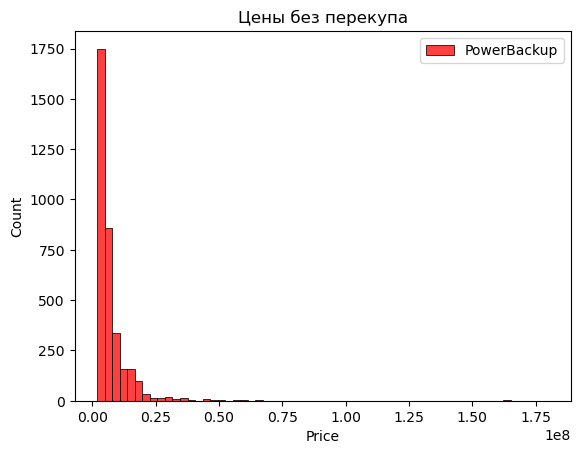

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


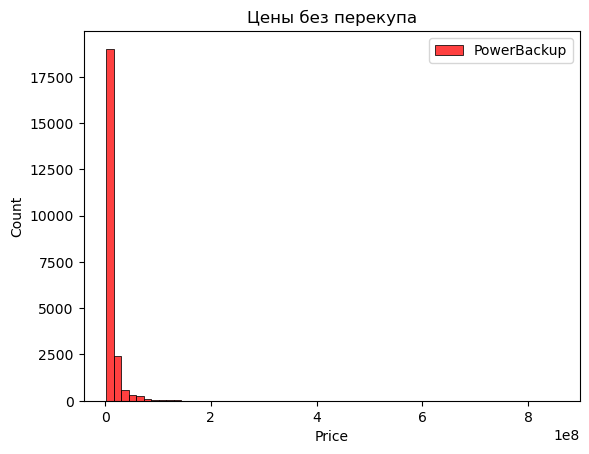

 
CarParking значения [0 1 9]
Значение 0 количество 8540981.99332839


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


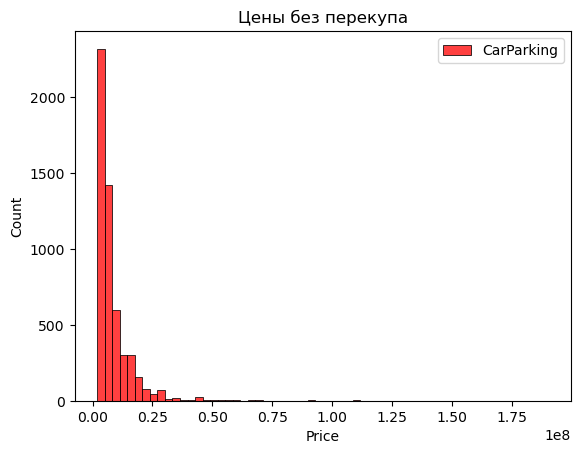

Значение 1 количество 12456478.780711092


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


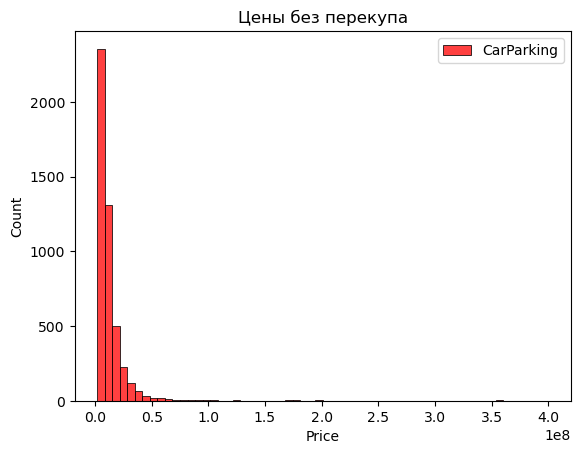

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


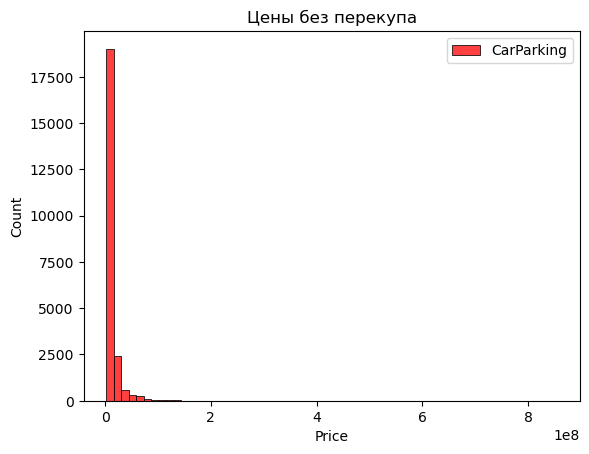

 
StaffQuarter значения [0 1 9]
Значение 0 количество 9894685.701800365


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


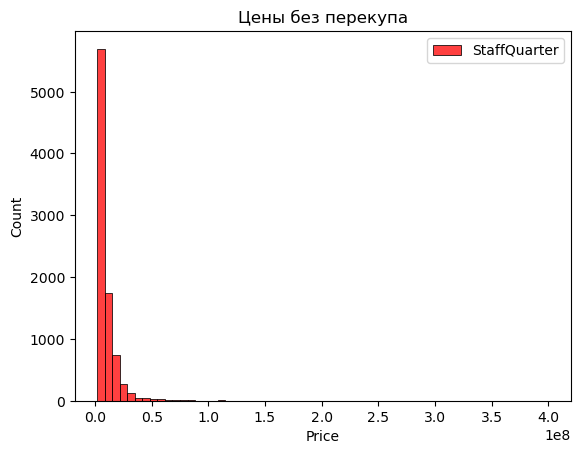

Значение 1 количество 13484782.04252088


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


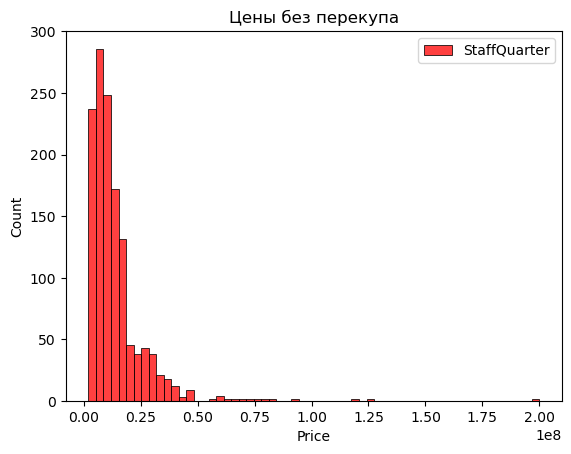

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


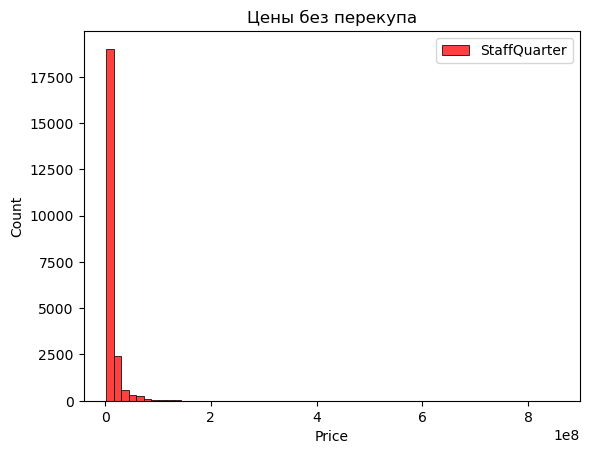

 
Cafeteria значения [0 1 9]
Значение 0 количество 9929905.929413086


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


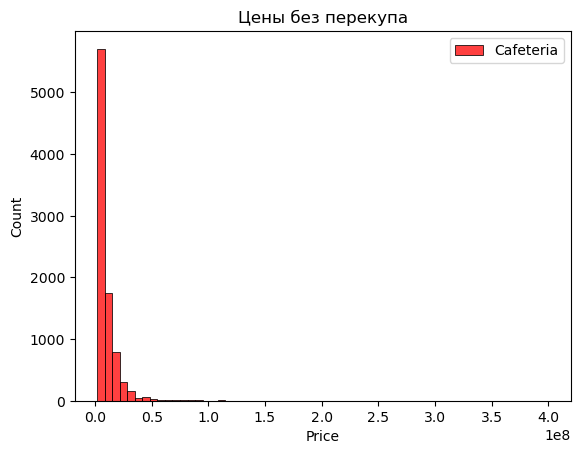

Значение 1 количество 13629296.050761422


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


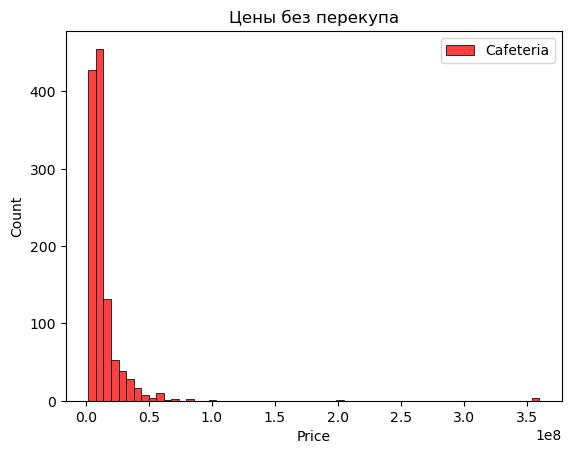

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


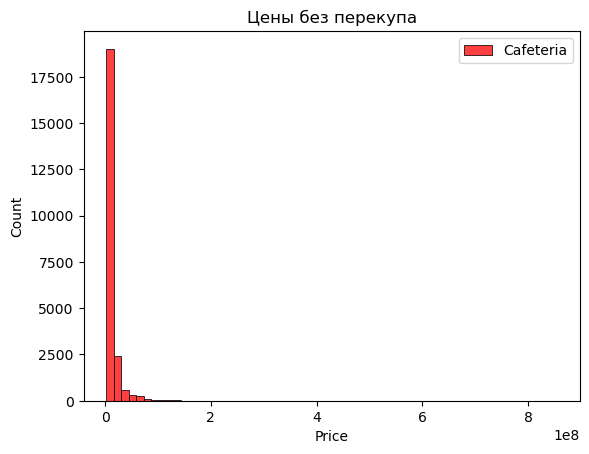

 
MultipurposeRoom значения [0 1 9]
Значение 0 количество 9887138.051992161


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


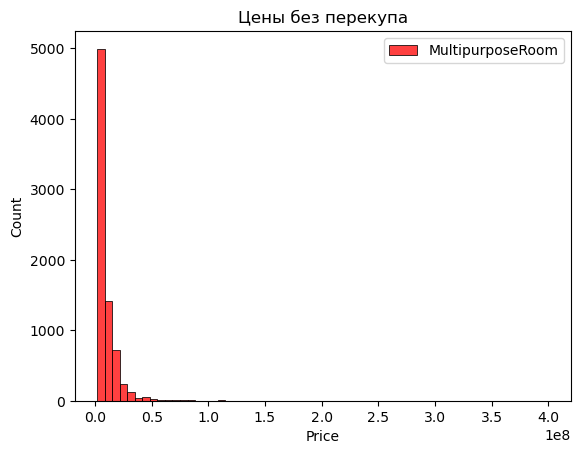

Значение 1 количество 11857743.183347005


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


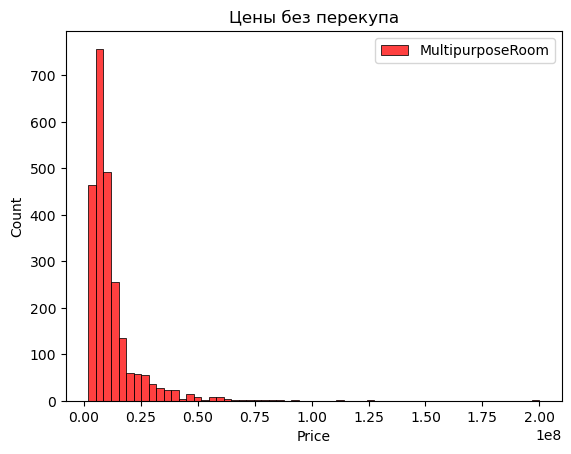

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


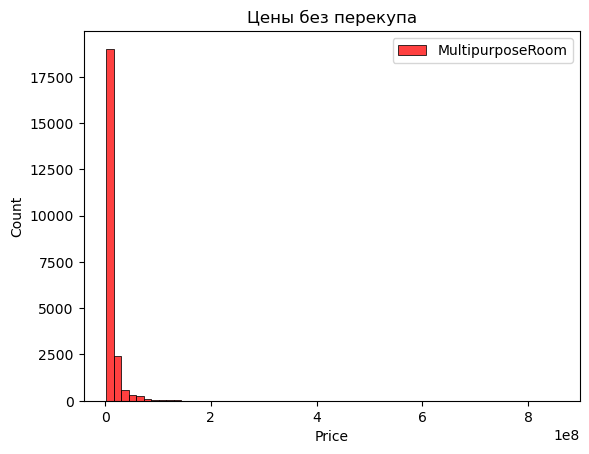

 
Hospital значения [0 1 9]
Значение 0 количество 10226466.402668348


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


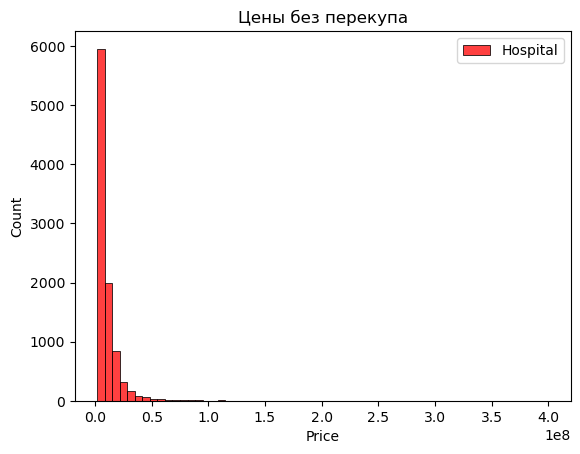

Значение 1 количество 12629766.519163763


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


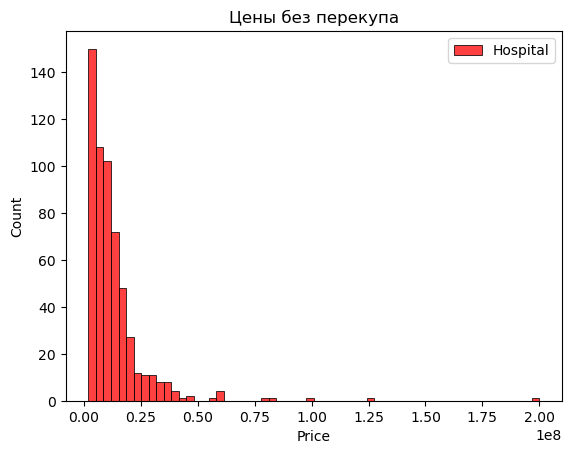

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


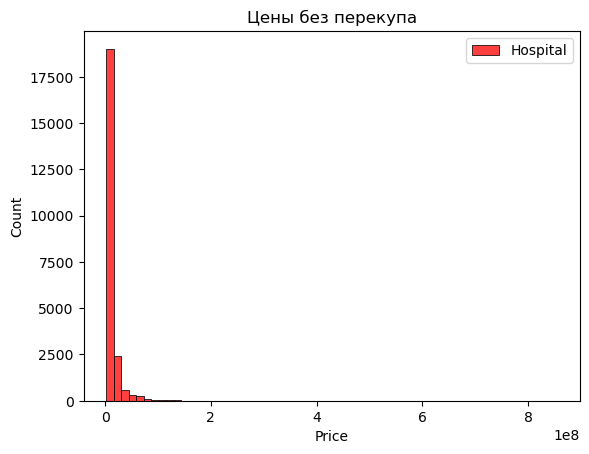

 
WashingMachine значения [0 1 9]
Значение 0 количество 10062704.583419582


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


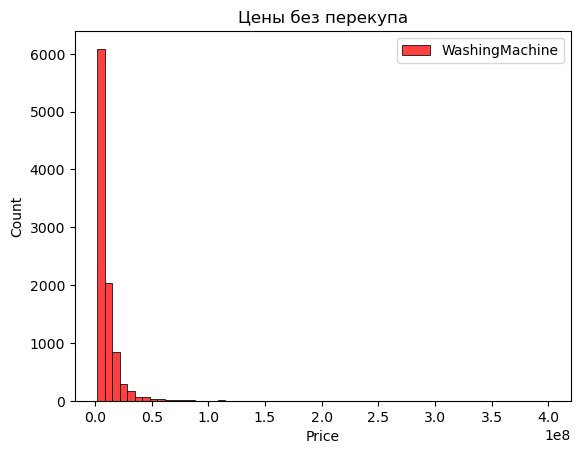

Значение 1 количество 17098301.58700696


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


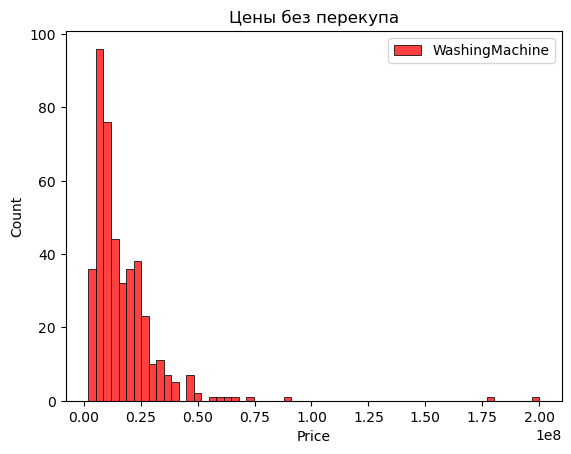

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


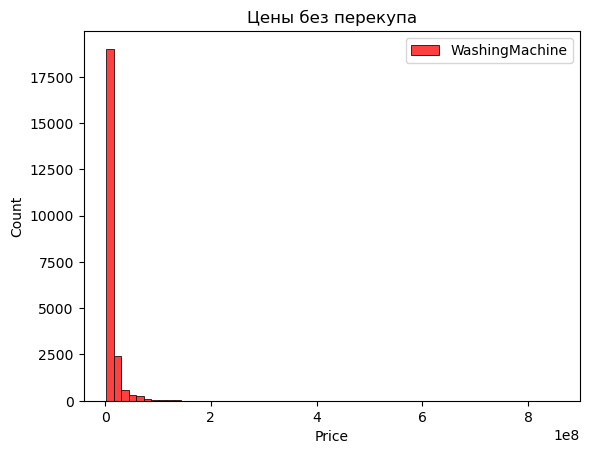

 
Gasconnection значения [0 1 9]
Значение 0 количество 9254266.007810622


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


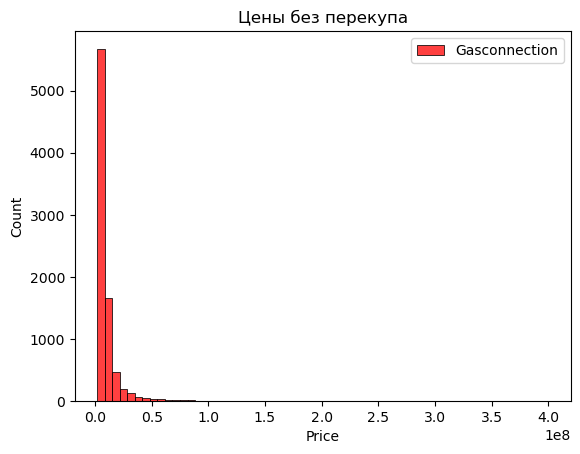

Значение 1 количество 15573810.24957651


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


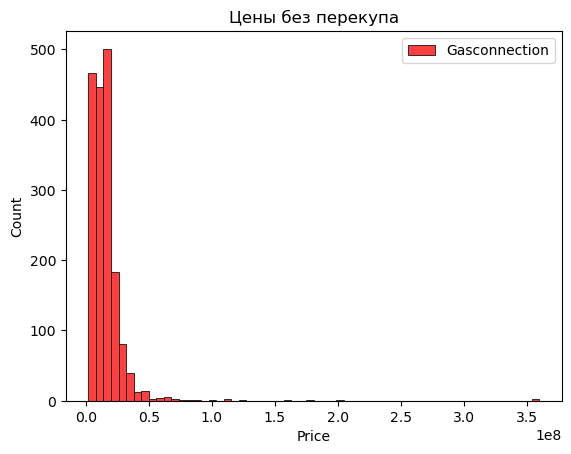

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


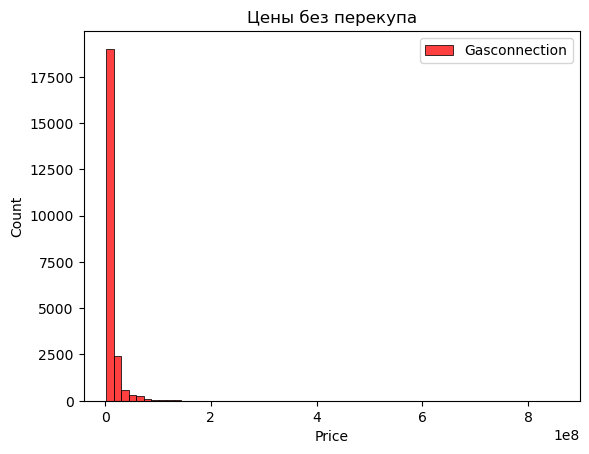

 
AC значения [0 1 9]
Значение 0 количество 9773040.431907026


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


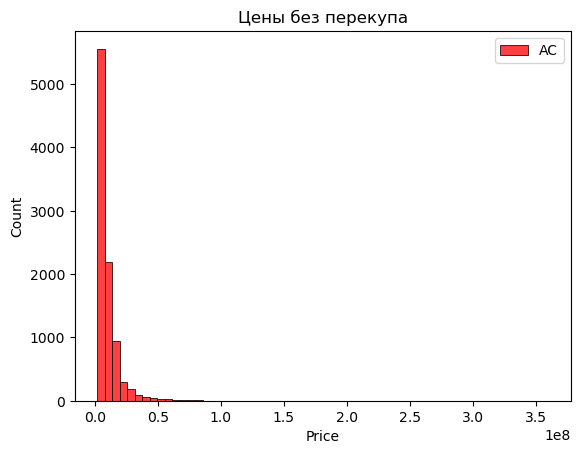

Значение 1 количество 19256993.600318473


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


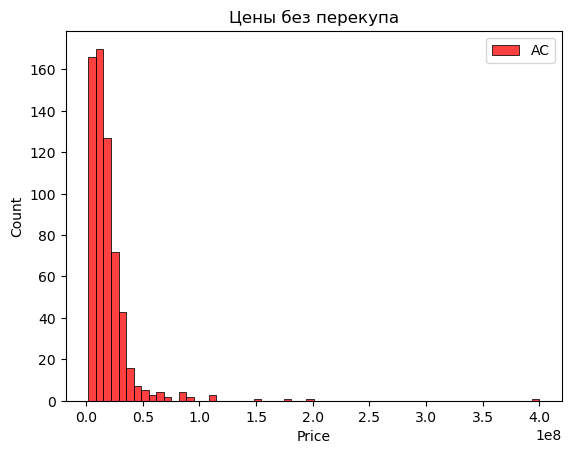

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


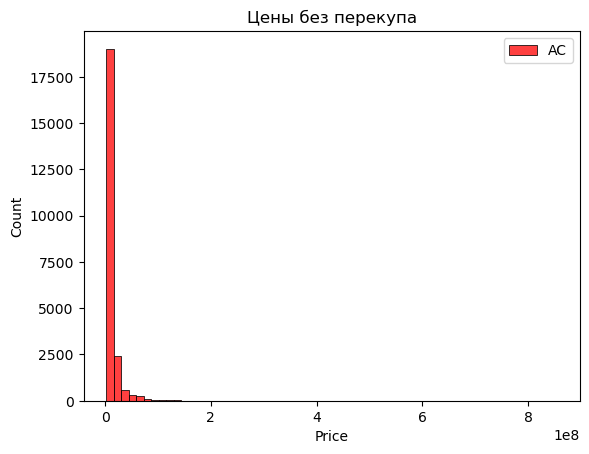

 
Wifi значения [0 9 1]
Значение 0 количество 10254991.074676637


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


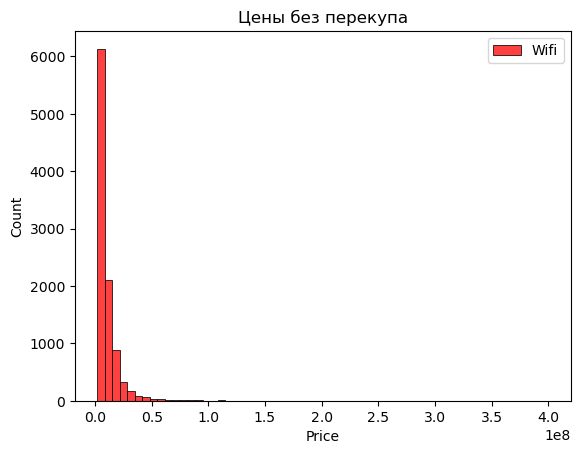

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


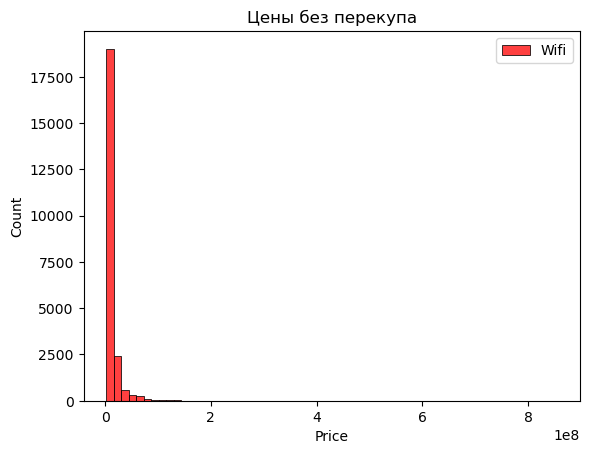

Значение 1 количество 15796081.187817259


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


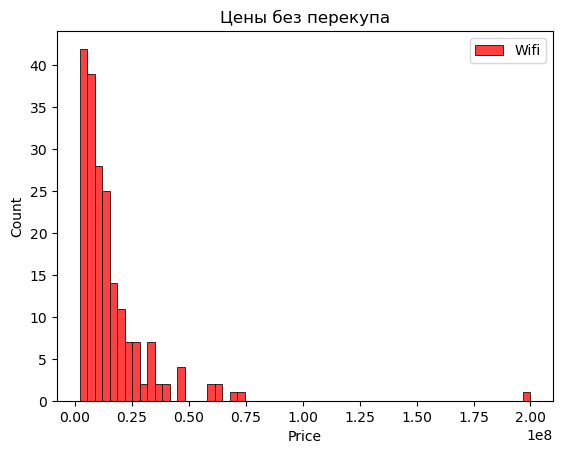

 
Children'splayarea значения [1 0 9]
Значение 1 количество 12380577.53126206


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


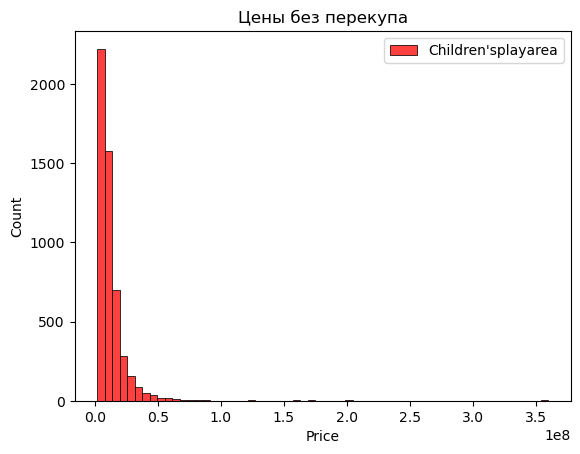

Значение 0 количество 8234385.441254327


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


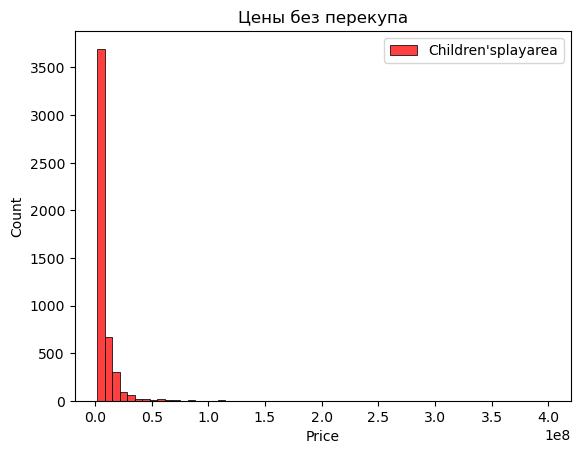

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


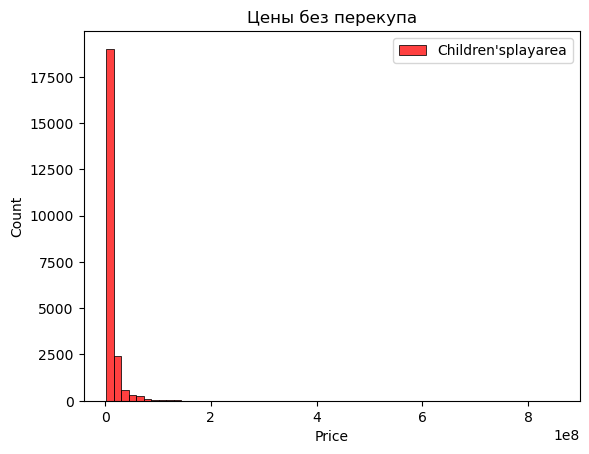

 
LiftAvailable значения [1 0 9]
Значение 1 количество 10991681.38329646


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


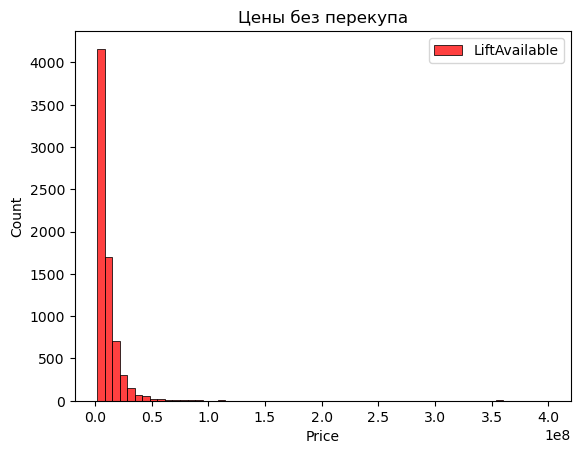

Значение 0 количество 8774337.610975184


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


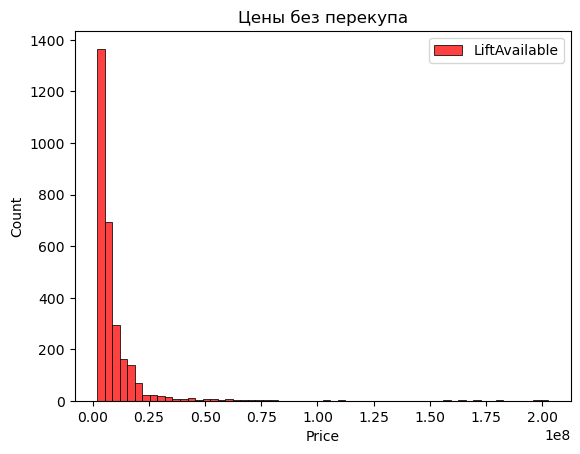

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


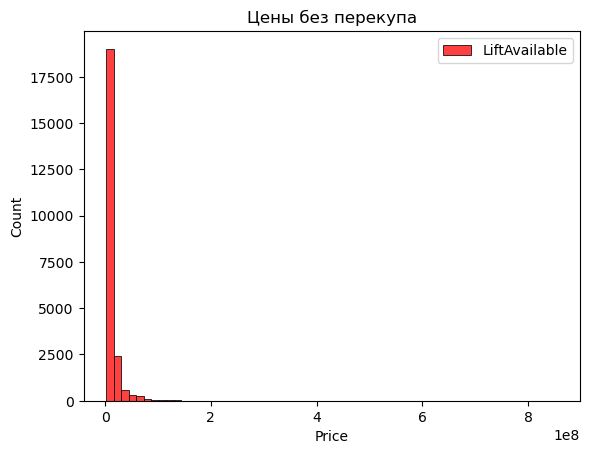

 
BED значения [0 1 9]
Значение 0 количество 9879294.276324395


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


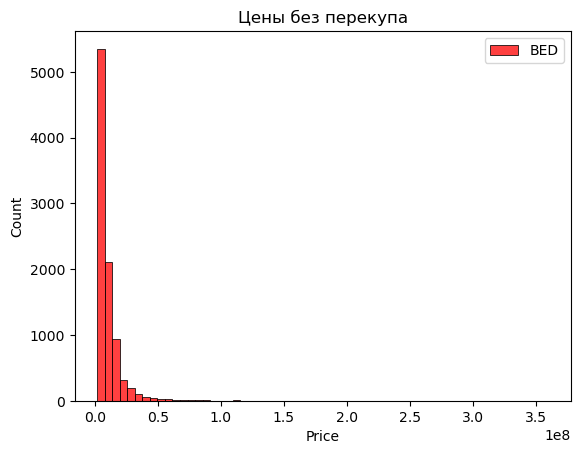

Значение 1 количество 15193225.220892275


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


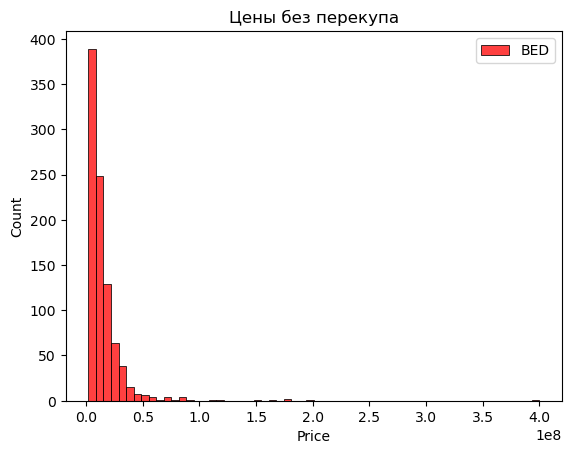

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


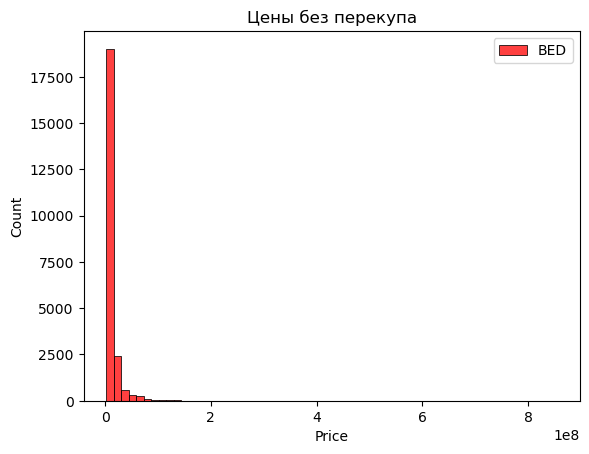

 
VaastuCompliant значения [0 1 9]
Значение 0 количество 9825420.515664691


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


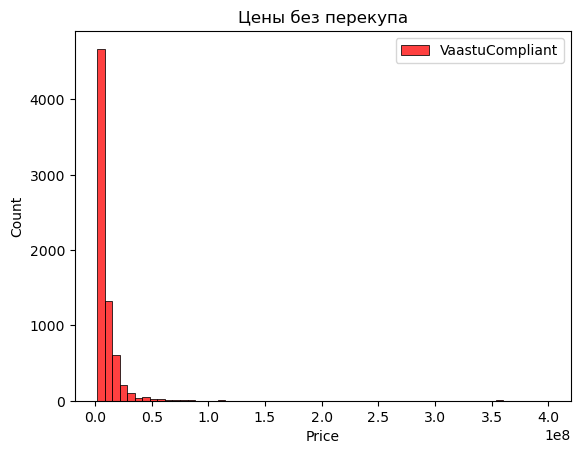

Значение 1 количество 11630292.615563685


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


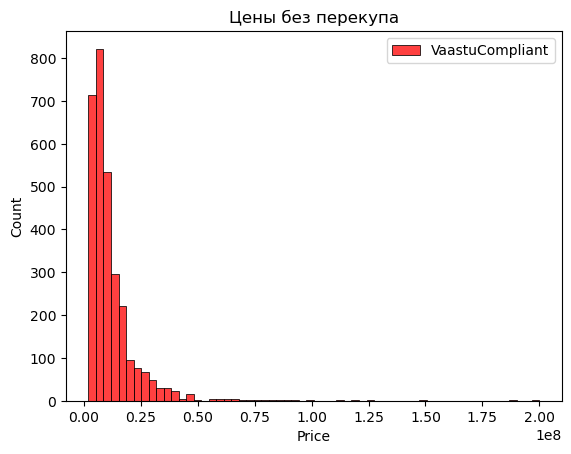

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


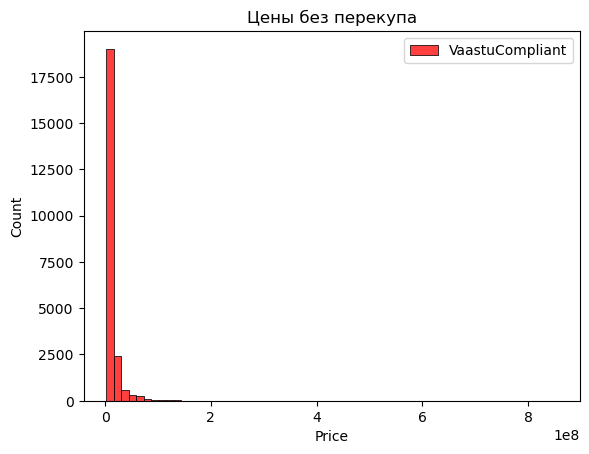

 
Microwave значения [0 1 9]
Значение 0 количество 10061047.040616538


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


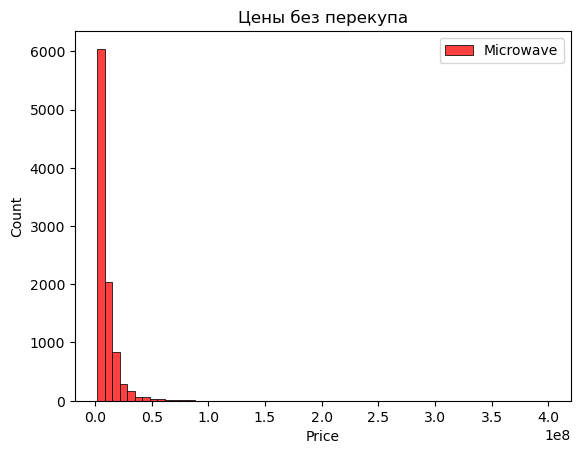

Значение 1 количество 16270969.419551935


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


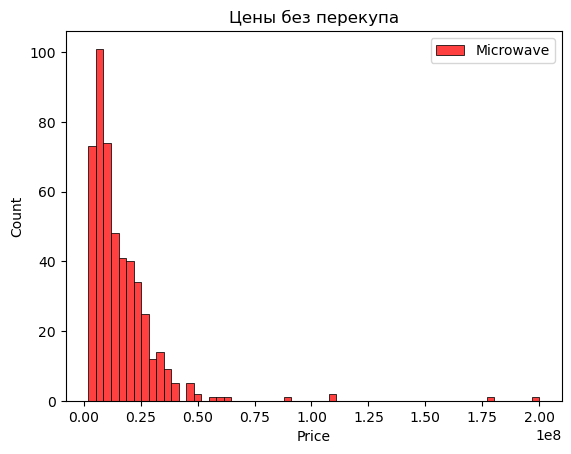

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


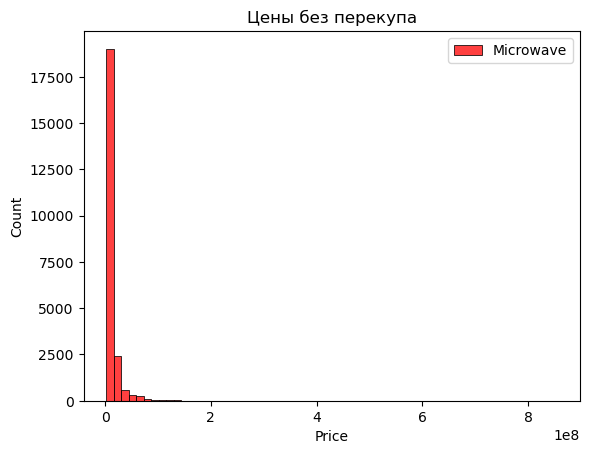

 
GolfCourse значения [0 1 9]
Значение 0 количество 10231461.94278481


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


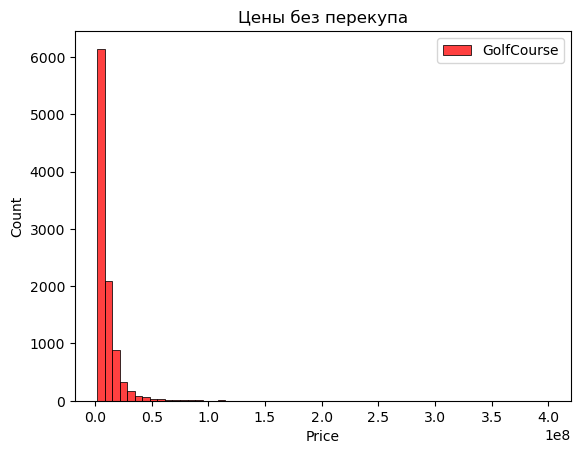

Значение 1 количество 16328132.95412844


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


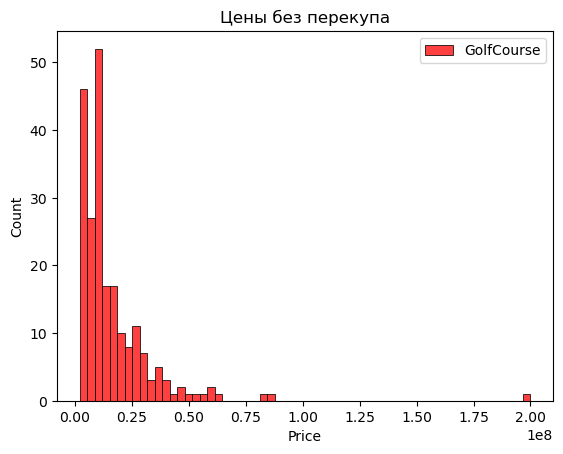

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


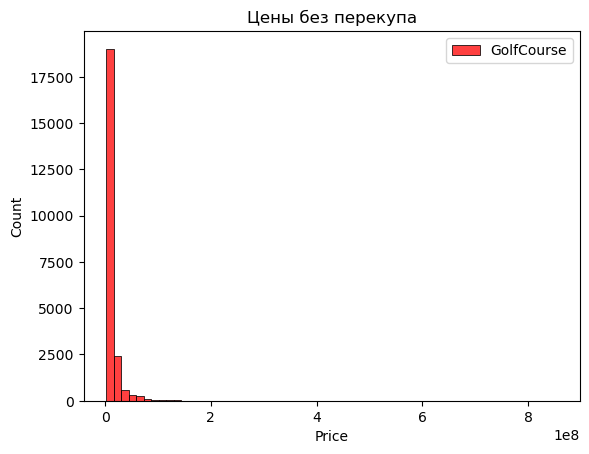

 
TV значения [0 1 9]
Значение 0 количество 10022645.162715064


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


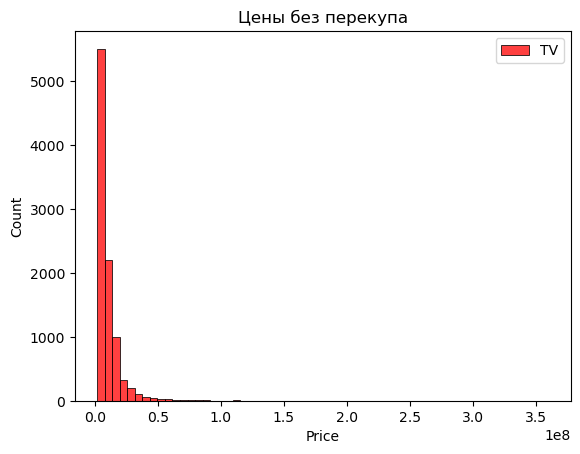

Значение 1 количество 16148602.456327986


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


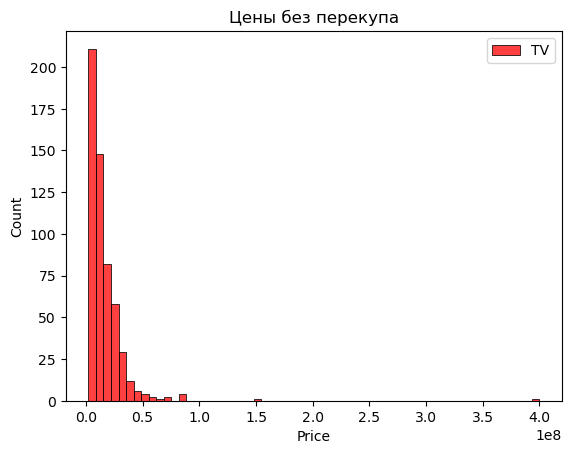

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


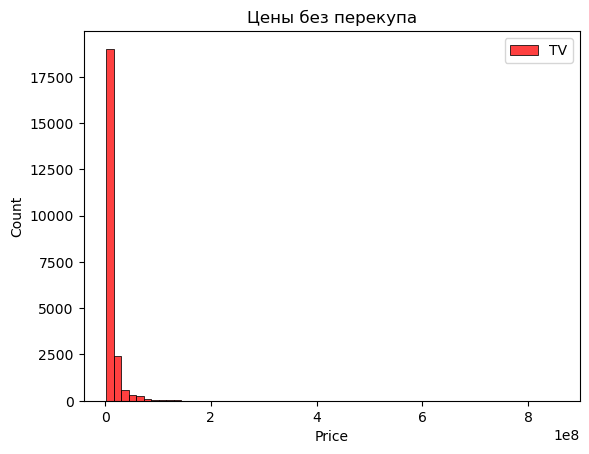

 
DiningTable значения [0 1 9]
Значение 0 количество 10075886.694801798


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


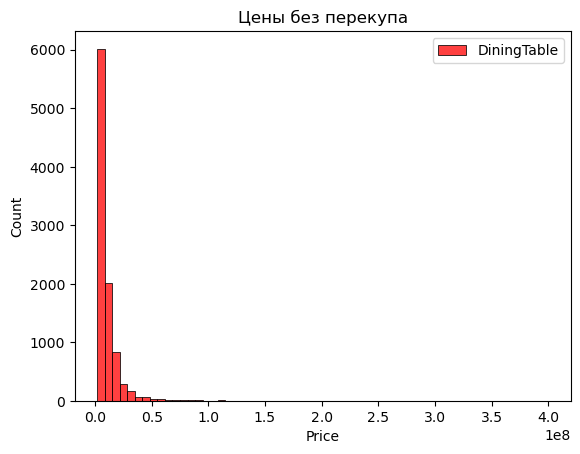

Значение 1 количество 15525689.812030075


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


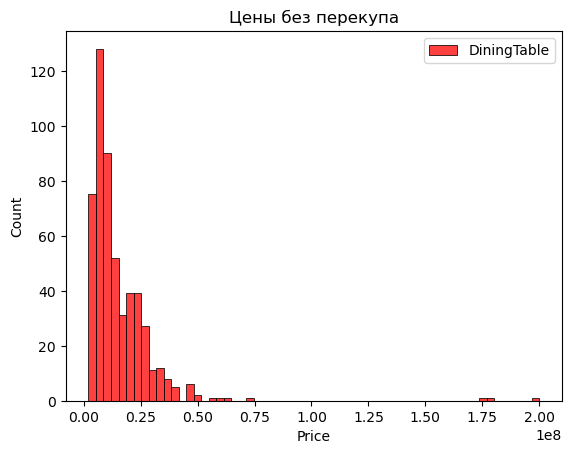

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


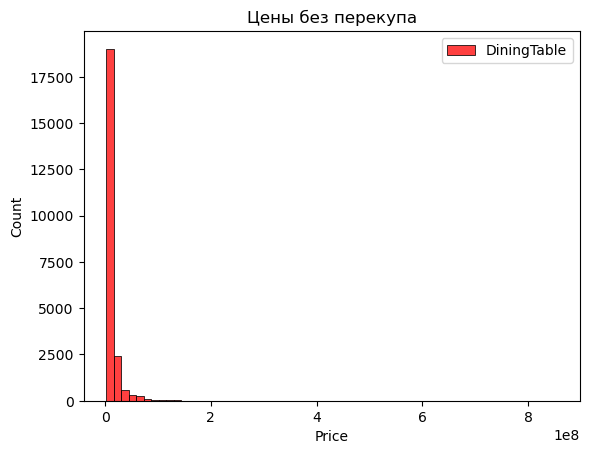

 
Sofa значения [0 1 9]
Значение 0 количество 10048307.619271323


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


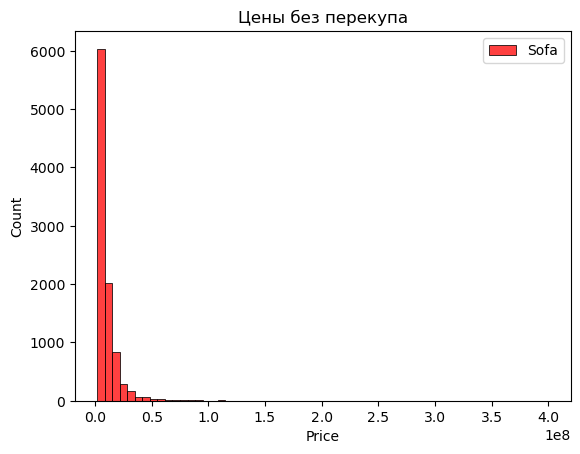

Значение 1 количество 16230507.750972763


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


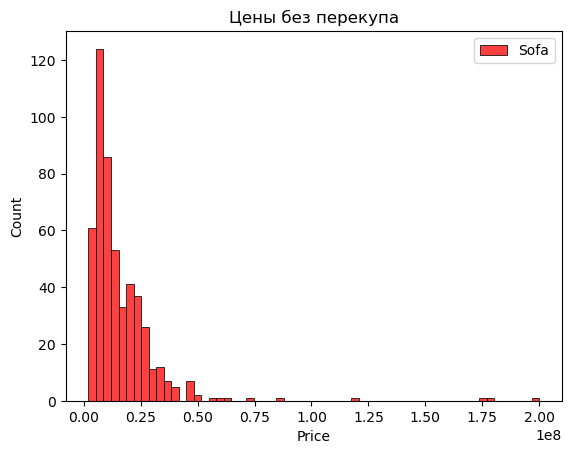

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


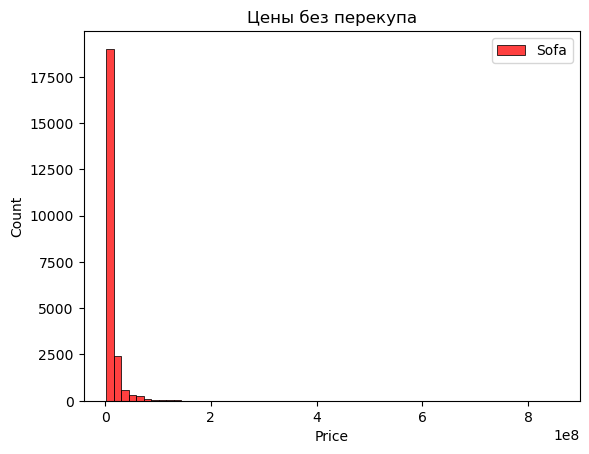

 
Wardrobe значения [0 9 1]
Значение 0 количество 10114150.138838291


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


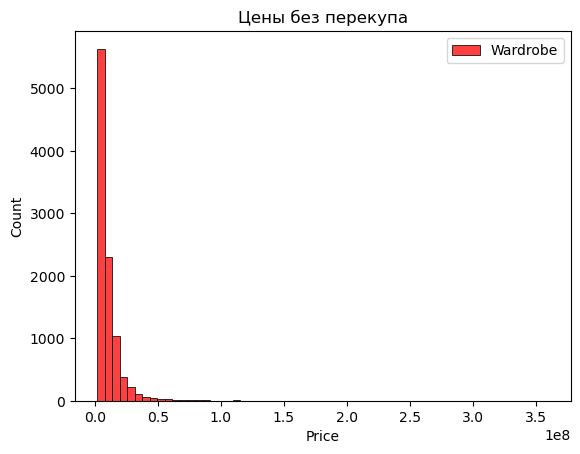

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


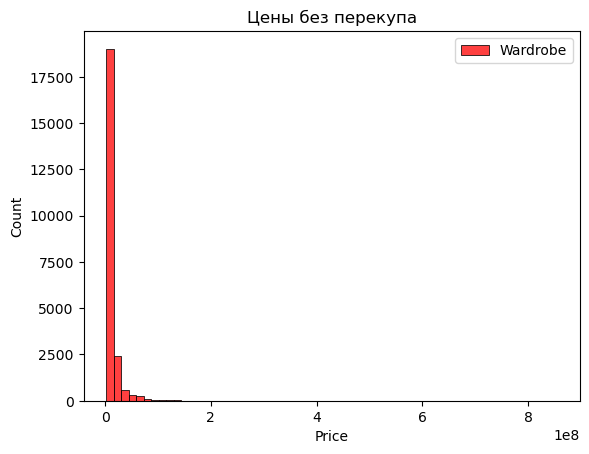

Значение 1 количество 22024587.663507108


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


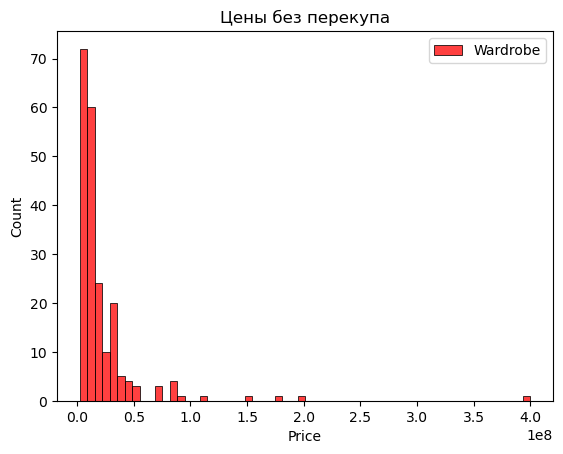

 
Stadium значения [0 1 9]
Значение 0 количество 10021251.168686025


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


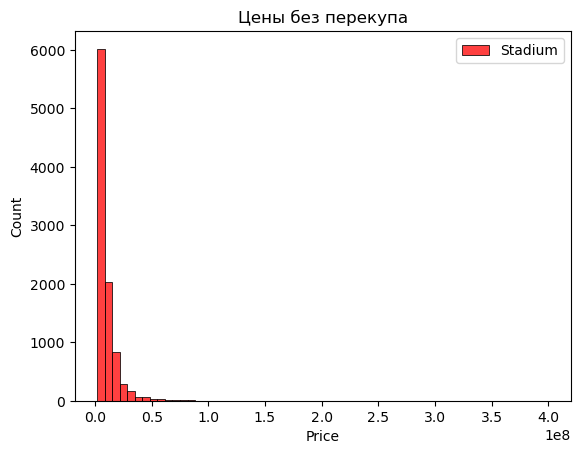

Значение 1 количество 16670059.691714836


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


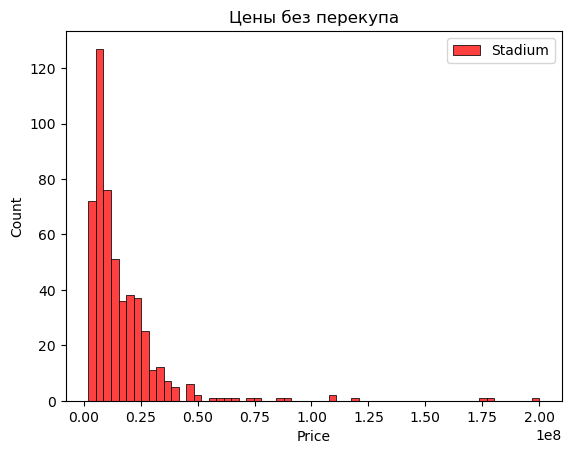

Значение 9 количество 12270838.140446


C:\Users\Strange\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


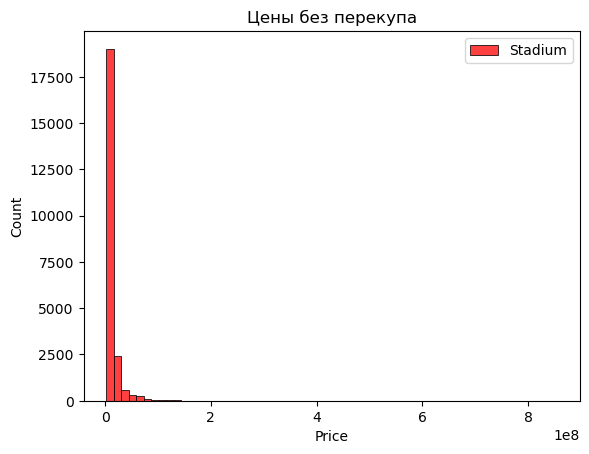

In [31]:
print(' ')

for i in df.columns[3:-1]:
    print(f'{i} значения {df[i].unique()}')
    
    for h in df[i].unique():
        print(f'Значение {h} количество {df[df[i] == h]["Price"].mean()}')
        sns.histplot(df[df[i] == h], x="Price",  bins=60, color = 'r',label=f"{i}",kde=False).set(title='Цены без перекупа')
        plt.legend()
        plt.show()
    print(' ')



In [32]:
mask = df['SwimmingPool']==9

# select all rows except the ones that contain 'Coca Cola'
stuff = df[~mask].copy()

In [33]:
stuff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10093 entries, 0 to 26641
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                10093 non-null  int64 
 1   Area                 10093 non-null  int64 
 2   Location             10093 non-null  object
 3   No. of Bedrooms      10093 non-null  int64 
 4   Resale               10093 non-null  int64 
 5   MaintenanceStaff     10093 non-null  int64 
 6   Gymnasium            10093 non-null  int64 
 7   SwimmingPool         10093 non-null  int64 
 8   LandscapedGardens    10093 non-null  int64 
 9   JoggingTrack         10093 non-null  int64 
 10  RainWaterHarvesting  10093 non-null  int64 
 11  IndoorGames          10093 non-null  int64 
 12  ShoppingMall         10093 non-null  int64 
 13  Intercom             10093 non-null  int64 
 14  SportsFacility       10093 non-null  int64 
 15  ATM                  10093 non-null  int64 
 16  ClubHouse

In [34]:
df.drop(df.loc[df[df.columns]==9].index, inplace=True)
stuff = df[df[df.columns] != 9].copy()
stuff.sort_values('Price', ascending=False,inplace=True)
stuff.head()

ValueError: Cannot index with multidimensional key

In [35]:
stuff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10093 entries, 0 to 26641
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                10093 non-null  int64 
 1   Area                 10093 non-null  int64 
 2   Location             10093 non-null  object
 3   No. of Bedrooms      10093 non-null  int64 
 4   Resale               10093 non-null  int64 
 5   MaintenanceStaff     10093 non-null  int64 
 6   Gymnasium            10093 non-null  int64 
 7   SwimmingPool         10093 non-null  int64 
 8   LandscapedGardens    10093 non-null  int64 
 9   JoggingTrack         10093 non-null  int64 
 10  RainWaterHarvesting  10093 non-null  int64 
 11  IndoorGames          10093 non-null  int64 
 12  ShoppingMall         10093 non-null  int64 
 13  Intercom             10093 non-null  int64 
 14  SportsFacility       10093 non-null  int64 
 15  ATM                  10093 non-null  int64 
 16  ClubHouse

Есть вероятность того, как и предполагалось - девятки в данных датасетах являются некоторыми заменами NaN, которые ставили для того, чтобы не заполнять пустыми значениями. т.е. это одновременно и минимальное количество и максимальное

После обработки - точность модели должна значительно повысится

In [ ]:
#Группировка городов по средним ценам
prices_by_towns = stuff.groupby('Town')['Price'].mean()
prices_by_towns = stuff.reset_index()

In [ ]:
prices_by_towns.head()

In [ ]:


plt.bar(prices_by_towns['Town'],prices_by_towns['Price'])
plt.ylabel('Price in millions of Indian currency')
plt.xlabel('Town')
plt.show()

In [ ]:
for i in prices_by_towns['Town'].unique():
    prices_by_towns.sort_values('Price', ascending=True,inplace=True)
    print(f'Town {i}')
    print(f'10 most cheap areas')
    for h,d in zip(prices_by_towns[prices_by_towns['Town']==i]['Location'].iloc[:10],
                   prices_by_towns[prices_by_towns['Town']==i]['Price'].iloc[:10]):
        print(f'{h} mean price {d}')
    print(' ')
    prices_by_towns.sort_values('Price', ascending=False,inplace=True)
    print(f'10 most expesives areas')
    for h,d in zip(prices_by_towns[prices_by_towns['Town']==i]['Location'].iloc[:10],
                   prices_by_towns[prices_by_towns['Town']==i]['Price'].iloc[:10]):
        print(f'{h} mean price {d}')
    print(' ')

In [37]:
with open('../db/train_data_unp.pkl', 'wb') as f:
    pickle.dump(stuff,f)

In [38]:
stuff['Town'].unique()

array(['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai'],
      dtype=object)